## Which Countries have had the most significant progression in happiness and why?

### Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('whitegrid')
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] =(10, 7)
plt.rcParams['figure.facecolor'] = '#FFE5B4'

In [2]:
pd.set_option('display.max_rows', None);

In [3]:
# Import data and save originals

original_data_2023 = pd.read_excel(r"C:\Users\olimp\OneDrive\Documents\Datasets\Happiness\WHR_2023.xls")
data_2023 = pd.DataFrame(original_data_2023)

original_data = pd.read_excel(r"C:\Users\olimp\OneDrive\Documents\Datasets\Happiness\WHR_before_2023.xls")
data = pd.DataFrame(original_data)

original_country_region = pd.read_excel(r"C:\Users\olimp\OneDrive\Documents\Datasets\Happiness\country_region.xlsx")
country_region = pd.DataFrame(original_country_region)

original_world_life_expectancy = pd.read_excel(r"C:\Users\olimp\OneDrive\Documents\Datasets\Happiness\world_life_expectancy.xlsx")
world_life_expectancy = pd.DataFrame(original_world_life_expectancy)

original_taiwan_life_expectancy = pd.read_excel(r"C:\Users\olimp\OneDrive\Documents\Datasets\Happiness\taiwan_life_expectancy.xlsx")
taiwan_life_expectancy = pd.DataFrame(original_taiwan_life_expectancy)

### 2023 Prep

In [4]:
data_2023.head(10)

Country name  Ladder score  Standard error of ladder score  upperwhisker  \
0      Finland        7.8042                        0.036162      7.875078   
1      Denmark        7.5864                        0.041028      7.666815   
2      Iceland        7.5296                        0.048612      7.624879   
3       Israel        7.4729                        0.031609      7.534853   
4  Netherlands        7.4030                        0.029294      7.460416   
5       Sweden        7.3952                        0.037362      7.468428   
6       Norway        7.3155                        0.044143      7.402020   
7  Switzerland        7.2401                        0.042789      7.323966   
8   Luxembourg        7.2279                        0.069081      7.363298   
9  New Zealand        7.1229                        0.038227      7.197824   

   lowerwhisker  Logged GDP per capita  Social support  \
0      7.733322              10.792010        0.968770   
1      7.505985              10.962164        0.954112   
2      7.434321              10.895531        0.982533   
3      7.410946              10.638705        0.943344   
4      7.345583              10.942279        0.930499   
5      7.321971              10.882823        0.939249   
6      7.228980              11.087730        0.943477   
7      7.156234              11.164027        0.920439   
8      7.092502              11.659949        0.878501   
9      7.047976              10.661865        0.952398   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                71.149994                      0.961408   -0.018824   
1                71.250145                      0.933533    0.134242   
2                72.050018                      0.936349    0.210987   
3                72.697205                      0.808866   -0.023080   
4                71.550018                      0.886875    0.212686   
5                72.150154                      0.947971    0.164789   
6                71.500023                      0.946616    0.140636   
7                72.899956                      0.891074    0.026686   
8                71.675003                      0.914938    0.023950   
9                70.350052                      0.886574    0.174828   

   Perceptions of corruption  Ladder score in Dystopia  \
0                   0.181745                  1.777825   
1                   0.195814                  1.777825   
2                   0.667848                  1.777825   
3                   0.708094                  1.777825   
4                   0.378929                  1.777825   
5                   0.202448                  1.777825   
6                   0.282745                  1.777825   
7                   0.266348                  1.777825   
8                   0.344978                  1.777825   
9                   0.271205                  1.777825   

   Explained by: Log GDP per capita  Explained by: Social support  \
0                          1.888380                      1.584900   
1                          1.949406                      1.547875   
2                          1.925508                      1.619666   
3                          1.833398                      1.520674   
4                          1.942274                      1.488228   
5                          1.920950                      1.510329   
6                          1.994440                      1.521009   
7                          2.021803                      1.462816   
8                          2.199664                      1.356879   
9                          1.841704                      1.543546   

   Explained by: Healthy life expectancy  \
0                               0.534574   
1                               0.537302   
2                               0.559096   
3                               0.576730   
4                               0.545473   
5                               0.561825   
6   

In [5]:
# Drop unwanted columns

data_2023_columns = ['Country name',
                     'Ladder score',
                     'Logged GDP per capita',
                     'Social support',
                     'Healthy life expectancy',
                     'Freedom to make life choices',
                     'Generosity',
                     'Perceptions of corruption']
data_2023 = data_2023[data_2023_columns]
list(data_2023.columns)

['Country name',
 'Ladder score',
 'Logged GDP per capita',
 'Social support',
 'Healthy life expectancy',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption']

In [6]:
data_2023 = data_2023.rename(columns = {'Country name':'country_name',
                                      'Ladder score':'happiness_score',
                                      'Logged GDP per capita':'log_gdp_per_capita',
                                      'Social support':'social_support',
                                      'Healthy life expectancy':'life_expectancy',
                                      'Freedom to make life choices':'freedom',
                                      'Generosity':'generosity',
                                      'Perceptions of corruption':'perception_of_corruption'})
list(data_2023.columns)

['country_name',
 'happiness_score',
 'log_gdp_per_capita',
 'social_support',
 'life_expectancy',
 'freedom',
 'generosity',
 'perception_of_corruption']

In [7]:
data_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country_name              137 non-null    object 
 1   happiness_score           137 non-null    float64
 2   log_gdp_per_capita        137 non-null    float64
 3   social_support            137 non-null    float64
 4   life_expectancy           136 non-null    float64
 5   freedom                   137 non-null    float64
 6   generosity                137 non-null    float64
 7   perception_of_corruption  137 non-null    float64
dtypes: float64(7), object(1)
memory usage: 8.7+ KB


In [8]:
data_2023.describe()

happiness_score  log_gdp_per_capita  social_support  life_expectancy  \
count       137.000000          137.000000      137.000000       136.000000   
mean          5.539755            9.449785        0.799045        64.967627   
std           1.139908            1.207315        0.129188         5.750394   
min           1.859000            5.526723        0.341341        51.530212   
25%           4.723900            8.590914        0.722042        60.648690   
50%           5.684300            9.567472        0.827064        65.837624   
75%           6.333800           10.540300        0.895955        69.412264   
max           7.804200           11.659949        0.982533        77.279778   

          freedom  generosity  perception_of_corruption  
count  137.000000  137.000000                137.000000  
mean     0.787427    0.022444                  0.725375  
std      0.112350    0.141711                  0.176960  
min      0.381642   -0.254276                  0.146112  
25%      0.723874   -0.073543                  0.667848  
50%      0.800536    0.001419                  0.773583  
75%      0.874468    0.117025                  0.845892  
max      0.961408    0.531386                  0.929089

In [9]:
# Check for duplicated rows 

data_2023.duplicated().any()

False

In [10]:
# Check for duplicate country_names

data_2023['country_name'].duplicated().any()

False

In [11]:
# Check for missing data

data_2023[data_2023.isnull().any(axis=1)]

country_name  happiness_score  log_gdp_per_capita  social_support  \
98  State of Palestine           4.9078            8.716377        0.859495   

    life_expectancy  freedom  generosity  perception_of_corruption  
98              NaN   0.6945    -0.13237                  0.835795

In [12]:
# Insert missing data

data_2023.loc[data_2023['country_name'] == 'State of Palestine', 'life_expectancy'] = 74.2798

In [13]:
# Check for missing data again

data_2023.isnull().sum()

country_name                0
happiness_score             0
log_gdp_per_capita          0
social_support              0
life_expectancy             0
freedom                     0
generosity                  0
perception_of_corruption    0
dtype: int64

In [14]:
## Use country_region to add regions to data_2023, Prepare country_region for merge

country_region.head(10)

country_name               region global_cardinal
0               Andorra               Europe    Global North
1  United Arab Emirates          Middle east    Global South
2           Afghanistan       Asia & Pacific    Global South
3   Antigua and Barbuda  South/Latin America    Global South
4              Anguilla  South/Latin America    Global South
5               Albania               Europe    Global North
6               Armenia               Europe    Global North
7  Netherlands Antilles  South/Latin America    Global South
8                Angola               Africa    Global South
9            Antarctica       Asia & Pacific    Global South

In [15]:
# Drop unwanted columns from country_region dataframe

country_region = country_region.drop(['global_cardinal'], axis=1)
list(country_region.columns)

['country_name', 'region']

In [16]:
# Order by country_name and reset index

country_region = country_region.sort_values('country_name').reset_index().drop('index', axis=1)
country_region.head(10)

country_name               region
0          Afghanistan       Asia & Pacific
1        Aland Islands               Europe
2              Albania               Europe
3              Algeria          Arab States
4       American Samoa       Asia & Pacific
5              Andorra               Europe
6               Angola               Africa
7             Anguilla  South/Latin America
8           Antarctica       Asia & Pacific
9  Antigua and Barbuda  South/Latin America

In [17]:
# Create copy

test_data_2023 = data_2023

In [18]:
## Merge test_data_2023 with country_region to add region

test_data_2023 = pd.merge(test_data_2023, country_region, how = 'left', on = 'country_name')
data_2023_columns = ['country_name',
                     'region', 
                     'happiness_score',
                     'log_gdp_per_capita',
                     'social_support',
                     'life_expectancy',
                     'freedom',
                     'generosity',
                     'perception_of_corruption']
test_data_2023 = test_data_2023[data_2023_columns]
test_data_2023.head(10)

country_name          region  happiness_score  log_gdp_per_capita  \
0      Finland          Europe           7.8042           10.792010   
1      Denmark          Europe           7.5864           10.962164   
2      Iceland          Europe           7.5296           10.895531   
3       Israel     Middle east           7.4729           10.638705   
4  Netherlands          Europe           7.4030           10.942279   
5       Sweden          Europe           7.3952           10.882823   
6       Norway          Europe           7.3155           11.087730   
7  Switzerland          Europe           7.2401           11.164027   
8   Luxembourg          Europe           7.2279           11.659949   
9  New Zealand  Asia & Pacific           7.1229           10.661865   

   social_support  life_expectancy   freedom  generosity  \
0        0.968770        71.149994  0.961408   -0.018824   
1        0.954112        71.250145  0.933533    0.134242   
2        0.982533        72.050018  0.936349    0.210987   
3        0.943344        72.697205  0.808866   -0.023080   
4        0.930499        71.550018  0.886875    0.212686   
5        0.939249        72.150154  0.947971    0.164789   
6        0.943477        71.500023  0.946616    0.140636   
7        0.920439        72.899956  0.891074    0.026686   
8        0.878501        71.675003  0.914938    0.023950   
9        0.952398        70.350052  0.886574    0.174828   

   perception_of_corruption  
0                  0.181745  
1                  0.195814  
2                  0.667848  
3                  0.708094  
4                  0.378929  
5                  0.202448  
6                  0.282745  
7                  0.266348  
8                  0.344978  
9                  0.271205

In [19]:
# Check for NaN region

test_data_2023['region'].isna().any()

True

In [20]:
# Locate NaN rows

test_data_2023[test_data_2023.isna().any(axis=1)][['country_name','region']]

country_name region
17                     Czechia    NaN
26    Taiwan Province of China    NaN
33                      Kosovo    NaN
56                 South Korea    NaN
62                     Moldova    NaN
69                      Russia    NaN
81   Hong Kong S.A.R. of China    NaN
85         Congo (Brazzaville)    NaN
86             North Macedonia    NaN
88                        Laos    NaN
92                 Ivory Coast    NaN
98          State of Palestine    NaN
100                       Iran    NaN
105                    Turkiye    NaN
128                   Tanzania    NaN
132           Congo (Kinshasa)    NaN

In [21]:
test_data_2023.sort_values('country_name')

country_name                 region  happiness_score  \
136                Afghanistan         Asia & Pacific           1.8590   
82                     Albania                 Europe           5.2773   
80                     Algeria            Arab States           5.3291   
51                   Argentina    South/Latin America           6.0237   
78                     Armenia                 Europe           5.3417   
11                   Australia         Asia & Pacific           7.0946   
10                     Austria                 Europe           7.0973   
41                     Bahrain            Arab States           6.1732   
117                 Bangladesh         Asia & Pacific           4.2821   
16                     Belgium                 Europe           6.8591   
115                      Benin                 Africa           4.3737   
68                     Bolivia    South/Latin America           5.6843   
70      Bosnia and Herzegovina                 Europe           5.6325   
131                   Botswana                 Africa           3.4353   
48                      Brazil    South/Latin America           6.1246   
76                    Bulgaria                 Europe           5.4661   
103               Burkina Faso                 Africa           4.6376   
114                   Cambodia         Asia & Pacific           4.3935   
95                    Cameroon                 Africa           4.9732   
12                      Canada          North America           6.9607   
113                       Chad                 Africa           4.3966   
34                       Chile    South/Latin America           6.3338   
63                       China         Asia & Pacific           5.8179   
71                    Colombia    South/Latin America           5.6304   
129                    Comoros            Arab States           3.5452   
85         Congo (Brazzaville)                    NaN           5.2671   
132           Congo (Kinshasa)                    NaN           3.2072   
22                  Costa Rica    South/Latin America           6.6085   
47                     Croatia                 Europe           6.1250   
45                      Cyprus                 Europe           6.1300   
17                     Czechia                    NaN           6.8452   
1                      Denmark                 Europe           7.5864   
72          Dominican Republic    South/Latin America           5.5689   
73                     Ecuador    South/Latin America           5.5589   
120                      Egypt            Middle east           4.1705   
49                 El Salvador    South/Latin America           6.1216   
30                     Estonia                 Europe           6.4552   
123                   Ethiopia                 Africa           4.0906   
0                      Finland                 Europe           7.8042   
20                      France                 Europe           6.6613   
93                       Gabon                 Africa           5.0347   
118                     Gambia                 Africa           4.2794   
89                     Georgia                 Europe           5.1091   
15                     Germany                 Europe           6.8918   
106                      Ghana                 Africa           4.6050   
57                      Greece                 Europe           5.9309   
42                   Guatemala    South/Latin America           6.1503   
90                      Guinea                 Africa           5.0717   
52                    Honduras    South/Latin America           6.0225   
81   Hong Kong S.A.R. of China                    NaN           5.3085   
50                     Hungary                 Europe           6.0412   
2                      Iceland                 Europe           7.5296   
125                      India         Asia & Pacific           4.0358   
83                   I

In [22]:
country_region.sort_values('country_name')

country_name                 region
0                                     Afghanistan         Asia & Pacific
1                                   Aland Islands                 Europe
2                                         Albania                 Europe
3                                         Algeria            Arab States
4                                  American Samoa         Asia & Pacific
5                                         Andorra                 Europe
6                                          Angola                 Africa
7                                        Anguilla    South/Latin America
8                                      Antarctica         Asia & Pacific
9                             Antigua and Barbuda    South/Latin America
10                                      Argentina    South/Latin America
11                                        Armenia                 Europe
12                                          Aruba    South/Latin America
13                                      Australia         Asia & Pacific
14                                        Austria                 Europe
15                                     Azerbaijan         Asia & Pacific
16                                        Bahamas    South/Latin America
17                                        Bahrain            Arab States
18                                     Bangladesh         Asia & Pacific
19                                       Barbados    South/Latin America
20                                        Belarus                 Europe
21                                        Belgium                 Europe
22                                         Belize    South/Latin America
23                                          Benin                 Africa
24                                        Bermuda    South/Latin America
25                                         Bhutan         Asia & Pacific
26                                        Bolivia    South/Latin America
27                         Bosnia and Herzegovina                 Europe
28                                       Botswana                 Africa
29                                  Bouvet Island    South/Latin America
30                                         Brazil    South/Latin America
31                 British Indian Ocean Territory         Asia & Pacific
32                              Brunei Darussalam         Asia & Pacific
33                                       Bulgaria                 Europe
34                                   Burkina Faso                 Africa
35                                        Burundi                 Africa
36                                       Cambodia         Asia & Pacific
37                                       Cameroon                 Africa
38                                         Canada          North America
39                                     Cape Verde                 Africa
40                                 Cayman Islands    South/Latin America
41                       Central African Republic                 Africa
42                                           Chad                 Africa
43                                          Chile    South/Latin America
44                                          China         Asia & Pacific
45                               Christmas Island         Asia & Pacific
46                        Cocos (Keeling) Islands         Asia & Pacific
47                                       Colombia    South/Latin America
48                                        Comoros            Arab States
49                                          Congo                 Africa
50          Congo, The Democratic Republic of the                 Africa
51                                   Cook Islands         Asia & Pacific
52                                     Costa Rica    South/Latin America
53                                        Croatia                 Europe
54                    

In [23]:
country_region.shape

(248, 2)

In [24]:
# Correct NaN rows

test_data_2023.loc[test_data_2023['country_name'] == 'Czechia', 'country_name'] = 'Czech Republic'
test_data_2023.loc[test_data_2023['country_name'] == 'Taiwan Province of China', 'country_name'] = 'Taiwan'
test_data_2023.loc[test_data_2023['country_name'] == 'Hong Kong S.A.R. of China', 'country_name'] = 'Hong Kong'
test_data_2023.loc[test_data_2023['country_name'] == 'Congo (Kinshasa)', 'country_name'] = 'Congo Kinshasa'
test_data_2023.loc[test_data_2023['country_name'] == 'Congo (Brazzaville)', 'country_name'] = 'Congo Brazzaville'
test_data_2023.loc[test_data_2023['country_name'] == 'North Macedonia', 'country_name'] = 'Macedonia'
test_data_2023.loc[test_data_2023['country_name'] == 'Ivory Coast', 'country_name'] = '''Côte D'Ivoire'''
test_data_2023.loc[test_data_2023['country_name'] == 'State of Palestine', 'country_name'] = 'Palestine'

country_region.loc[117, 'country_name'] = 'South Korea'
country_region.loc[145, 'country_name'] = 'Moldova'
country_region.loc[121, 'country_name'] = 'Laos'
country_region.loc[country_region['country_name'] == 'Russian Federation', 'country_name'] = 'Russia'
country_region.loc[country_region['country_name'] == 'Congo, The Democratic Republic of the', 'country_name'] = 'Congo Kinshasa'
country_region.loc[country_region['country_name'] == 'Congo', 'country_name'] = 'Congo Brazzaville'
country_region.loc[country_region['country_name'] == 'Palestinian Territory', 'country_name'] = 'Palestine'
country_region.loc[country_region['country_name'] == 'Iran, Islamic Republic of', 'country_name'] = 'Iran'
country_region.loc[country_region['country_name'] == 'Turkey', 'country_name'] = 'Turkiye'
country_region.loc[country_region['country_name'] == 'Tanzania, United Republic of', 'country_name'] = 'Tanzania'

country_region.loc[248] = ['Kosovo', 'Europe']

In [25]:
## Merge again

test_data_2023 = test_data_2023.rename(columns = {'region' : 'region_2'})
test_data_2023 = pd.merge(test_data_2023, country_region, how = 'left', on = 'country_name')
test_data_2023 = test_data_2023[data_2023_columns]

In [26]:
# Check for NaN region again

test_data_2023['region'].isna().any()

False

In [27]:
# Check proper regions were entered

print(test_data_2023.drop_duplicates('region', keep='first')['region'])

0                    Europe
3               Middle east
9            Asia & Pacific
12            North America
22      South/Latin America
39    South/Central America
41              Arab States
58                   Africa
Name: region, dtype: object


In [28]:
# Check for missing data

test_data_2023.isnull().sum()

country_name                0
region                      0
happiness_score             0
log_gdp_per_capita          0
social_support              0
life_expectancy             0
freedom                     0
generosity                  0
perception_of_corruption    0
dtype: int64

In [29]:
# Sort by country_name and reset index

test_data_2023 = test_data_2023.sort_values('country_name').reset_index().drop('index', axis=1)
test_data_2023.head(10)

country_name               region  happiness_score  log_gdp_per_capita  \
0  Afghanistan       Asia & Pacific           1.8590            7.324032   
1      Albania               Europe           5.2773            9.567472   
2      Algeria          Arab States           5.3291            9.300214   
3    Argentina  South/Latin America           6.0237            9.958788   
4      Armenia               Europe           5.3417            9.614713   
5    Australia       Asia & Pacific           7.0946           10.821049   
6      Austria               Europe           7.0973           10.898906   
7      Bahrain          Arab States           6.1732           10.775782   
8   Bangladesh       Asia & Pacific           4.2821            8.684880   
9      Belgium               Europe           6.8591           10.843587   

   social_support  life_expectancy   freedom  generosity  \
0        0.341341        54.712410  0.381642   -0.081011   
1        0.717909        69.150070  0.794328   -0.006932   
2        0.855219        66.549232  0.571240   -0.117374   
3        0.890890        67.200081  0.822678   -0.089480   
4        0.790231        67.788971  0.795605   -0.155315   
5        0.933870        71.049942  0.890200    0.197561   
6        0.888436        71.150047  0.854737    0.101604   
7        0.843845        65.824997  0.943973    0.117025   
8        0.544469        64.548424  0.845008    0.005050   
9        0.914871        70.899086  0.825229    0.001419   

   perception_of_corruption  
0                  0.847215  
1                  0.878094  
2                  0.716906  
3                  0.814013  
4                  0.705434  
5                  0.495916  
6                  0.496774  
7                  0.736699  
8                  0.698185  
9                  0.548573

In [30]:
### Save dataframe, data_2023 is ready for analysis

data_2023 = test_data_2023

### 2023 Analysis

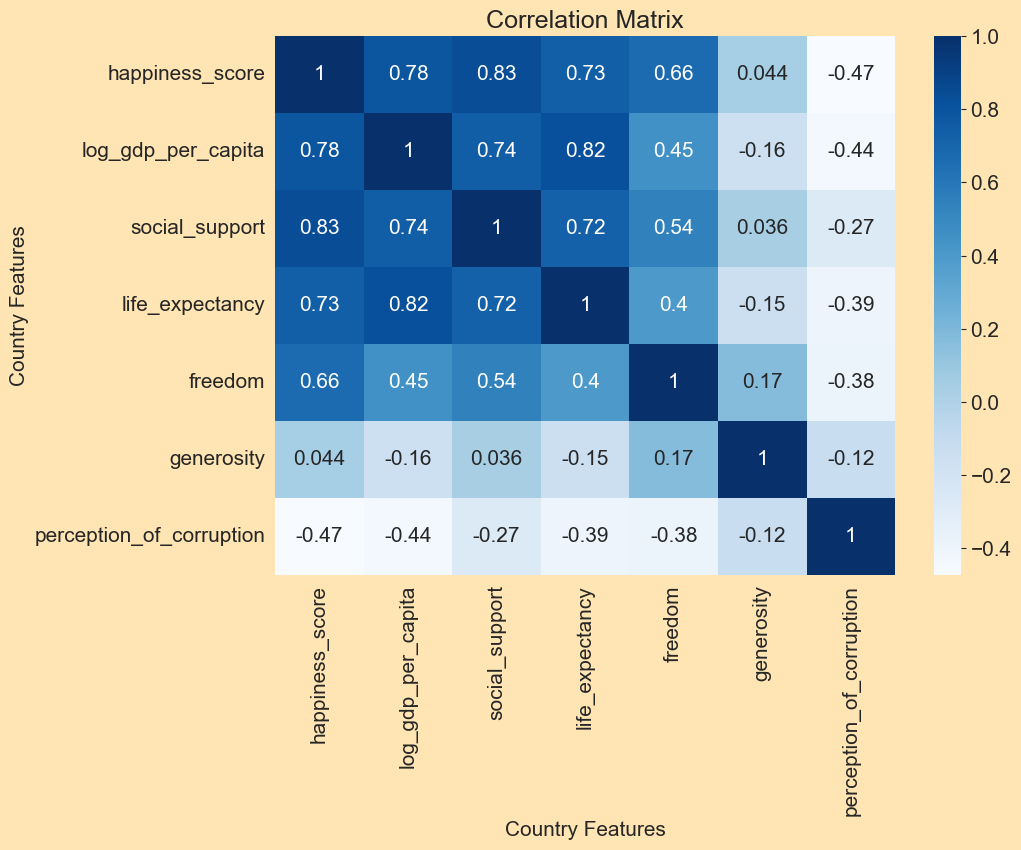

In [31]:
### What country feature correlates with happiness?

corr = data_2023.corr(numeric_only = True, method = "pearson")
sns.heatmap(corr, annot=True, cmap="Blues")

plt.title('Correlation Matrix')
plt.xlabel('Country Features')
plt.ylabel('Country Features')

plt.show()

# Shows that Country Features with the highest correlation to happiness are: log_gdp_per_capita, healthy_life_expectancy, and social_support

In [32]:
# Show what correlates to happiness

happiness_correlation_matrix = data_2023.corr(numeric_only = True)['happiness_score'].sort_values(ascending=False)
happiness_correlation_matrix

happiness_score             1.000000
social_support              0.834623
log_gdp_per_capita          0.784368
life_expectancy             0.732440
freedom                     0.662922
generosity                  0.043687
perception_of_corruption   -0.471976
Name: happiness_score, dtype: float64

In [33]:
# Show all positive correlations

correlation_matrix = data_2023.corr(numeric_only = True)
corr_unstack = correlation_matrix.unstack().sort_values()
data_2023_high_corr = corr_unstack.sort_values(ascending=False)
data_2023_high_corr = data_2023_high_corr[(data_2023_high_corr < 1) & (data_2023_high_corr > 0.5)].drop_duplicates()
data_2023_high_corr

happiness_score     social_support        0.834623
life_expectancy     log_gdp_per_capita    0.821225
log_gdp_per_capita  happiness_score       0.784368
                    social_support        0.738087
happiness_score     life_expectancy       0.732440
life_expectancy     social_support        0.723622
freedom             happiness_score       0.662922
social_support      freedom               0.541808
dtype: float64

In [34]:
## Plot Data
# Order legend

legend = data_2023.groupby('region')['happiness_score'].count().reset_index().sort_values('happiness_score', ascending = False)['region'].tolist()

Text(0, 0.5, 'Social Support')

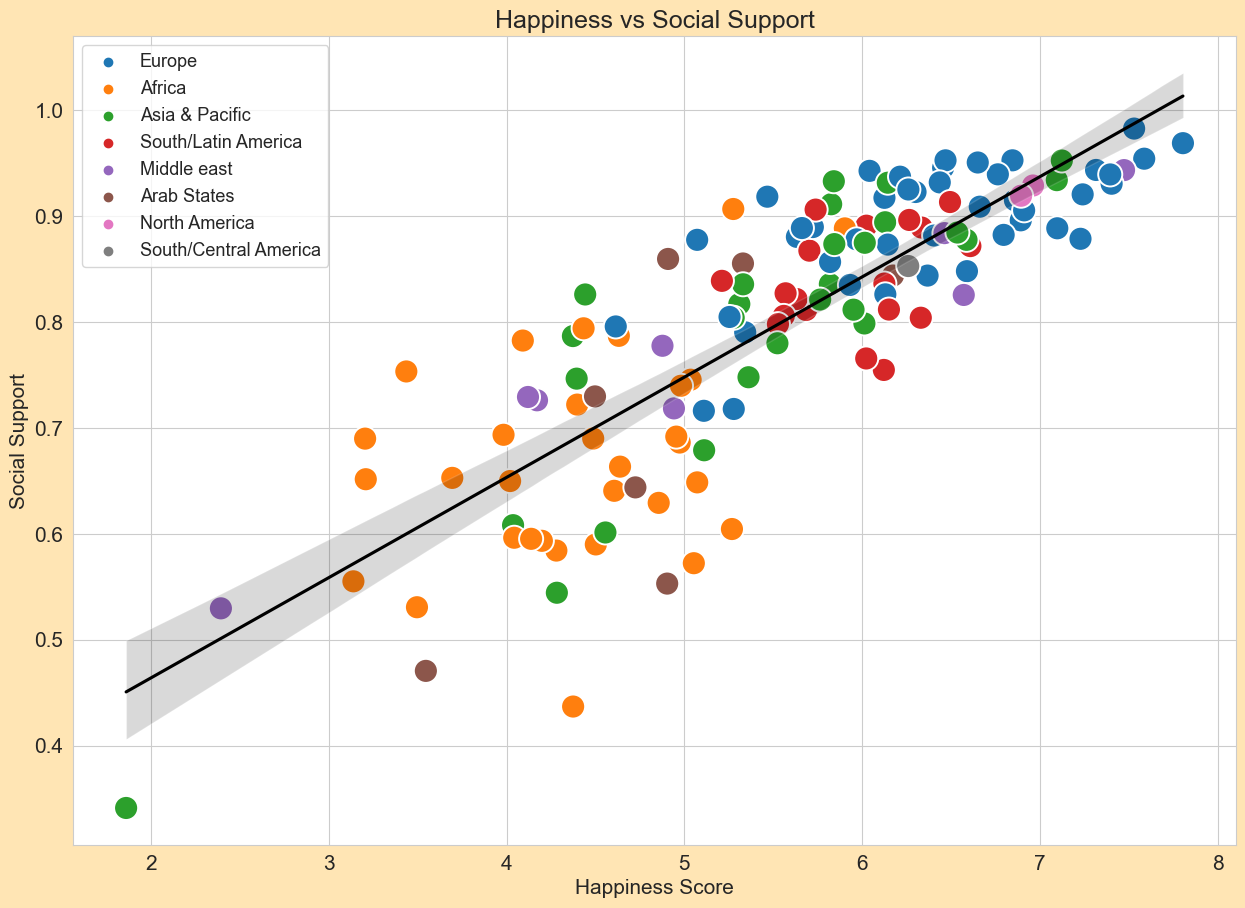

In [35]:
# Plot happiness_score and social_support

plt.rcParams['figure.figsize'] = (15,10.5)
plt.title('Happiness vs Social Support')
ax = happ_gdp_corr = sns.scatterplot(x = data_2023.happiness_score,
                                     y = data_2023.social_support,
                                     hue_order = legend, 
                                     hue = data_2023['region'], 
                                     s = 300)
sns.regplot(data=data_2023, 
            x="happiness_score",
            y="social_support",
            scatter=False, 
            line_kws={"color": "black"}, 
            ax=ax)

plt.legend(loc = 'upper left',
           fontsize = '13')
plt.xlabel('Happiness Score')
plt.ylabel('Social Support')

Text(0, 0.5, 'Log GDP per Capita')

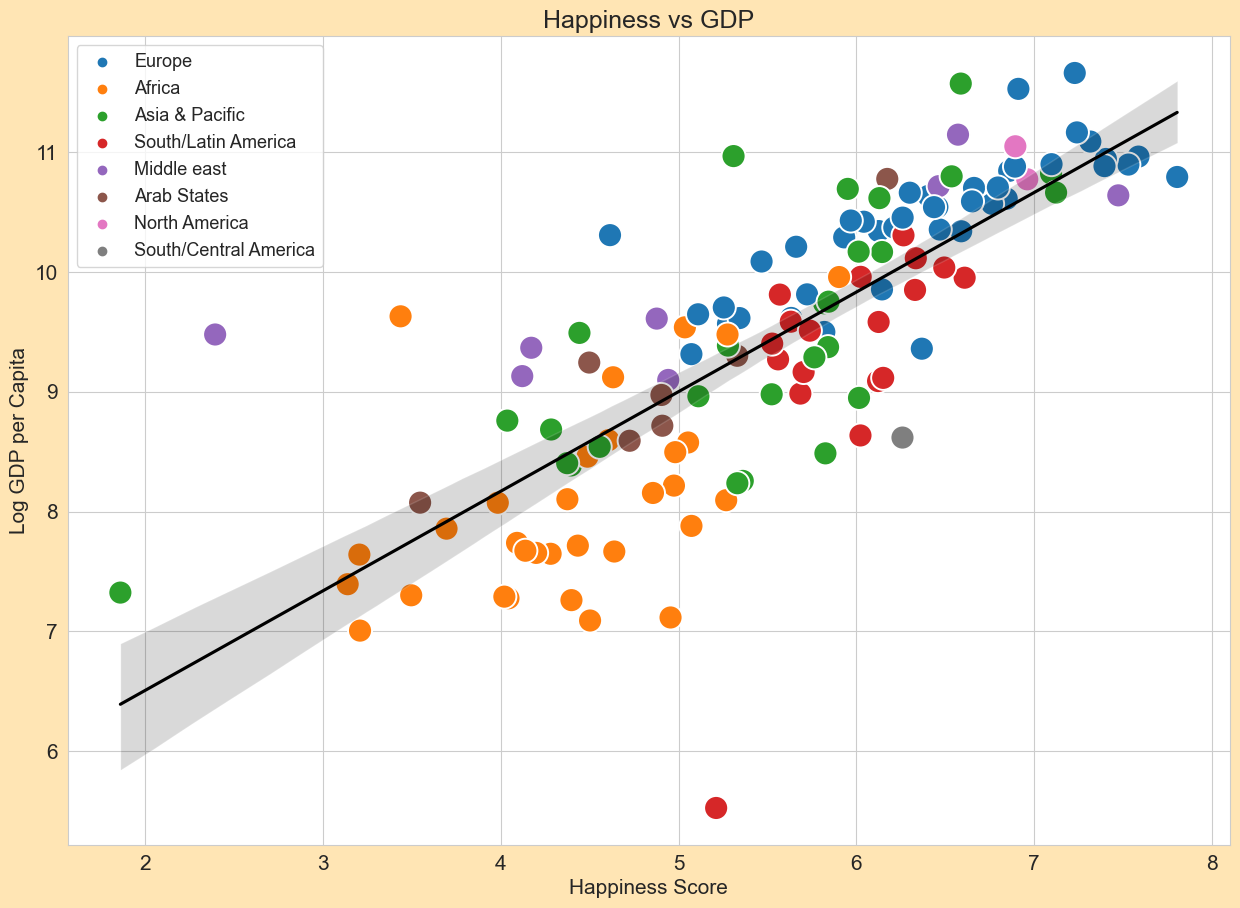

In [36]:
# Plot happiness_score and log_gdp_per_capita

plt.rcParams['figure.figsize'] = (15,10.5)
plt.title('Happiness vs GDP')
ax = happ_gdp_corr = sns.scatterplot(x = data_2023.happiness_score,
                                     y = data_2023.log_gdp_per_capita, 
                                     hue_order = legend, 
                                     hue = data_2023['region'], 
                                     s = 300)
sns.regplot(data=data_2023, 
            x="happiness_score",
            y="log_gdp_per_capita",
            scatter=False, 
            line_kws={"color": "black"}, 
            ax=ax)

plt.legend(loc = 'upper left',
           fontsize = '13')
plt.xlabel('Happiness Score')
plt.ylabel('Log GDP per Capita')

Text(0, 0.5, 'Life Expectancy')

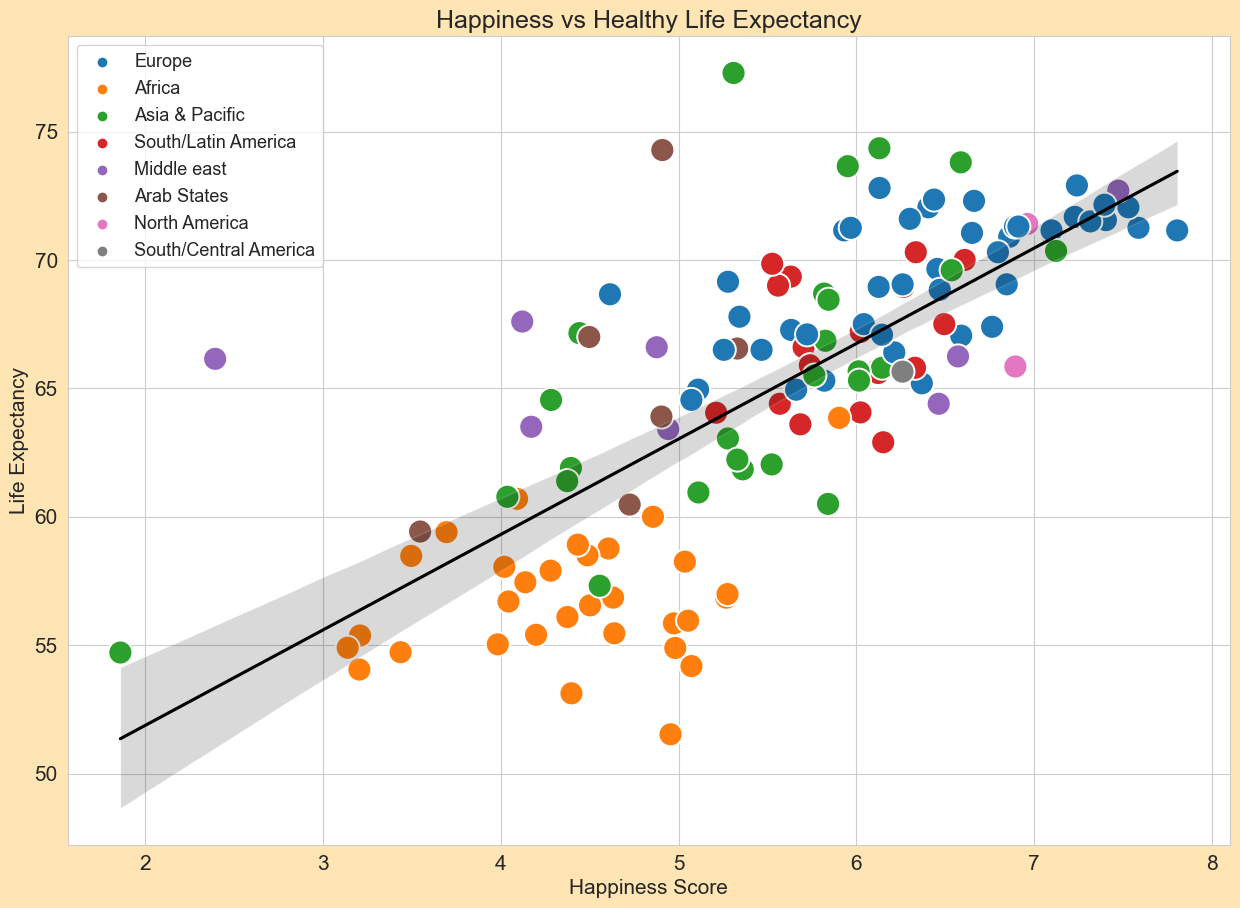

In [37]:
# Plot happiness_score and healthy_life_expectancy

plt.rcParams['figure.figsize'] = (15,10.5)
plt.title('Happiness vs Healthy Life Expectancy')
ax = happ_gdp_corr = sns.scatterplot(x = data_2023.happiness_score,
                                     y = data_2023.life_expectancy, 
                                     hue_order = legend, 
                                     hue = data_2023['region'], 
                                     s = 300)
sns.regplot(data=data_2023, 
            x="happiness_score",
            y="life_expectancy",
            scatter=False, 
            line_kws={"color": "black"}, 
            ax=ax)

plt.legend(loc = 'upper left',
           fontsize = '13')
plt.xlabel('Happiness Score')
plt.ylabel('Life Expectancy')

In [38]:
# Top 10 happiest countries in 2023

bar_high = data_2023.sort_values('happiness_score').sort_values('happiness_score', ascending=False).head(10)
bar_low = data_2023.sort_values('happiness_score').sort_values('happiness_score', ascending=True).head(10)

bar = pd.concat([bar_high,bar_low]).sort_values('happiness_score', ascending=False)
bar

country_name          region  happiness_score  log_gdp_per_capita  \
39          Finland          Europe           7.8042           10.792010   
32          Denmark          Europe           7.5864           10.962164   
52          Iceland          Europe           7.5296           10.895531   
58           Israel     Middle east           7.4729           10.638705   
90      Netherlands          Europe           7.4030           10.942279   
117          Sweden          Europe           7.3952           10.882823   
95           Norway          Europe           7.3155           11.087730   
118     Switzerland          Europe           7.2401           11.164027   
72       Luxembourg          Europe           7.2279           11.659949   
91      New Zealand  Asia & Pacific           7.1229           10.661865   
135          Zambia          Africa           3.9822            8.073852   
121        Tanzania          Africa           3.6938            7.857412   
24          Comoros     Arab States           3.5452            8.074592   
75           Malawi          Africa           3.4952            7.301523   
13         Botswana          Africa           3.4353            9.629346   
26   Congo Kinshasa          Africa           3.2072            7.006671   
136        Zimbabwe          Africa           3.2035            7.640998   
109    Sierra Leone          Africa           3.1376            7.394014   
69          Lebanon     Middle east           2.3922            9.477677   
0       Afghanistan  Asia & Pacific           1.8590            7.324032   

     social_support  life_expectancy   freedom  generosity  \
39         0.968770        71.149994  0.961408   -0.018824   
32         0.954112        71.250145  0.933533    0.134242   
52         0.982533        72.050018  0.936349    0.210987   
58         0.943344        72.697205  0.808866   -0.023080   
90         0.930499        71.550018  0.886875    0.212686   
117        0.939249        72.150154  0.947971    0.164789   
95         0.943477        71.500023  0.946616    0.140636   
118        0.920439        72.899956  0.891074    0.026686   
72         0.878501        71.675003  0.914938    0.023950   
91         0.952398        70.350052  0.886574    0.174828   
135        0.693536        55.032139  0.790871    0.098389   
121        0.652875        59.401485  0.837927    0.181990   
24         0.470725        59.424999  0.469872   -0.014281   
75         0.530796        58.475346  0.750036    0.005193   
13         0.753311        54.724998  0.742249   -0.214621   
26         0.651610        55.375000  0.663798    0.085998   
136        0.689918        54.049889  0.654055   -0.046230   
109        0.555251        54.899853  0.660367    0.104929   
69         0.529754        66.148819  0.473900   -0.140915   
0          0.341341        54.712410  0.381642   -0.081011   

     perception_of_corruption  
39                   0.181745  
32                   0.195814  
52                   0.667848  
58                   0.708094  
90                   0.378929  
117                  0.202448  
95                   0.282745  
118                  0.266348  
72                   0.344978  
91                   0.271205  
135                  0.817557  
121                  0.553873  
24                   0.726998  
75                   0.748949  
13                   0.830392  
26                   0.833752  
136                  0.765582  
109                  0.857780  
69                   0.891104  
0                    0.847215

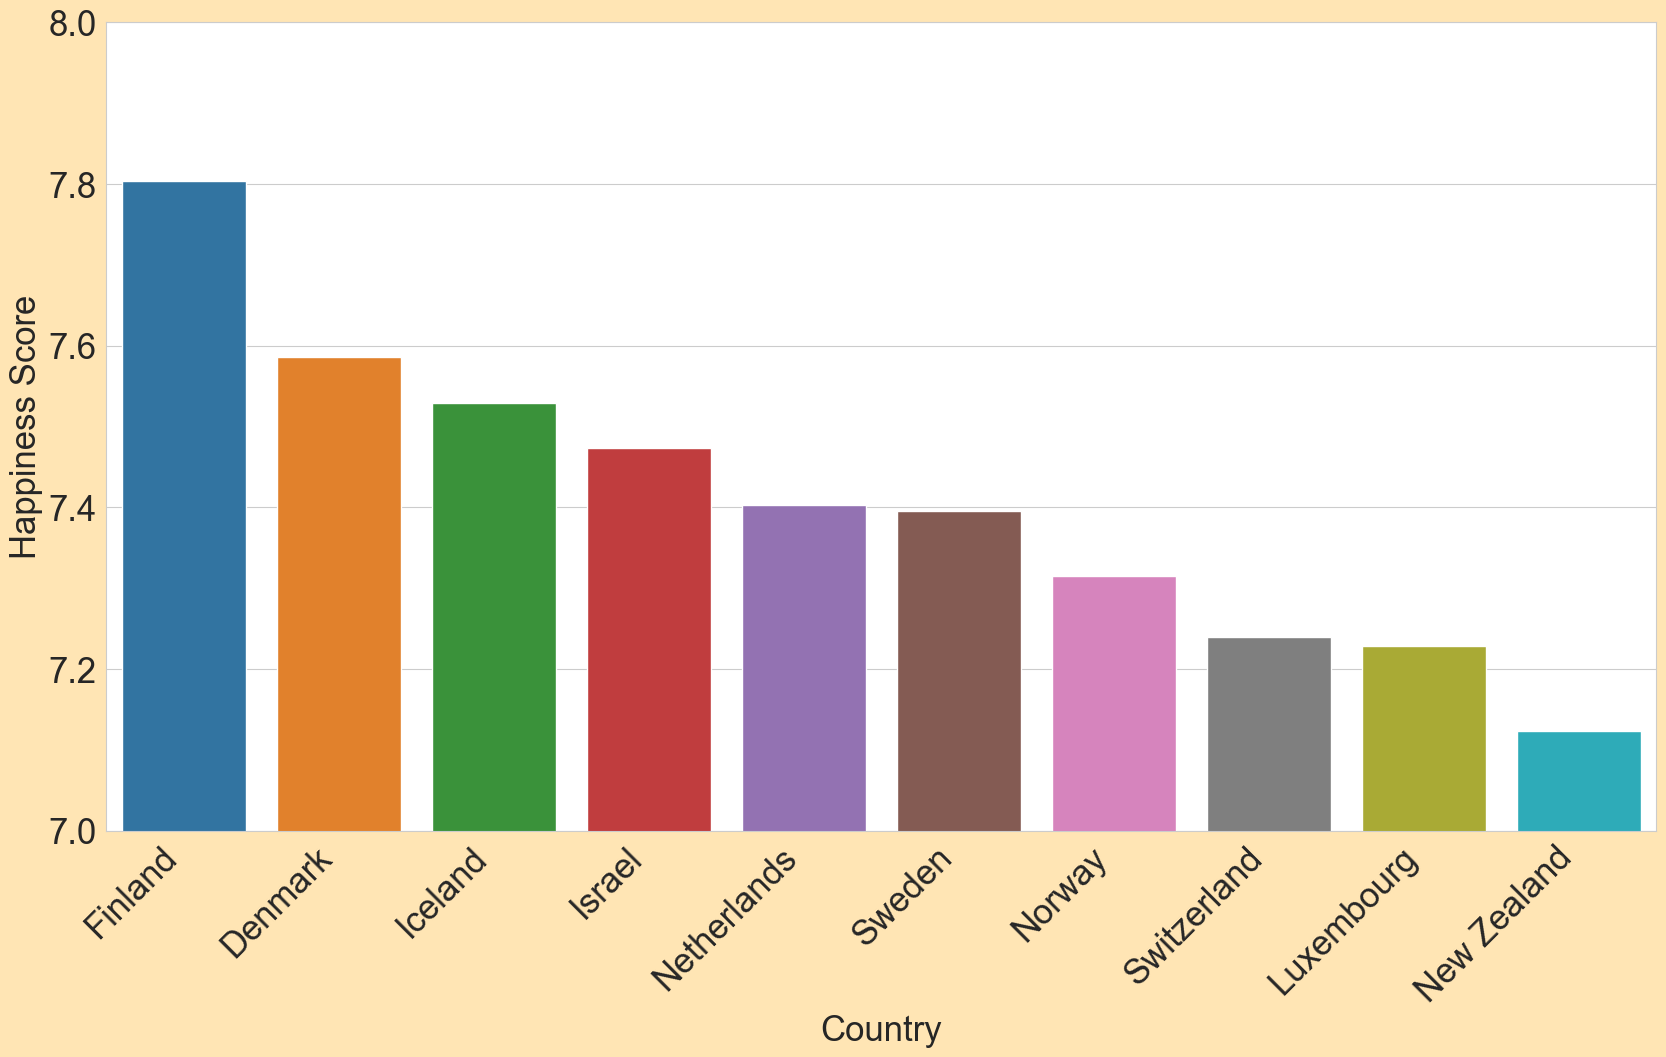

In [49]:
# Top 10 highest happiness_score

ax = sns.barplot(data=bar_high, x='country_name', y='happiness_score')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylim(7, 8)
plt.xlabel('Country', fontsize=25)
plt.ylabel('Happiness Score', fontsize=25)
plt.tick_params(labelsize=25)

plt.show()

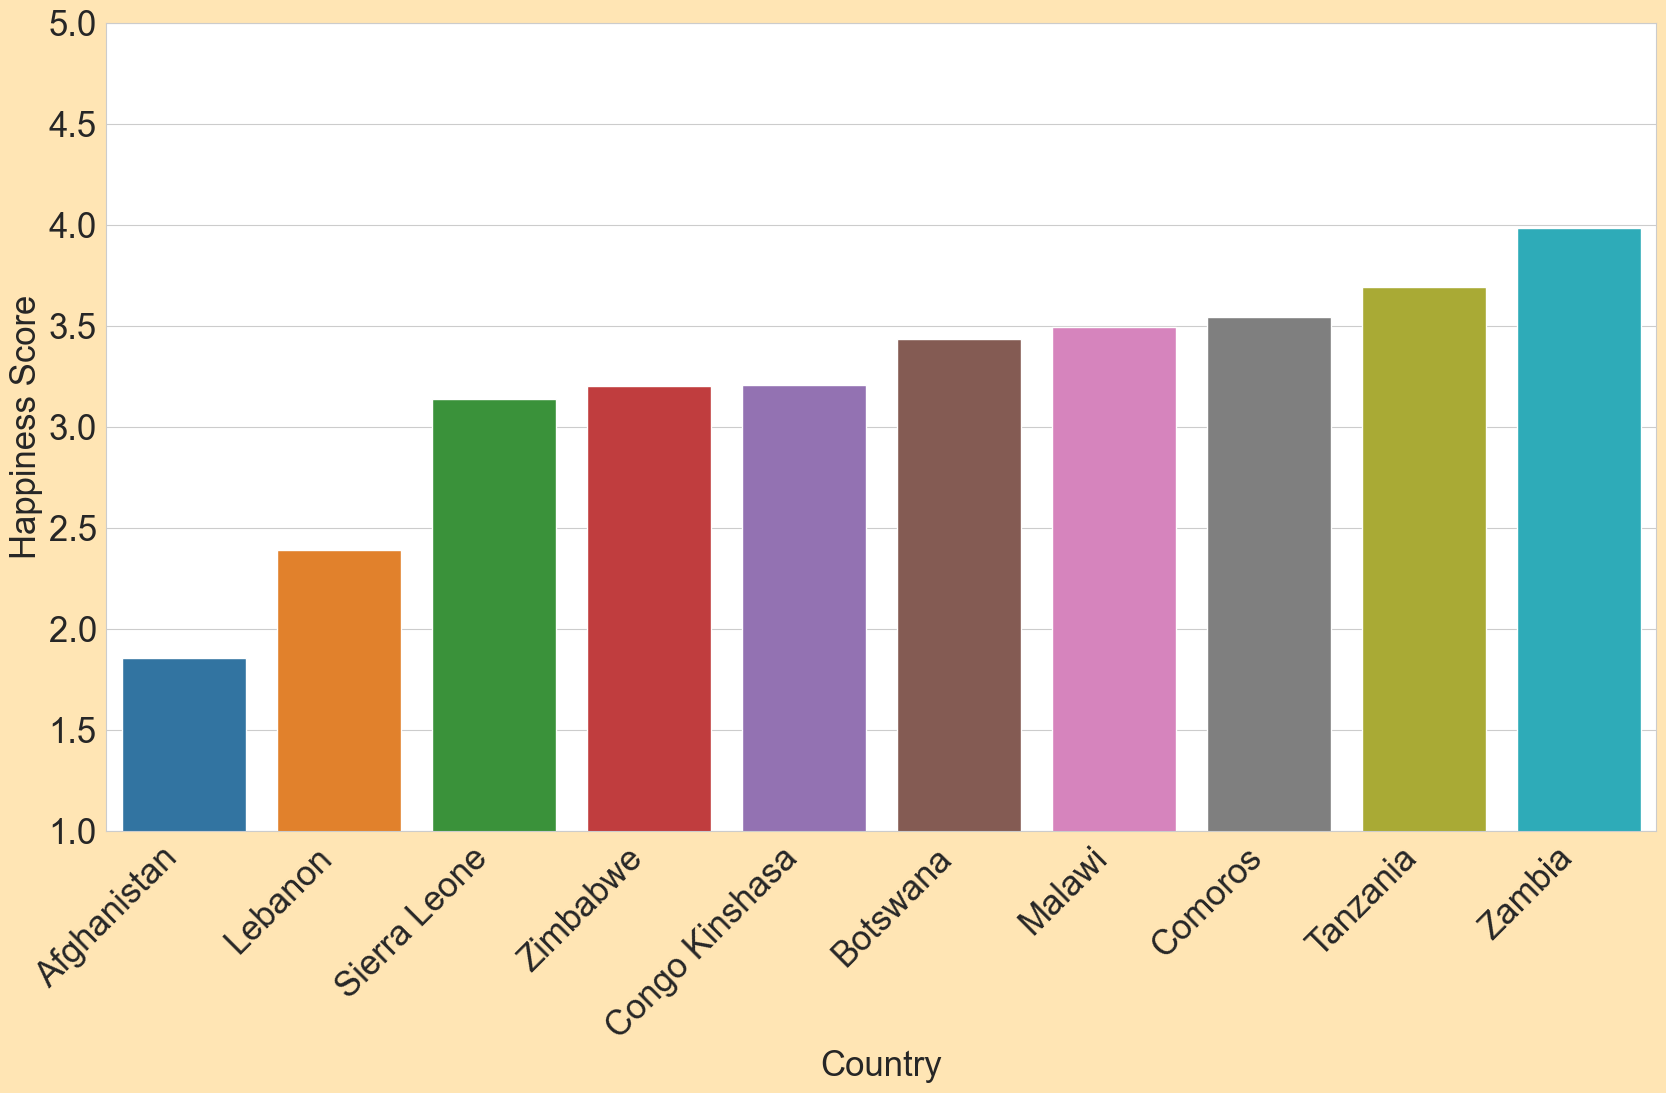

In [50]:
# Top 10 lowest happiness_score

ax = sns.barplot(data=bar_low, x='country_name', y='happiness_score')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylim(1, 5)
plt.xlabel('Country', fontsize=25)
plt.ylabel('Happiness Score', fontsize=25)
plt.tick_params(labelsize=25)

plt.show()

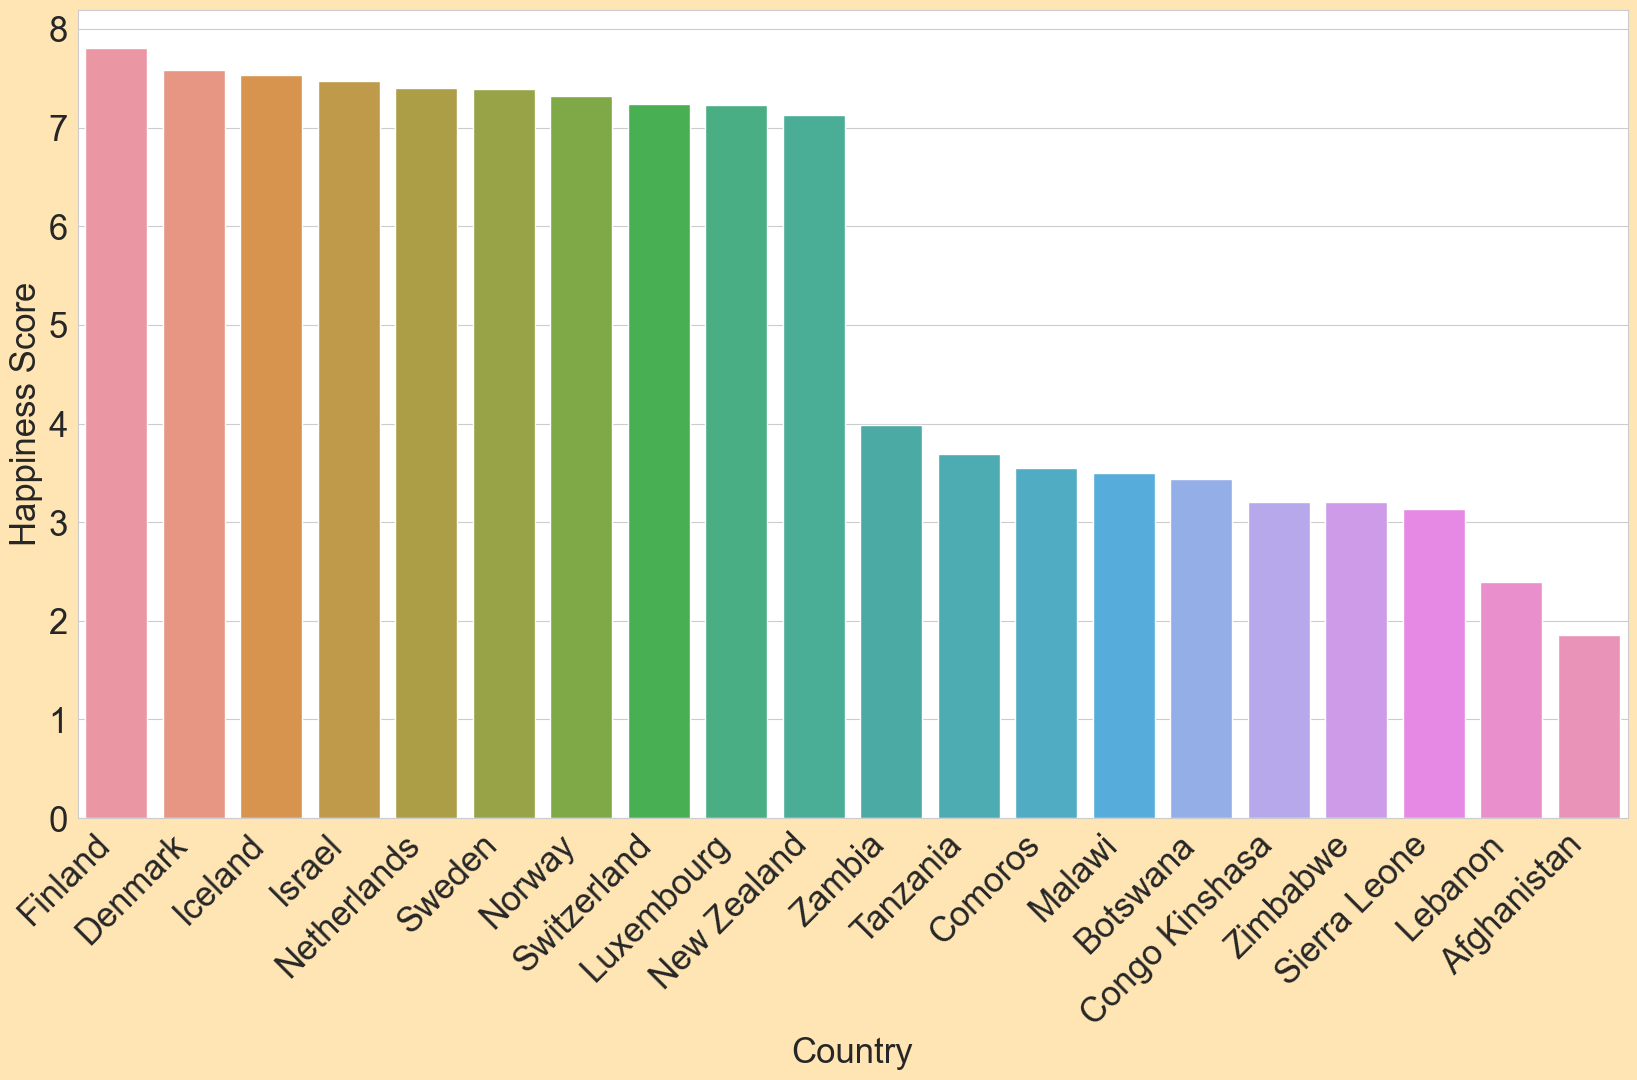

In [52]:
# Top 10 highest and lowest happiness_score

ax = sns.barplot(data=bar, x='country_name', y='happiness_score')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel('Country', fontsize=25)
plt.ylabel('Happiness Score', fontsize=25)
plt.tick_params(labelsize=25)

plt.show()

### All Years Prep

In [53]:
data.head(10)

Country name  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008     3.723590            7.350416        0.450662   
1  Afghanistan  2009     4.401778            7.508646        0.552308   
2  Afghanistan  2010     4.758381            7.613900        0.539075   
3  Afghanistan  2011     3.831719            7.581259        0.521104   
4  Afghanistan  2012     3.782938            7.660506        0.520637   
5  Afghanistan  2013     3.572100            7.680333        0.483552   
6  Afghanistan  2014     3.130896            7.670638        0.525568   
7  Afghanistan  2015     3.982855            7.653833        0.528597   
8  Afghanistan  2016     4.220169            7.650370        0.559072   
9  Afghanistan  2017     2.661718            7.647830        0.490880   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                         50.500000                      0.718114    0.167652   
1                         50.799999                      0.678896    0.190809   
2                         51.099998                      0.600127    0.121316   
3                         51.400002                      0.495901    0.163571   
4                         51.700001                      0.530935    0.237588   
5                         52.000000                      0.577955    0.062666   
6                         52.299999                      0.508514    0.105755   
7                         52.599998                      0.388928    0.081652   
8                         52.924999                      0.522566    0.043916   
9                         53.250000                      0.427011   -0.119410   

   Perceptions of corruption  Positive affect  Negative affect  
0                   0.881686         0.414297         0.258195  
1                   0.850035         0.481421         0.237092  
2                   0.706766         0.516907         0.275324  
3                   0.731109         0.479835         0.267175  
4                   0.775620         0.613513         0.267919  
5                   0.823204         0.547417         0.273328  
6                   0.871242         0.491641         0.374861  
7                   0.880638         0.491410         0.339276  
8                   0.793246         0.501409         0.348332  
9                   0.954393         0.435270         0.371326

In [54]:
# Drop unwanted columns

data = data.drop(['Positive affect', 'Negative affect'], axis=1)

In [55]:
# Rename columns

data = data.rename(columns = {'Country name':'country_name',
                              'Life Ladder':'happiness_score',
                              'Log GDP per capita':'log_gdp_per_capita',
                              'Social support':'social_support',
                              'Healthy life expectancy at birth':'life_expectancy',
                              'Freedom to make life choices':'freedom',
                              'Generosity':'generosity',
                              'Perceptions of corruption':'perception_of_corruption'})
list(data.columns)

['country_name',
 'year',
 'happiness_score',
 'log_gdp_per_capita',
 'social_support',
 'life_expectancy',
 'freedom',
 'generosity',
 'perception_of_corruption']

In [56]:
## Use country_region to add regions to data
# Create copy to work on

test_data = data

In [57]:
# Merge with country_region to add region

test_data = pd.merge(test_data, country_region, how = 'left', on = 'country_name')
data_columns = ['country_name',
                'region',
                'year',
                'happiness_score',
                'log_gdp_per_capita',
                'social_support',
                'life_expectancy',
                'freedom',
                'generosity',
                'perception_of_corruption']
test_data = test_data[data_columns]
test_data.head(10)

country_name          region  year  happiness_score  log_gdp_per_capita  \
0  Afghanistan  Asia & Pacific  2008         3.723590            7.350416   
1  Afghanistan  Asia & Pacific  2009         4.401778            7.508646   
2  Afghanistan  Asia & Pacific  2010         4.758381            7.613900   
3  Afghanistan  Asia & Pacific  2011         3.831719            7.581259   
4  Afghanistan  Asia & Pacific  2012         3.782938            7.660506   
5  Afghanistan  Asia & Pacific  2013         3.572100            7.680333   
6  Afghanistan  Asia & Pacific  2014         3.130896            7.670638   
7  Afghanistan  Asia & Pacific  2015         3.982855            7.653833   
8  Afghanistan  Asia & Pacific  2016         4.220169            7.650370   
9  Afghanistan  Asia & Pacific  2017         2.661718            7.647830   

   social_support  life_expectancy   freedom  generosity  \
0        0.450662        50.500000  0.718114    0.167652   
1        0.552308        50.799999  0.678896    0.190809   
2        0.539075        51.099998  0.600127    0.121316   
3        0.521104        51.400002  0.495901    0.163571   
4        0.520637        51.700001  0.530935    0.237588   
5        0.483552        52.000000  0.577955    0.062666   
6        0.525568        52.299999  0.508514    0.105755   
7        0.528597        52.599998  0.388928    0.081652   
8        0.559072        52.924999  0.522566    0.043916   
9        0.490880        53.250000  0.427011   -0.119410   

   perception_of_corruption  
0                  0.881686  
1                  0.850035  
2                  0.706766  
3                  0.731109  
4                  0.775620  
5                  0.823204  
6                  0.871242  
7                  0.880638  
8                  0.793246  
9                  0.954393

In [58]:
test_data_country_region = test_data[['country_name','region']].drop_duplicates()
test_data_country_region

country_name                 region
0                   Afghanistan         Asia & Pacific
14                      Albania                 Europe
29                      Algeria            Arab States
39                       Angola                 Africa
43                    Argentina    South/Latin America
60                      Armenia                 Europe
76                    Australia         Asia & Pacific
92                      Austria                 Europe
107                  Azerbaijan         Asia & Pacific
121                     Bahrain            Arab States
132                  Bangladesh         Asia & Pacific
149                     Belarus                 Europe
163                     Belgium                 Europe
179                      Belize    South/Latin America
181                       Benin                 Africa
195                      Bhutan         Asia & Pacific
198                     Bolivia    South/Latin America
215      Bosnia and Herzegovina                 Europe
229                    Botswana                 Africa
242                      Brazil    South/Latin America
259                    Bulgaria                 Europe
273                Burkina Faso                 Africa
288                     Burundi                 Africa
293                    Cambodia         Asia & Pacific
310                    Cameroon                 Africa
327                      Canada          North America
344    Central African Republic                 Africa
349                        Chad                 Africa
364                       Chile    South/Latin America
381                       China         Asia & Pacific
397                    Colombia    South/Latin America
414                     Comoros            Arab States
421         Congo (Brazzaville)                    NaN
434            Congo (Kinshasa)                    NaN
443                  Costa Rica    South/Latin America
460                     Croatia                 Europe
475                        Cuba    South/Latin America
476                      Cyprus                 Europe
491                     Czechia                    NaN
505                     Denmark                 Europe
522                    Djibouti            Arab States
526          Dominican Republic    South/Latin America
543                     Ecuador    South/Latin America
560                       Egypt            Middle east
577                 El Salvador    South/Latin America
594                     Estonia                 Europe
610                    Eswatini                 Africa
613                    Ethiopia                 Africa
623                     Finland                 Europe
638                      France                 Europe
655                       Gabon                 Africa
667                      Gambia                 Africa
671                     Georgia                 Europe
688                     Germany                 Europe
705                       Ghana                 Africa
722                      Greece                 Europe
738                   Guatemala    South/Latin America
753                      Guinea                 Africa
765                      Guyana    South/Latin America
766                       Haiti    South/Latin America
777                    Honduras    South/Latin America
793   Hong Kong S.A.R. of China                    NaN
805                     Hungary                 Europe
821                     Iceland                 Europe
831                       India         Asia & Pacific
848                   Indonesia         Asia & Pacific
865                        Iran            Middle east
880                        Iraq            Middle east
893                     Ireland                 Europe
909                      Israel            Middle east
926                       Italy                 Europe
943                 Ivory Coast                    NaN
954 

In [59]:
test_data_country_region.shape

(165, 2)

In [60]:
# Check for NaN region

test_data_country_region['region'].isna().any()

True

In [61]:
# Locate NaN rows

test_data_country_region[test_data_country_region.isnull().any(axis=1)]

country_name region
421         Congo (Brazzaville)    NaN
434            Congo (Kinshasa)    NaN
491                     Czechia    NaN
793   Hong Kong S.A.R. of China    NaN
943                 Ivory Coast    NaN
1458            North Macedonia    NaN
1755          Somaliland region    NaN
1828         State of Palestine    NaN
1878                      Syria    NaN
1885   Taiwan Province of China    NaN

In [62]:
country_region

country_name                 region
0                                     Afghanistan         Asia & Pacific
1                                   Aland Islands                 Europe
2                                         Albania                 Europe
3                                         Algeria            Arab States
4                                  American Samoa         Asia & Pacific
5                                         Andorra                 Europe
6                                          Angola                 Africa
7                                        Anguilla    South/Latin America
8                                      Antarctica         Asia & Pacific
9                             Antigua and Barbuda    South/Latin America
10                                      Argentina    South/Latin America
11                                        Armenia                 Europe
12                                          Aruba    South/Latin America
13                                      Australia         Asia & Pacific
14                                        Austria                 Europe
15                                     Azerbaijan         Asia & Pacific
16                                        Bahamas    South/Latin America
17                                        Bahrain            Arab States
18                                     Bangladesh         Asia & Pacific
19                                       Barbados    South/Latin America
20                                        Belarus                 Europe
21                                        Belgium                 Europe
22                                         Belize    South/Latin America
23                                          Benin                 Africa
24                                        Bermuda    South/Latin America
25                                         Bhutan         Asia & Pacific
26                                        Bolivia    South/Latin America
27                         Bosnia and Herzegovina                 Europe
28                                       Botswana                 Africa
29                                  Bouvet Island    South/Latin America
30                                         Brazil    South/Latin America
31                 British Indian Ocean Territory         Asia & Pacific
32                              Brunei Darussalam         Asia & Pacific
33                                       Bulgaria                 Europe
34                                   Burkina Faso                 Africa
35                                        Burundi                 Africa
36                                       Cambodia         Asia & Pacific
37                                       Cameroon                 Africa
38                                         Canada          North America
39                                     Cape Verde                 Africa
40                                 Cayman Islands    South/Latin America
41                       Central African Republic                 Africa
42                                           Chad                 Africa
43                                          Chile    South/Latin America
44                                          China         Asia & Pacific
45                               Christmas Island         Asia & Pacific
46                        Cocos (Keeling) Islands         Asia & Pacific
47                                       Colombia    South/Latin America
48                                        Comoros            Arab States
49                              Congo Brazzaville                 Africa
50                                 Congo Kinshasa                 Africa
51                                   Cook Islands         Asia & Pacific
52                                     Costa Rica    South/Latin America
53                                        Croatia                 Europe
54                    

In [63]:
# Correct NaN rows

test_data.loc[test_data['country_name'] == 'Congo (Brazzaville)', 'country_name'] = 'Congo Brazzaville'
test_data.loc[test_data['country_name'] == 'Congo (Kinshasa)', 'country_name'] = 'Congo Kinshasa'
test_data.loc[test_data['country_name'] == 'Czechia', 'country_name'] = 'Czech Republic'
test_data.loc[test_data['country_name'] == 'Hong Kong S.A.R. of China', 'country_name'] = 'Hong Kong'
test_data.loc[test_data['country_name'] == 'Ivory Coast', 'country_name'] = '''Côte D'Ivoire'''
test_data.loc[test_data['country_name'] == 'North Macedonia', 'country_name'] = 'Macedonia'
test_data.loc[test_data['country_name'] == 'Somaliland region', 'country_name'] = 'Somaliland'
test_data.loc[test_data['country_name'] == 'State of Palestine', 'country_name'] = 'Palestine'
test_data.loc[test_data['country_name'] == 'Taiwan Province of China', 'country_name'] = 'Taiwan'

country_region.loc[country_region['country_name'] == 'Syrian Arab Republic', 'country_name'] = 'Syria'

country_region.loc[249] = ['Somaliland', 'Africa']


In [64]:
# Merge again

test_data = test_data.rename(columns = {'region' : 'region_2'})
test_data = pd.merge(test_data, country_region, how = 'left', on = 'country_name')
test_data = test_data[data_columns]
test_data.head(30)

country_name          region  year  happiness_score  log_gdp_per_capita  \
0   Afghanistan  Asia & Pacific  2008         3.723590            7.350416   
1   Afghanistan  Asia & Pacific  2009         4.401778            7.508646   
2   Afghanistan  Asia & Pacific  2010         4.758381            7.613900   
3   Afghanistan  Asia & Pacific  2011         3.831719            7.581259   
4   Afghanistan  Asia & Pacific  2012         3.782938            7.660506   
5   Afghanistan  Asia & Pacific  2013         3.572100            7.680333   
6   Afghanistan  Asia & Pacific  2014         3.130896            7.670638   
7   Afghanistan  Asia & Pacific  2015         3.982855            7.653833   
8   Afghanistan  Asia & Pacific  2016         4.220169            7.650370   
9   Afghanistan  Asia & Pacific  2017         2.661718            7.647830   
10  Afghanistan  Asia & Pacific  2018         2.694303            7.630801   
11  Afghanistan  Asia & Pacific  2019         2.375092            7.640086   
12  Afghanistan  Asia & Pacific  2021         2.436034            7.324032   
13  Afghanistan  Asia & Pacific  2022         1.281271                 NaN   
14      Albania          Europe  2007         4.634252            9.121704   
15      Albania          Europe  2009         5.485470            9.241429   
16      Albania          Europe  2010         5.268937            9.282793   
17      Albania          Europe  2011         5.867422            9.310619   
18      Albania          Europe  2012         5.510124            9.326344   
19      Albania          Europe  2013         4.550648            9.338146   
20      Albania          Europe  2014         4.813763            9.357805   
21      Albania          Europe  2015         4.606651            9.382662   
22      Albania          Europe  2016         4.511101            9.416873   
23      Albania          Europe  2017         4.639548            9.455110   
24      Albania          Europe  2018         5.004403            9.496984   
25      Albania          Europe  2019         4.995318            9.521910   
26      Albania          Europe  2020         5.364910            9.492215   
27      Albania          Europe  2021         5.255482            9.583207   
28      Albania          Europe  2022         5.212213            9.626483   
29      Algeria     Arab States  2010         5.463567            9.306355   

    social_support  life_expectancy   freedom  generosity  \
0         0.450662        50.500000  0.718114    0.167652   
1         0.552308        50.799999  0.678896    0.190809   
2         0.539075        51.099998  0.600127    0.121316   
3         0.521104        51.400002  0.495901    0.163571   
4         0.520637        51.700001  0.530935    0.237588   
5         0.483552        52.000000  0.577955    0.062666   
6         0.525568        52.299999  0.508514    0.105755   
7         0.528597        52.599998  0.388928    0.081652   
8         0.559072        52.924999  0.522566    0.043916   
9         0.490880        53.250000  0.427011   -0.119410   
10        0.507516        53.575001  0.373536   -0.091106   
11        0.419973        53.900002  0.393656   -0.106016   
12        0.454175        54.549999  0.394306   -0.081011   
13        0.228217        54.875000  0.368377         NaN   
14        0.821372        66.760002  0.528605   -0.010429   
15        0.833047        67.320000  0.525223   -0.159259   
16        0.733152        67.599998  0.568958   -0.173675   
17        0.759434        67.879997  0.487496   -0.206186   
18        0.784502        68.160004  0.601512   -0.170467   
19        0.759477        68.440002  0.631830   -0.128825   
20        0.625587        68.720001  0.734648   -0.026298   
21        0.639356        69.000000  0.703851   -0.082492   
22        0.638411        69.025002  0.729819   -0.018664   
23        0.637698        69.050003  0.749611   -0.030506   
24        0.683592        69.074997  0.824212    0.007197  

In [65]:
# Check for NaN region again

test_data['region'].isna().any()

False

In [66]:
# Save dataframe

data = test_data

In [67]:
## Prepare data for analysis
# Check for duplicated rows 

test_data = data

test_data.duplicated().any()

False

In [68]:
# Check for missing data

test_data.isnull().sum()

country_name                  0
region                        0
year                          0
happiness_score               0
log_gdp_per_capita           20
social_support               13
life_expectancy              54
freedom                      33
generosity                   73
perception_of_corruption    116
dtype: int64

In [69]:
# Locate missing data in life_expectancy column

test_data[test_data['life_expectancy'].isnull() == True][['country_name', 'year', 'life_expectancy']]

country_name  year  life_expectancy
793     Hong Kong  2006              NaN
794     Hong Kong  2008              NaN
795     Hong Kong  2009              NaN
796     Hong Kong  2010              NaN
797     Hong Kong  2011              NaN
798     Hong Kong  2012              NaN
799     Hong Kong  2014              NaN
800     Hong Kong  2016              NaN
801     Hong Kong  2017              NaN
802     Hong Kong  2019              NaN
803     Hong Kong  2020              NaN
804     Hong Kong  2021              NaN
1031       Kosovo  2007              NaN
1032       Kosovo  2008              NaN
1033       Kosovo  2009              NaN
1034       Kosovo  2010              NaN
1035       Kosovo  2011              NaN
1036       Kosovo  2012              NaN
1037       Kosovo  2013              NaN
1038       Kosovo  2014              NaN
1039       Kosovo  2015              NaN
1040       Kosovo  2016              NaN
1041       Kosovo  2017              NaN
1042       Kosovo  2018              NaN
1043       Kosovo  2019              NaN
1044       Kosovo  2020              NaN
1045       Kosovo  2021              NaN
1046       Kosovo  2022              NaN
1755   Somaliland  2009              NaN
1756   Somaliland  2010              NaN
1757   Somaliland  2011              NaN
1758   Somaliland  2012              NaN
1833    Palestine  2011              NaN
1834    Palestine  2012              NaN
1835    Palestine  2013              NaN
1836    Palestine  2014              NaN
1837    Palestine  2015              NaN
1838    Palestine  2016              NaN
1839    Palestine  2017              NaN
1840    Palestine  2018              NaN
1841    Palestine  2019              NaN
1842    Palestine  2022              NaN
1888       Taiwan  2011              NaN
1889       Taiwan  2012              NaN
1890       Taiwan  2013              NaN
1891       Taiwan  2014              NaN
1892       Taiwan  2015              NaN
1893       Taiwan  2016              NaN
1894       Taiwan  2017              NaN
1895       Taiwan  2018              NaN
1896       Taiwan  2019              NaN
1897       Taiwan  2020              NaN
1898       Taiwan  2021              NaN
1899       Taiwan  2022              NaN

In [70]:
# Fill in missing life_expectancy for Hong Kong and Kosovo with data from ourworldindata.org

world_life_expectancy.head(10)

Data Source World Development Indicators  \
0                          NaN                          NaN   
1            Last Updated Date          2023-09-19 00:00:00   
2                          NaN                          NaN   
3                 Country Name                 Country Code   
4                        Aruba                          ABW   
5  Africa Eastern and Southern                          AFE   
6                  Afghanistan                          AFG   
7   Africa Western and Central                          AFW   
8                       Angola                          AGO   
9                      Albania                          ALB   

                                Unnamed: 2      Unnamed: 3   Unnamed: 4  \
0                                      NaN             NaN          NaN   
1                                      NaN             NaN          NaN   
2                                      NaN             NaN          NaN   
3                           Indicator Name  Indicator Code  1960.000000   
4  Life expectancy at birth, total (years)  SP.DYN.LE00.IN    64.152000   
5  Life expectancy at birth, total (years)  SP.DYN.LE00.IN    44.085552   
6  Life expectancy at birth, total (years)  SP.DYN.LE00.IN    32.535000   
7  Life expectancy at birth, total (years)  SP.DYN.LE00.IN    37.845152   
8  Life expectancy at birth, total (years)  SP.DYN.LE00.IN    38.211000   
9  Life expectancy at birth, total (years)  SP.DYN.LE00.IN    54.439000   

    Unnamed: 5   Unnamed: 6   Unnamed: 7   Unnamed: 8   Unnamed: 9  ...  \
0          NaN          NaN          NaN          NaN          NaN  ...   
1          NaN          NaN          NaN          NaN          NaN  ...   
2          NaN          NaN          NaN          NaN          NaN  ...   
3  1961.000000  1962.000000  1963.000000  1964.000000  1965.000000  ...   
4    64.537000    64.752000    65.132000    65.294000    65.502000  ...   
5    44.386697    44.752182    44.913159    45.479043    45.498338  ...   
6    33.068000    33.547000    34.016000    34.494000    34.953000  ...   
7    38.164950    38.735102    39.063715    39.335360    39.618038  ...   
8    37.267000    37.539000    37.824000    38.131000    38.495000  ...   
9    55.634000    56.671000    57.844000    58.983000    60.019000  ...   

   Unnamed: 57  Unnamed: 58  Unnamed: 59  Unnamed: 60  Unnamed: 61  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          NaN          NaN   
3  2013.000000  2014.000000  2015.000000  2016.000000  2017.000000   
4    75.636000    75.601000    75.683000    75.617000    75.903000   
5    60.709870    61.337917    61.856458    62.444050    62.922390   
6    62.417000    62.545000    62.659000    63.136000    63.016000   
7    55.673406    55.922229    56.195872    56.581678    56.888446   
8    59.307000    60.040000    60.655000    61.092000    61.680000   
9    78.123000    78.407000    78.644000    78.860000    79.047000   

   Unnamed: 62  Unnamed: 63  Unnamed: 64  Unnamed: 65  Unnamed: 66  
0          NaN          NaN          NaN          NaN          NaN  
1          NaN          NaN          NaN          NaN          NaN  
2          NaN          NaN          NaN          NaN          NaN  
3  2018.000000  2019.000000  2020.000000  2021.000000       2022.0  
4    76.072000    76.248000    75.723000    74.626000          NaN  
5    63.365863    63.755678    63.313860    62.454590          NaN  
6    63.081000    63.565000    62.575000    61.982000          NaN  
7    57.189139    57.555796    57.226373    56.988657          NaN  
8    62.144000    62.448000    62.261000    61.643000          NaN  
9    79.184000    79.282000    76.989000    76.463000          NaN  

[10 rows x 67 columns]

In [71]:
# CLean world_life_expectancy for use

world_life_expectancy = world_life_expectancy.drop(world_life_expectancy.index[[0, 1, 2]]).reset_index().drop('index', axis=1)

new_header = world_life_expectancy.iloc[0].to_list()
world_life_expectancy = world_life_expectancy[1:]
world_life_expectancy.columns = new_header

In [72]:
world_life_expectancy.head(10)

Country Name Country Code  \
1                         Aruba          ABW   
2   Africa Eastern and Southern          AFE   
3                   Afghanistan          AFG   
4    Africa Western and Central          AFW   
5                        Angola          AGO   
6                       Albania          ALB   
7                       Andorra          AND   
8                    Arab World          ARB   
9          United Arab Emirates          ARE   
10                    Argentina          ARG   

                             Indicator Name  Indicator Code     1960.0  \
1   Life expectancy at birth, total (years)  SP.DYN.LE00.IN  64.152000   
2   Life expectancy at birth, total (years)  SP.DYN.LE00.IN  44.085552   
3   Life expectancy at birth, total (years)  SP.DYN.LE00.IN  32.535000   
4   Life expectancy at birth, total (years)  SP.DYN.LE00.IN  37.845152   
5   Life expectancy at birth, total (years)  SP.DYN.LE00.IN  38.211000   
6   Life expectancy at birth, total (years)  SP.DYN.LE00.IN  54.439000   
7   Life expectancy at birth, total (years)  SP.DYN.LE00.IN        NaN   
8   Life expectancy at birth, total (years)  SP.DYN.LE00.IN  44.972899   
9   Life expectancy at birth, total (years)  SP.DYN.LE00.IN  48.811000   
10  Life expectancy at birth, total (years)  SP.DYN.LE00.IN  63.978000   

       1961.0     1962.0     1963.0     1964.0     1965.0  ...     2013.0  \
1   64.537000  64.752000  65.132000  65.294000  65.502000  ...  75.636000   
2   44.386697  44.752182  44.913159  45.479043  45.498338  ...  60.709870   
3   33.068000  33.547000  34.016000  34.494000  34.953000  ...  62.417000   
4   38.164950  38.735102  39.063715  39.335360  39.618038  ...  55.673406   
5   37.267000  37.539000  37.824000  38.131000  38.495000  ...  59.307000   
6   55.634000  56.671000  57.844000  58.983000  60.019000  ...  78.123000   
7         NaN        NaN        NaN        NaN        NaN  ...        NaN   
8   45.676401  46.122576  46.972472  47.895758  48.232107  ...  70.196514   
9   49.695000  50.686000  51.584000  52.848000  53.985000  ...  78.853000   
10  64.360000  64.244000  64.449000  64.363000  64.593000  ...  76.491000   

       2014.0     2015.0     2016.0     2017.0     2018.0     2019.0  \
1   75.601000  75.683000  75.617000  75.903000  76.072000  76.248000   
2   61.337917  61.856458  62.444050  62.922390  63.365863  63.755678   
3   62.545000  62.659000  63.136000  63.016000  63.081000  63.565000   
4   55.922229  56.195872  56.581678  56.888446  57.189139  57.555796   
5   60.040000  60.655000  61.092000  61.680000  62.144000  62.448000   
6   78.407000  78.644000  78.860000  79.047000  79.184000  79.282000   
7         NaN        NaN        NaN        NaN        NaN        NaN   
8   70.492629  70.758222  70.943062  71.429596  71.633017  71.844626   
9   79.044000  79.223000  79.335000  79.504000  79.627000  79.726000   
10  76.755000  76.760000  76.308000  76.833000  76.999000  77.284000   

       2020.0     2021.0  2022.0  
1   75.723000  74.626000     NaN  
2   63.313860  62.454590     NaN  
3   62.575000  61.982000     NaN  
4   57.226373  56.988657     NaN  
5   62.261000  61.643000     NaN  
6   76.989000  76.463000     NaN  
7         NaN        NaN     NaN  
8   70.923360  70.814483     NaN  
9   78.946000  78.710000     NaN  
10  75.892000  75.390000     NaN  

[10 rows x 67 columns]

In [73]:
# Drop unnecessary columns

world_life_expectancy_columns = ['Country Name',2005.0,
                                                 2006.0,
                                                 2007.0,
                                                 2008.0,
                                                 2009.0,
                                                 2010.0,
                                                 2011.0,
                                                 2012.0,
                                                 2013.0,
                                                 2014.0,
                                                 2015.0,
                                                 2016.0,
                                                 2017.0,
                                                 2018.0,
                                                 2019.0,
                                                 2020.0,
                                                 2021.0,
                                                 2022.0]
world_life_expectancy = world_life_expectancy[world_life_expectancy_columns]
list(world_life_expectancy.columns)

['Country Name',
 2005.0,
 2006.0,
 2007.0,
 2008.0,
 2009.0,
 2010.0,
 2011.0,
 2012.0,
 2013.0,
 2014.0,
 2015.0,
 2016.0,
 2017.0,
 2018.0,
 2019.0,
 2020.0,
 2021.0,
 2022.0]

In [74]:
# Rename Columns

world_life_expectancy = world_life_expectancy.rename(columns = {'Country Name' : 'country_name',
                                                                2005.0 : 2005,
                                                                2006.0 : 2006,
                                                                2007.0 : 2007,
                                                                2008.0 : 2008,
                                                                2009.0 : 2009,
                                                                2010.0 : 2010,
                                                                2011.0 : 2011,
                                                                2012.0 : 2012,
                                                                2013.0 : 2013,
                                                                2014.0 : 2014,
                                                                2015.0 : 2015,
                                                                2016.0 : 2016,
                                                                2017.0 : 2017,
                                                                2018.0 : 2018,
                                                                2019.0 : 2019,
                                                                2020.0 : 2020,
                                                                2021.0 : 2021,
                                                                2022.0 : 2022})
list(world_life_expectancy.columns)

['country_name',
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022]

In [75]:
# Melt world_life_expectancy to match format of data_2

melted_world_life_expectancy = pd.melt(world_life_expectancy, id_vars=['country_name'], var_name='year', value_name='life_expectancy')
world_life_expectancy = melted_world_life_expectancy.sort_values(['country_name','year']).reset_index().drop('index', axis=1)
world_life_expectancy.head(10)

country_name  year  life_expectancy
0  Afghanistan  2005           58.361
1  Afghanistan  2006           58.684
2  Afghanistan  2007           59.111
3  Afghanistan  2008           59.852
4  Afghanistan  2009           60.364
5  Afghanistan  2010           60.851
6  Afghanistan  2011           61.419
7  Afghanistan  2012           61.923
8  Afghanistan  2013           62.417
9  Afghanistan  2014           62.545

In [76]:
# Check table for NaN rows

world_life_expectancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4788 entries, 0 to 4787
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country_name     4788 non-null   object 
 1   year             4788 non-null   object 
 2   life_expectancy  4383 non-null   float64
dtypes: float64(1), object(2)
memory usage: 112.3+ KB


In [77]:
# Drop NaN rows

world_life_expectancy = world_life_expectancy[world_life_expectancy['life_expectancy'].isna() == False].reset_index().drop('index', axis =1)

world_life_expectancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country_name     4383 non-null   object 
 1   year             4383 non-null   object 
 2   life_expectancy  4383 non-null   float64
dtypes: float64(1), object(2)
memory usage: 102.9+ KB


In [78]:
# Rename column to avoid duplicates during merge.
# Rename country_name to match data_2

world_life_expectancy = world_life_expectancy.rename(columns = {'life_expectancy' : 'life_expectancy_new'})

world_life_expectancy.loc[world_life_expectancy['country_name'] == 'Hong Kong SAR, China', 'country_name'] = 'Hong Kong'

In [79]:
# Merge world_life_expectancy with data_2

merge = pd.merge(test_data,world_life_expectancy, how = 'left', on = ['country_name','year'])
merge.head(30)

country_name          region  year  happiness_score  log_gdp_per_capita  \
0   Afghanistan  Asia & Pacific  2008         3.723590            7.350416   
1   Afghanistan  Asia & Pacific  2009         4.401778            7.508646   
2   Afghanistan  Asia & Pacific  2010         4.758381            7.613900   
3   Afghanistan  Asia & Pacific  2011         3.831719            7.581259   
4   Afghanistan  Asia & Pacific  2012         3.782938            7.660506   
5   Afghanistan  Asia & Pacific  2013         3.572100            7.680333   
6   Afghanistan  Asia & Pacific  2014         3.130896            7.670638   
7   Afghanistan  Asia & Pacific  2015         3.982855            7.653833   
8   Afghanistan  Asia & Pacific  2016         4.220169            7.650370   
9   Afghanistan  Asia & Pacific  2017         2.661718            7.647830   
10  Afghanistan  Asia & Pacific  2018         2.694303            7.630801   
11  Afghanistan  Asia & Pacific  2019         2.375092            7.640086   
12  Afghanistan  Asia & Pacific  2021         2.436034            7.324032   
13  Afghanistan  Asia & Pacific  2022         1.281271                 NaN   
14      Albania          Europe  2007         4.634252            9.121704   
15      Albania          Europe  2009         5.485470            9.241429   
16      Albania          Europe  2010         5.268937            9.282793   
17      Albania          Europe  2011         5.867422            9.310619   
18      Albania          Europe  2012         5.510124            9.326344   
19      Albania          Europe  2013         4.550648            9.338146   
20      Albania          Europe  2014         4.813763            9.357805   
21      Albania          Europe  2015         4.606651            9.382662   
22      Albania          Europe  2016         4.511101            9.416873   
23      Albania          Europe  2017         4.639548            9.455110   
24      Albania          Europe  2018         5.004403            9.496984   
25      Albania          Europe  2019         4.995318            9.521910   
26      Albania          Europe  2020         5.364910            9.492215   
27      Albania          Europe  2021         5.255482            9.583207   
28      Albania          Europe  2022         5.212213            9.626483   
29      Algeria     Arab States  2010         5.463567            9.306355   

    social_support  life_expectancy   freedom  generosity  \
0         0.450662        50.500000  0.718114    0.167652   
1         0.552308        50.799999  0.678896    0.190809   
2         0.539075        51.099998  0.600127    0.121316   
3         0.521104        51.400002  0.495901    0.163571   
4         0.520637        51.700001  0.530935    0.237588   
5         0.483552        52.000000  0.577955    0.062666   
6         0.525568        52.299999  0.508514    0.105755   
7         0.528597        52.599998  0.388928    0.081652   
8         0.559072        52.924999  0.522566    0.043916   
9         0.490880        53.250000  0.427011   -0.119410   
10        0.507516        53.575001  0.373536   -0.091106   
11        0.419973        53.900002  0.393656   -0.106016   
12        0.454175        54.549999  0.394306   -0.081011   
13        0.228217        54.875000  0.368377         NaN   
14        0.821372        66.760002  0.528605   -0.010429   
15        0.833047        67.320000  0.525223   -0.159259   
16        0.733152        67.599998  0.568958   -0.173675   
17        0.759434        67.879997  0.487496   -0.206186   
18        0.784502        68.160004  0.601512   -0.170467   
19        0.759477        68.440002  0.631830   -0.128825   
20        0.625587        68.720001  0.734648   -0.026298   
21        0.639356        69.000000  0.703851   -0.082492   
22        0.638411        69.025002  0.729819   -0.018664   
23        0.637698        69.050003  0.749611   -0.030506   
24        0.683592        69.074997  0.824212    0.007197  

In [80]:
merge[(merge['life_expectancy'].isna() == True) & (merge['life_expectancy_new'].isna() == False)][['country_name','year', 'life_expectancy', 'life_expectancy_new']]

country_name  year  life_expectancy  life_expectancy_new
793     Hong Kong  2006              NaN            82.375610
794     Hong Kong  2008              NaN            82.375610
795     Hong Kong  2009              NaN            82.775610
796     Hong Kong  2010              NaN            82.978049
797     Hong Kong  2011              NaN            83.421951
798     Hong Kong  2012              NaN            83.480488
799     Hong Kong  2014              NaN            83.980488
800     Hong Kong  2016              NaN            84.226829
801     Hong Kong  2017              NaN            84.680488
802     Hong Kong  2019              NaN            85.180488
803     Hong Kong  2020              NaN            85.497561
804     Hong Kong  2021              NaN            85.492683
1031       Kosovo  2007              NaN            76.516000
1032       Kosovo  2008              NaN            77.392000
1033       Kosovo  2009              NaN            77.665000
1034       Kosovo  2010              NaN            77.630000
1035       Kosovo  2011              NaN            77.740000
1036       Kosovo  2012              NaN            78.280000
1037       Kosovo  2013              NaN            78.587000
1038       Kosovo  2014              NaN            78.880000
1039       Kosovo  2015              NaN            78.922000
1040       Kosovo  2016              NaN            78.981000
1041       Kosovo  2017              NaN            78.783000
1042       Kosovo  2018              NaN            78.696000
1043       Kosovo  2019              NaN            79.022000
1044       Kosovo  2020              NaN            76.567000
1045       Kosovo  2021              NaN            76.806000

In [81]:
# Replace life_expectancy of Hong Kong and Kosovo with new data

merge['life_expectancy'] = merge['life_expectancy'].combine_first(merge['life_expectancy_new'])
merge[merge['country_name'].isin (['Hong Kong', 'Kosovo']) == True][['country_name','year', 'life_expectancy', 'life_expectancy_new']]

country_name  year  life_expectancy  life_expectancy_new
793     Hong Kong  2006        82.375610            82.375610
794     Hong Kong  2008        82.375610            82.375610
795     Hong Kong  2009        82.775610            82.775610
796     Hong Kong  2010        82.978049            82.978049
797     Hong Kong  2011        83.421951            83.421951
798     Hong Kong  2012        83.480488            83.480488
799     Hong Kong  2014        83.980488            83.980488
800     Hong Kong  2016        84.226829            84.226829
801     Hong Kong  2017        84.680488            84.680488
802     Hong Kong  2019        85.180488            85.180488
803     Hong Kong  2020        85.497561            85.497561
804     Hong Kong  2021        85.492683            85.492683
1031       Kosovo  2007        76.516000            76.516000
1032       Kosovo  2008        77.392000            77.392000
1033       Kosovo  2009        77.665000            77.665000
1034       Kosovo  2010        77.630000            77.630000
1035       Kosovo  2011        77.740000            77.740000
1036       Kosovo  2012        78.280000            78.280000
1037       Kosovo  2013        78.587000            78.587000
1038       Kosovo  2014        78.880000            78.880000
1039       Kosovo  2015        78.922000            78.922000
1040       Kosovo  2016        78.981000            78.981000
1041       Kosovo  2017        78.783000            78.783000
1042       Kosovo  2018        78.696000            78.696000
1043       Kosovo  2019        79.022000            79.022000
1044       Kosovo  2020        76.567000            76.567000
1045       Kosovo  2021        76.806000            76.806000
1046       Kosovo  2022              NaN                  NaN

In [82]:
# Drop life_expectancy_new and save as data_2

test_data = merge.drop('life_expectancy_new', axis=1)
test_data = test_data[data_columns]
test_data.head(10)

country_name          region  year  happiness_score  log_gdp_per_capita  \
0  Afghanistan  Asia & Pacific  2008         3.723590            7.350416   
1  Afghanistan  Asia & Pacific  2009         4.401778            7.508646   
2  Afghanistan  Asia & Pacific  2010         4.758381            7.613900   
3  Afghanistan  Asia & Pacific  2011         3.831719            7.581259   
4  Afghanistan  Asia & Pacific  2012         3.782938            7.660506   
5  Afghanistan  Asia & Pacific  2013         3.572100            7.680333   
6  Afghanistan  Asia & Pacific  2014         3.130896            7.670638   
7  Afghanistan  Asia & Pacific  2015         3.982855            7.653833   
8  Afghanistan  Asia & Pacific  2016         4.220169            7.650370   
9  Afghanistan  Asia & Pacific  2017         2.661718            7.647830   

   social_support  life_expectancy   freedom  generosity  \
0        0.450662        50.500000  0.718114    0.167652   
1        0.552308        50.799999  0.678896    0.190809   
2        0.539075        51.099998  0.600127    0.121316   
3        0.521104        51.400002  0.495901    0.163571   
4        0.520637        51.700001  0.530935    0.237588   
5        0.483552        52.000000  0.577955    0.062666   
6        0.525568        52.299999  0.508514    0.105755   
7        0.528597        52.599998  0.388928    0.081652   
8        0.559072        52.924999  0.522566    0.043916   
9        0.490880        53.250000  0.427011   -0.119410   

   perception_of_corruption  
0                  0.881686  
1                  0.850035  
2                  0.706766  
3                  0.731109  
4                  0.775620  
5                  0.823204  
6                  0.871242  
7                  0.880638  
8                  0.793246  
9                  0.954393

In [83]:
# Check for remaining NaN rows

test_data[test_data['life_expectancy'].isna() == True][['country_name','year','life_expectancy']]

country_name  year  life_expectancy
1046       Kosovo  2022              NaN
1755   Somaliland  2009              NaN
1756   Somaliland  2010              NaN
1757   Somaliland  2011              NaN
1758   Somaliland  2012              NaN
1833    Palestine  2011              NaN
1834    Palestine  2012              NaN
1835    Palestine  2013              NaN
1836    Palestine  2014              NaN
1837    Palestine  2015              NaN
1838    Palestine  2016              NaN
1839    Palestine  2017              NaN
1840    Palestine  2018              NaN
1841    Palestine  2019              NaN
1842    Palestine  2022              NaN
1888       Taiwan  2011              NaN
1889       Taiwan  2012              NaN
1890       Taiwan  2013              NaN
1891       Taiwan  2014              NaN
1892       Taiwan  2015              NaN
1893       Taiwan  2016              NaN
1894       Taiwan  2017              NaN
1895       Taiwan  2018              NaN
1896       Taiwan  2019              NaN
1897       Taiwan  2020              NaN
1898       Taiwan  2021              NaN
1899       Taiwan  2022              NaN

In [84]:
# Fill in missing life_expectancy for Taiwan with data from macrotrends.net

taiwan_life_expectancy

year  life_expectancy_new
0   2022                80.87
1   2021                80.70
2   2020                80.53
3   2019                80.36
4   2018                80.19
5   2017                80.00
6   2016                79.82
7   2015                79.63
8   2014                79.45
9   2013                79.26
10  2012                79.05
11  2011                78.83
12  2010                78.62
13  2009                78.40
14  2008                78.19
15  2007                77.94
16  2006                77.69
17  2005                77.44

In [85]:
# Add country_name column 

taiwan_life_expectancy['country_name'] = 'Taiwan'
taiwan_life_expectancy

year  life_expectancy_new country_name
0   2022                80.87       Taiwan
1   2021                80.70       Taiwan
2   2020                80.53       Taiwan
3   2019                80.36       Taiwan
4   2018                80.19       Taiwan
5   2017                80.00       Taiwan
6   2016                79.82       Taiwan
7   2015                79.63       Taiwan
8   2014                79.45       Taiwan
9   2013                79.26       Taiwan
10  2012                79.05       Taiwan
11  2011                78.83       Taiwan
12  2010                78.62       Taiwan
13  2009                78.40       Taiwan
14  2008                78.19       Taiwan
15  2007                77.94       Taiwan
16  2006                77.69       Taiwan
17  2005                77.44       Taiwan

In [86]:
# Merge data_2 with taiwan_life_expectancy

merge = pd.merge(test_data, taiwan_life_expectancy, how='left', on = ['country_name','year'])
merge

country_name                 region  year  happiness_score  \
0                  Afghanistan         Asia & Pacific  2008         3.723590   
1                  Afghanistan         Asia & Pacific  2009         4.401778   
2                  Afghanistan         Asia & Pacific  2010         4.758381   
3                  Afghanistan         Asia & Pacific  2011         3.831719   
4                  Afghanistan         Asia & Pacific  2012         3.782938   
5                  Afghanistan         Asia & Pacific  2013         3.572100   
6                  Afghanistan         Asia & Pacific  2014         3.130896   
7                  Afghanistan         Asia & Pacific  2015         3.982855   
8                  Afghanistan         Asia & Pacific  2016         4.220169   
9                  Afghanistan         Asia & Pacific  2017         2.661718   
10                 Afghanistan         Asia & Pacific  2018         2.694303   
11                 Afghanistan         Asia & Pacific  2019         2.375092   
12                 Afghanistan         Asia & Pacific  2021         2.436034   
13                 Afghanistan         Asia & Pacific  2022         1.281271   
14                     Albania                 Europe  2007         4.634252   
15                     Albania                 Europe  2009         5.485470   
16                     Albania                 Europe  2010         5.268937   
17                     Albania                 Europe  2011         5.867422   
18                     Albania                 Europe  2012         5.510124   
19                     Albania                 Europe  2013         4.550648   
20                     Albania                 Europe  2014         4.813763   
21                     Albania                 Europe  2015         4.606651   
22                     Albania                 Europe  2016         4.511101   
23                     Albania                 Europe  2017         4.639548   
24                     Albania                 Europe  2018         5.004403   
25                     Albania                 Europe  2019         4.995318   
26                     Albania                 Europe  2020         5.364910   
27                     Albania                 Europe  2021         5.255482   
28                     Albania                 Europe  2022         5.212213   
29                     Algeria            Arab States  2010         5.463567   
30                     Algeria            Arab States  2011         5.317194   
31                     Algeria            Arab States  2012         5.604596   
32                     Algeria            Arab States  2014         6.354898   
33                     Algeria            Arab States  2016         5.340854   
34                     Algeria            Arab States  2017         5.248912   
35                     Algeria            Arab States  2018         5.043086   
36                     Algeria            Arab States  2019         4.744627   
37                     Algeria            Arab States  2020         5.437755   
38                     Algeria            Arab States  2021         5.217018   
39                      Angola                 Africa  2011         5.589001   
40                      Angola                 Africa  2012         4.360250   
41                      Angola                 Africa  2013         3.937107   
42                      Angola                 Africa  2014         3.794838   
43                   Argentina    South/Latin America  2006         6.312925   
44                   Argentina    South/Latin America  2007         6.073158   
45                   Argentina    South/Latin America  2008         5.961034   
46                   Argentina    South/Latin America  2009         6.424133   
47                   Argentina    South/Latin America  2010         6.441067   
48                   Argentina    South/Latin America  2011         6.775805   
49                

In [87]:
# Set life_expectancy for Taiwan to NaN so it can be updated

merge.loc[merge['country_name'] == 'Taiwan', 'life_expectancy'] = np.NaN

In [88]:
# Replace life_expectancy of Taiwan with new data

merge['life_expectancy'] = merge['life_expectancy'].combine_first(merge['life_expectancy_new'])
merge[merge['country_name'] == 'Taiwan'] [['country_name','year','life_expectancy','life_expectancy_new']]

country_name  year  life_expectancy  life_expectancy_new
1885       Taiwan  2006            77.69                77.69
1886       Taiwan  2008            78.19                78.19
1887       Taiwan  2010            78.62                78.62
1888       Taiwan  2011            78.83                78.83
1889       Taiwan  2012            79.05                79.05
1890       Taiwan  2013            79.26                79.26
1891       Taiwan  2014            79.45                79.45
1892       Taiwan  2015            79.63                79.63
1893       Taiwan  2016            79.82                79.82
1894       Taiwan  2017            80.00                80.00
1895       Taiwan  2018            80.19                80.19
1896       Taiwan  2019            80.36                80.36
1897       Taiwan  2020            80.53                80.53
1898       Taiwan  2021            80.70                80.70
1899       Taiwan  2022            80.87                80.87

In [89]:
# Drop life_expectancy_new and save as data_2

test_data = merge.drop('life_expectancy_new', axis=1)
test_data = test_data[data_columns].sort_values(['country_name','year']).reset_index().drop('index', axis=1)
test_data.head(10)

country_name          region  year  happiness_score  log_gdp_per_capita  \
0  Afghanistan  Asia & Pacific  2008         3.723590            7.350416   
1  Afghanistan  Asia & Pacific  2009         4.401778            7.508646   
2  Afghanistan  Asia & Pacific  2010         4.758381            7.613900   
3  Afghanistan  Asia & Pacific  2011         3.831719            7.581259   
4  Afghanistan  Asia & Pacific  2012         3.782938            7.660506   
5  Afghanistan  Asia & Pacific  2013         3.572100            7.680333   
6  Afghanistan  Asia & Pacific  2014         3.130896            7.670638   
7  Afghanistan  Asia & Pacific  2015         3.982855            7.653833   
8  Afghanistan  Asia & Pacific  2016         4.220169            7.650370   
9  Afghanistan  Asia & Pacific  2017         2.661718            7.647830   

   social_support  life_expectancy   freedom  generosity  \
0        0.450662        50.500000  0.718114    0.167652   
1        0.552308        50.799999  0.678896    0.190809   
2        0.539075        51.099998  0.600127    0.121316   
3        0.521104        51.400002  0.495901    0.163571   
4        0.520637        51.700001  0.530935    0.237588   
5        0.483552        52.000000  0.577955    0.062666   
6        0.525568        52.299999  0.508514    0.105755   
7        0.528597        52.599998  0.388928    0.081652   
8        0.559072        52.924999  0.522566    0.043916   
9        0.490880        53.250000  0.427011   -0.119410   

   perception_of_corruption  
0                  0.881686  
1                  0.850035  
2                  0.706766  
3                  0.731109  
4                  0.775620  
5                  0.823204  
6                  0.871242  
7                  0.880638  
8                  0.793246  
9                  0.954393

In [90]:
# Check for remaining NaN rows

test_data[test_data['life_expectancy'].isna() == True][['country_name','year','life_expectancy']]

country_name  year  life_expectancy
1046       Kosovo  2022              NaN
1507    Palestine  2011              NaN
1508    Palestine  2012              NaN
1509    Palestine  2013              NaN
1510    Palestine  2014              NaN
1511    Palestine  2015              NaN
1512    Palestine  2016              NaN
1513    Palestine  2017              NaN
1514    Palestine  2018              NaN
1515    Palestine  2019              NaN
1516    Palestine  2022              NaN
1770   Somaliland  2009              NaN
1771   Somaliland  2010              NaN
1772   Somaliland  2011              NaN
1773   Somaliland  2012              NaN

In [91]:
# Enter life_expectancy for Kosovo 2022 and Palestine manually

test_data.loc[1046, 'life_expectancy'] = 79.5237
test_data.loc[1502, 'life_expectancy'] = 71.92
test_data.loc[1503, 'life_expectancy'] = 72.15
test_data.loc[1504, 'life_expectancy'] = 72.41
test_data.loc[1505, 'life_expectancy'] = 72.61
test_data.loc[1506, 'life_expectancy'] = 73.00
test_data.loc[1507, 'life_expectancy'] = 73.24
test_data.loc[1508, 'life_expectancy'] = 73.47
test_data.loc[1509, 'life_expectancy'] = 74.03
test_data.loc[1510, 'life_expectancy'] = 72.62
test_data.loc[1511, 'life_expectancy'] = 74.41
test_data.loc[1512, 'life_expectancy'] = 74.55
test_data.loc[1513, 'life_expectancy'] = 74.83
test_data.loc[1514, 'life_expectancy'] = 74.79
test_data.loc[1515, 'life_expectancy'] = 75.24
test_data.loc[1516, 'life_expectancy'] = 75.40

test_data[test_data['country_name'] == 'Palestine'] [['country_name','year','life_expectancy']]

country_name  year  life_expectancy
1502    Palestine  2006            71.92
1503    Palestine  2007            72.15
1504    Palestine  2008            72.41
1505    Palestine  2009            72.61
1506    Palestine  2010            73.00
1507    Palestine  2011            73.24
1508    Palestine  2012            73.47
1509    Palestine  2013            74.03
1510    Palestine  2014            72.62
1511    Palestine  2015            74.41
1512    Palestine  2016            74.55
1513    Palestine  2017            74.83
1514    Palestine  2018            74.79
1515    Palestine  2019            75.24
1516    Palestine  2022            75.40

In [92]:
# The rest of the missing data is not easily availble and will be left as is

test_data[test_data['life_expectancy'].isna() == True][['country_name','year','life_expectancy']]

country_name  year  life_expectancy
1770   Somaliland  2009              NaN
1771   Somaliland  2010              NaN
1772   Somaliland  2011              NaN
1773   Somaliland  2012              NaN

In [93]:
# Check for NaN rows in data_2
# The rest of the missing data is not easily availble and will be left as is

test_data.isnull().sum()

country_name                  0
region                        0
year                          0
happiness_score               0
log_gdp_per_capita           20
social_support               13
life_expectancy               4
freedom                      33
generosity                   73
perception_of_corruption    116
dtype: int64

In [94]:
# Save progress on data_2 as data

data = test_data

In [95]:
## Combine data_2023 and data
# Create duplicates

test_data = data
test_data_2023 = data_2023

# Check that columns names are the same

print(test_data.shape, test_data_2023.shape)

(2199, 10) (137, 9)


In [96]:
list(test_data.columns)

['country_name',
 'region',
 'year',
 'happiness_score',
 'log_gdp_per_capita',
 'social_support',
 'life_expectancy',
 'freedom',
 'generosity',
 'perception_of_corruption']

In [97]:
list(test_data_2023.columns)

['country_name',
 'region',
 'happiness_score',
 'log_gdp_per_capita',
 'social_support',
 'life_expectancy',
 'freedom',
 'generosity',
 'perception_of_corruption']

In [98]:
# Add year column to data_2023

test_data_2023['year'] = 2023

In [99]:
test_data = pd.concat([data, test_data_2023])
print(test_data.shape, test_data[test_data['year'] == 2023].shape, test_data[test_data['year'] != 2023].shape)

(2336, 10) (137, 10) (2199, 10)


In [100]:
# Reset index and save as data

data = test_data.sort_values(['country_name', 'year']).reset_index().drop('index', axis=1)

### Find outliers in data

In [109]:
test_data = data

test_data.groupby('year')['happiness_score'].mean().reset_index()

year  happiness_score
0   2005         6.446164
1   2006         5.196935
2   2007         5.418291
3   2008         5.418554
4   2009         5.457640
5   2010         5.496782
6   2011         5.424088
7   2012         5.443612
8   2013         5.393302
9   2014         5.386267
10  2015         5.400948
11  2016         5.396381
12  2017         5.460421
13  2018         5.498683
14  2019         5.570995
15  2020         5.727539
16  2021         5.636193
17  2022         5.585126
18  2023         5.539755

In [110]:
# Find countries with an unusually low amount of reports.

test_data_n_reports_country = test_data.groupby('country_name')['happiness_score'].count().to_frame('n_reports').reset_index()
test_data_n_reports_country.head(10)

country_name  n_reports
0  Afghanistan         15
1      Albania         16
2      Algeria         11
3       Angola          4
4    Argentina         18
5      Armenia         17
6    Australia         17
7      Austria         16
8   Azerbaijan         14
9      Bahrain         12

In [111]:
n_reports_std = test_data_n_reports_country['n_reports'].std()
n_reports_mean = test_data_n_reports_country['n_reports'].mean()
print(n_reports_mean, n_reports_std, n_reports_std * 2)

14.157575757575758 4.811003033128803 9.622006066257606


In [112]:
test_data_n_reports_country['within_2_std'] = test_data_n_reports_country['n_reports'].between(n_reports_mean - (n_reports_std * 2), n_reports_mean + (n_reports_std * 2))

In [113]:
# Countries with an unusually low amount of reports, may be excluded due to skew 

test_data_n_reports_country[test_data_n_reports_country['within_2_std'] == False]

country_name  n_reports  within_2_std
3         Angola          4         False
13        Belize          2         False
15        Bhutan          3         False
36          Cuba          1         False
41      Djibouti          4         False
47      Eswatini          3         False
59        Guyana          1         False
83       Lesotho          4         False
92      Maldives          1         False
112         Oman          1         False
132      Somalia          3         False
133   Somaliland          4         False
136  South Sudan          4         False
140     Suriname          1         False

### Data All Years Analysis

In [114]:
test_data = data

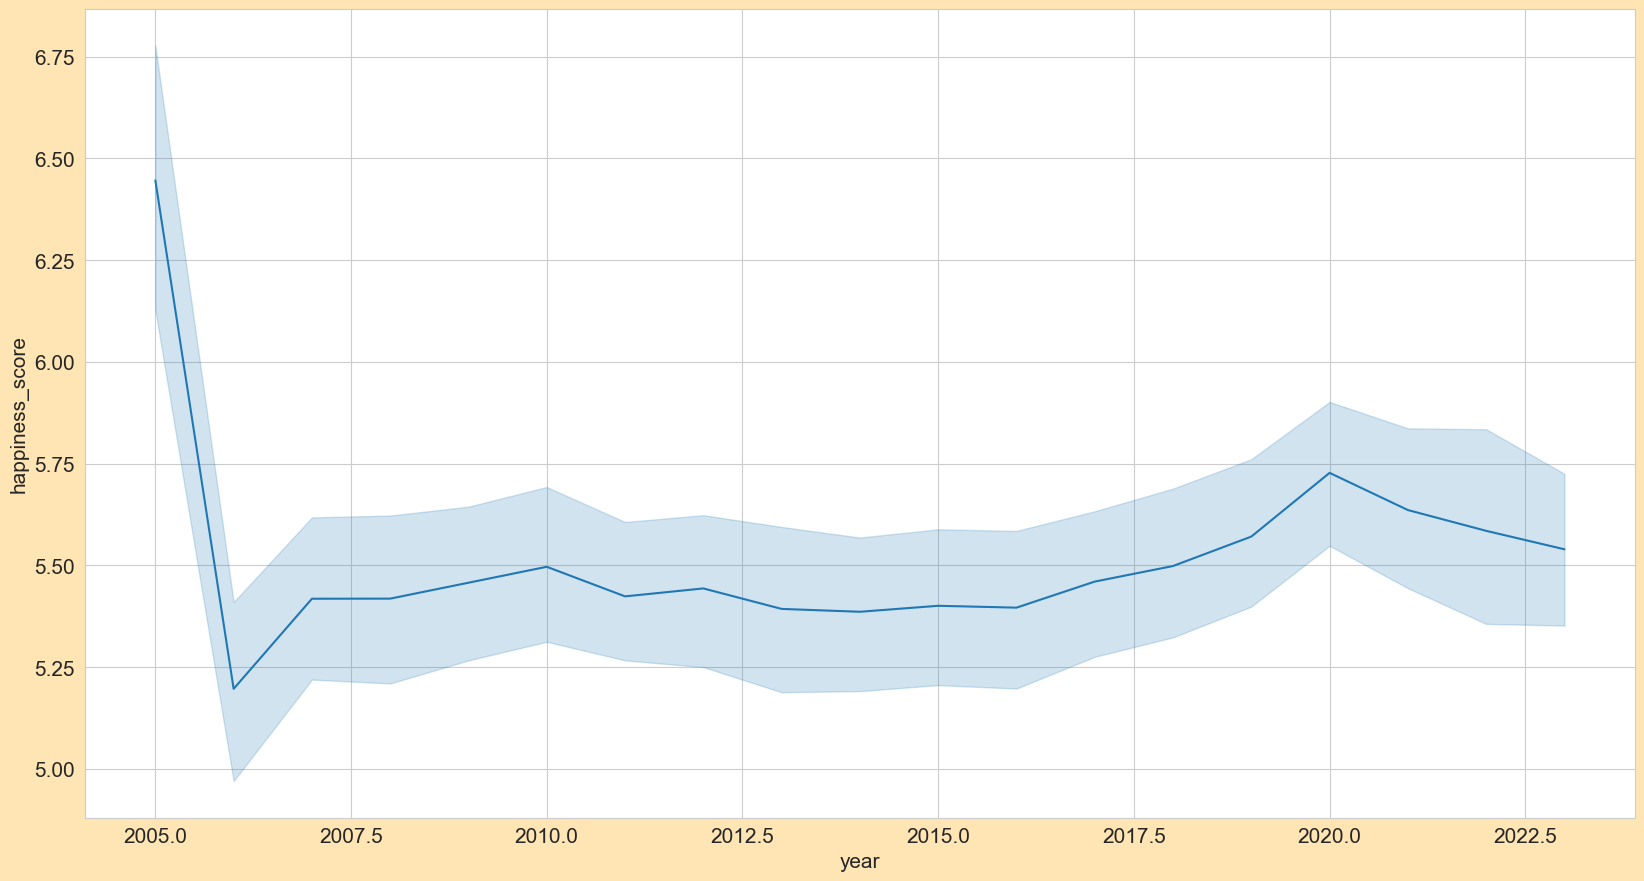

In [115]:
# Change of world happiness over time

sns.lineplot(data=test_data, x='year',y='happiness_score')
plt.show()

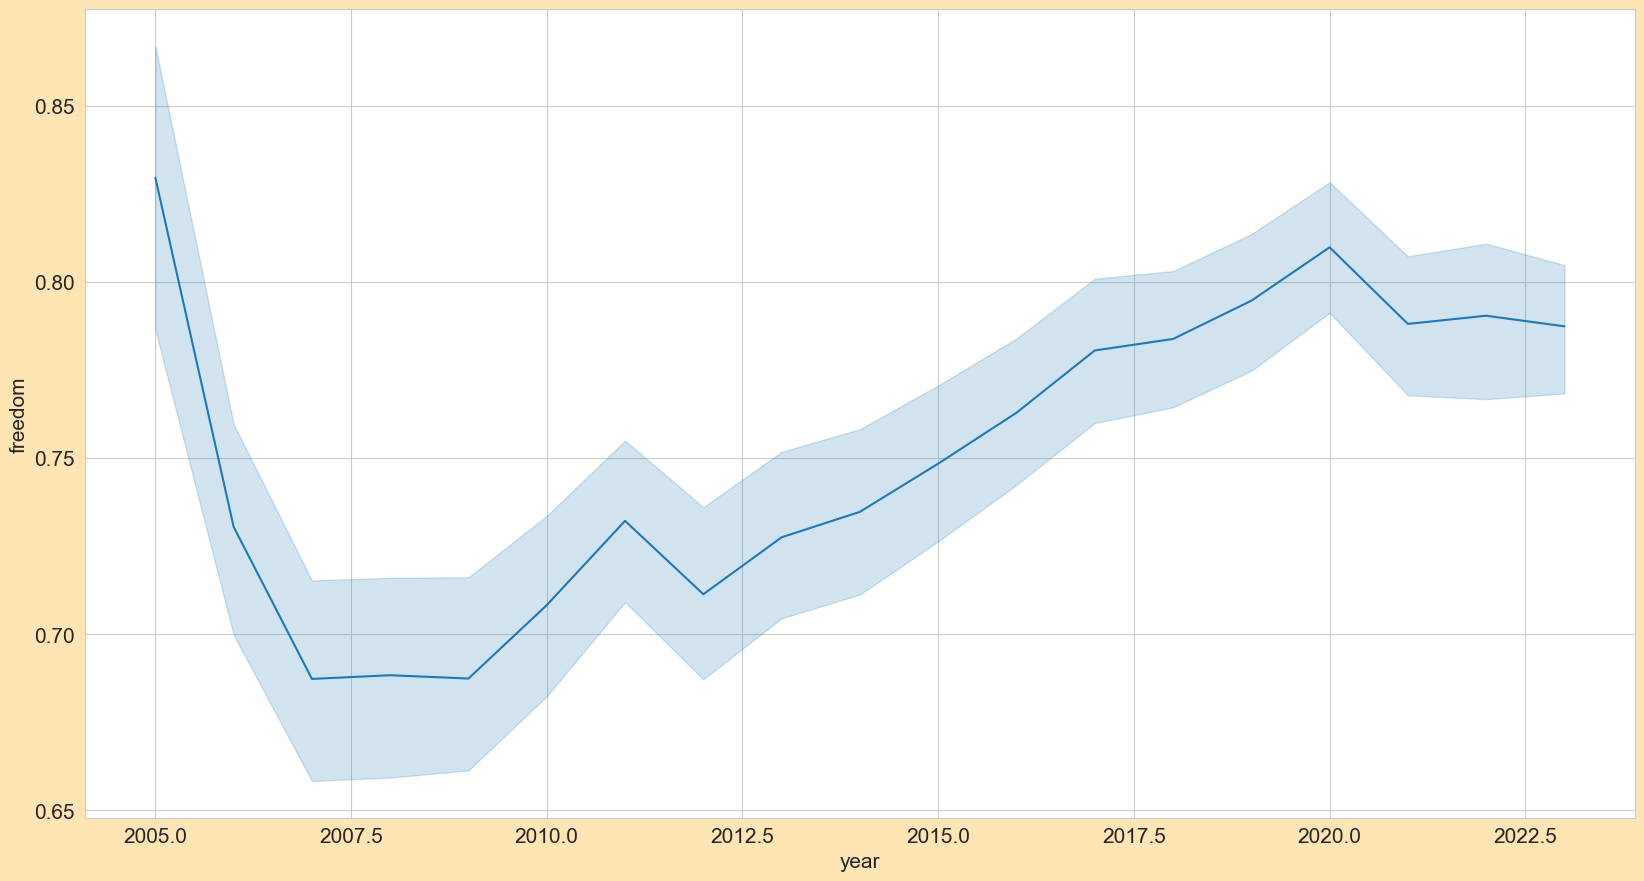

In [116]:
sns.lineplot(data=test_data, x='year',y='freedom')
plt.show()

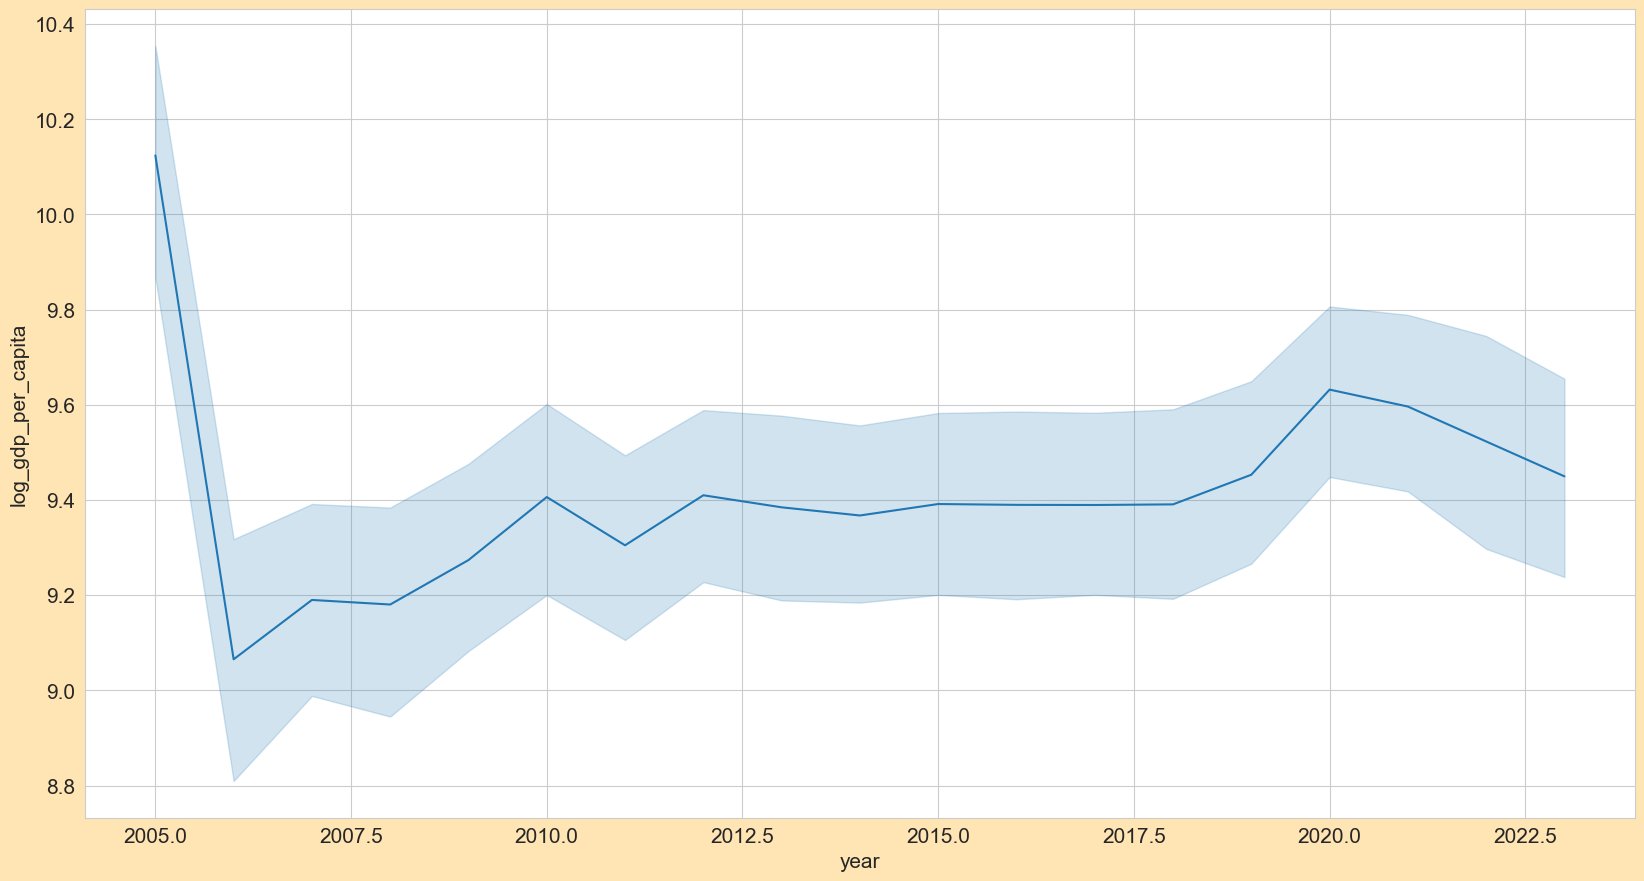

In [117]:
sns.lineplot(data=test_data, x='year',y='log_gdp_per_capita')
plt.show()

In [ ]:
#################

## Which countries had the largest increase or decrease in happiness score since 2007

In [ ]:
###############


test_data_n_reports_year = test_data.groupby('year')['happiness_score'].count().to_frame('n_reports').reset_index()
test_data_n_reports_year

Text(0, 0.5, 'Log GDP per Capita')

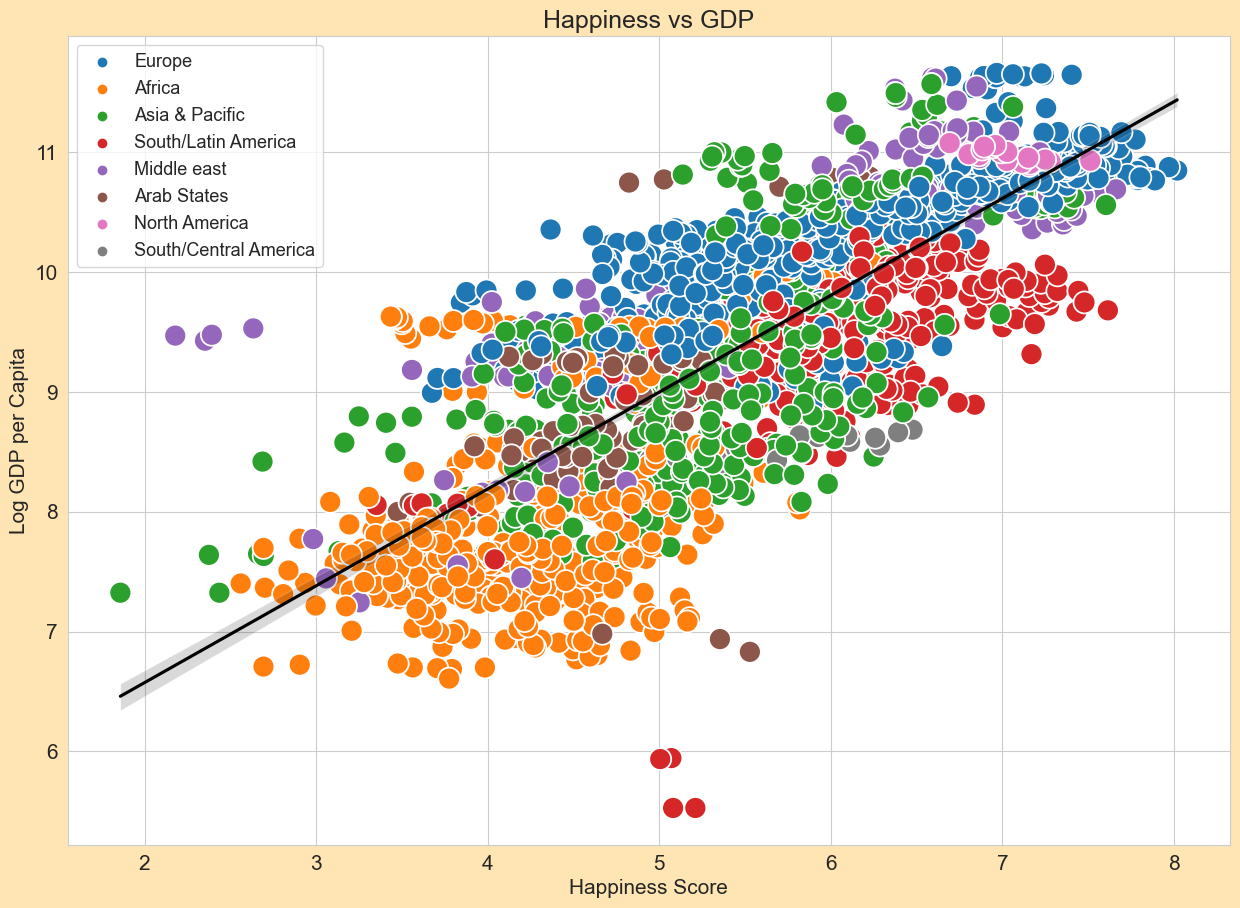

In [118]:
# Plot happiness_score and log_gdp_per_capita

plt.rcParams['figure.figsize'] = (15,10.5)
plt.title('Happiness vs GDP')
ax = happ_gdp_corr = sns.scatterplot(x = test_data.happiness_score,
                                     y = test_data.log_gdp_per_capita, 
                                     hue_order = ['Europe',
                                                  'Africa',
                                                  'Asia & Pacific',
                                                  'South/Latin America',
                                                  'Middle east',
                                                  'Arab States',
                                                  'North America',
                                                  'South/Central America'], 
                                     hue = data['region'], 
                                     s = 250)
sns.regplot(data=test_data, 
            x="happiness_score",
            y="log_gdp_per_capita",
            scatter=False, 
            line_kws={"color": "black"}, 
            ax=ax)

plt.legend(loc = 'upper left',
           fontsize = '13')
plt.xlabel('Happiness Score')
plt.ylabel('Log GDP per Capita')

Text(0, 0.5, 'Log GDP per Capita')

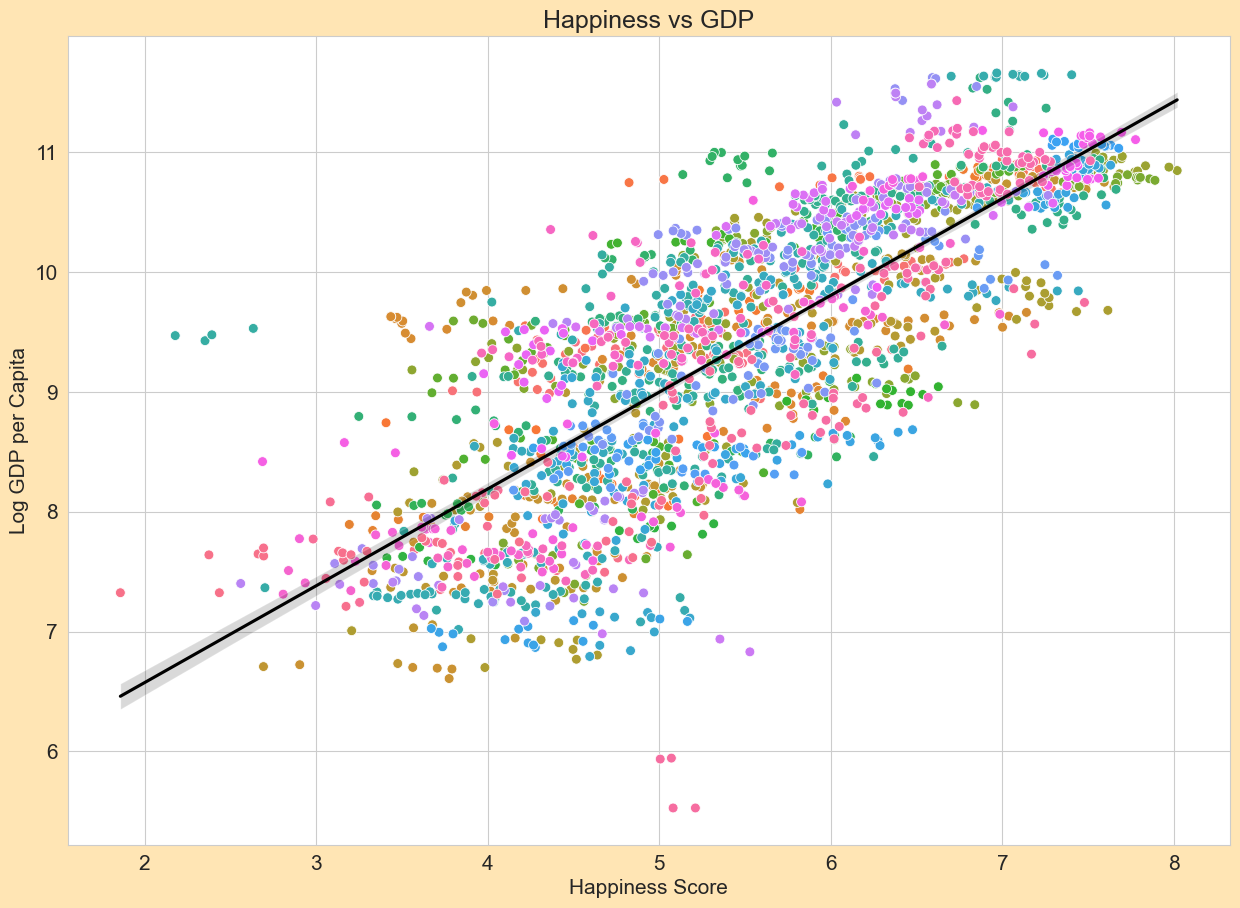

In [119]:
# Plot happiness_score and log_gdp_per_capita

plt.rcParams['figure.figsize'] = (15,10.5)
plt.title('Happiness vs GDP')
ax = happ_gdp_corr = sns.scatterplot(x = test_data.happiness_score,
                                     y = test_data.log_gdp_per_capita,
                                     hue = data['country_name'], 
                                     s = 50)
sns.regplot(data=test_data, 
            x="happiness_score",
            y="log_gdp_per_capita",
            scatter=False, 
            line_kws={"color": "black"}, 
            ax=ax)

ax.get_legend().remove()
plt.xlabel('Happiness Score')
plt.ylabel('Log GDP per Capita')

Text(0, 0.5, 'Log GDP per Capita')

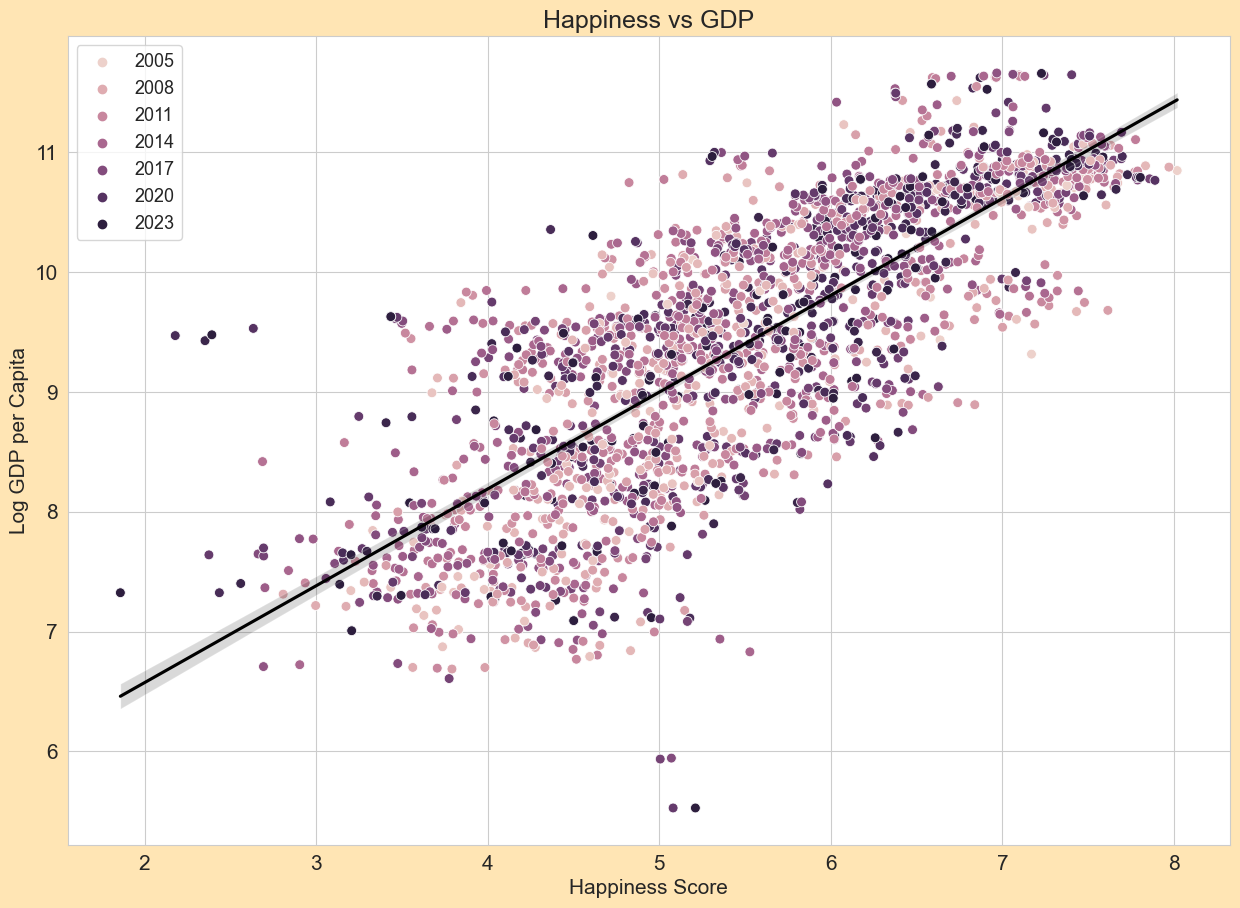

In [120]:
# Plot happiness_score and log_gdp_per_capita

plt.rcParams['figure.figsize'] = (15,10.5)
plt.title('Happiness vs GDP')
ax = happ_gdp_corr = sns.scatterplot(x = test_data.happiness_score,
                                     y = test_data.log_gdp_per_capita,
                                     hue = data['year'], 
                                     s = 50)
sns.regplot(data=test_data, 
            x="happiness_score",
            y="log_gdp_per_capita",
            scatter=False, 
            line_kws={"color": "black"}, 
            ax=ax)

plt.legend(loc = 'upper left',
           fontsize = '13')
plt.xlabel('Happiness Score')
plt.ylabel('Log GDP per Capita')

In [121]:
###############

In [122]:
test_data_pivot = pd.pivot(test_data, index='year', columns='country_name', values='happiness_score')

C:\Users\olimp\AppData\Local\Temp\ipykernel_32836\1586914393.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  test_data_pivot = pd.pivot(test_data, index='year', columns='country_name', values='happiness_score')


In [123]:
test_data_pivot

country_name  Afghanistan   Albania   Algeria    Angola  Argentina   Armenia  \
year                                                                           
2005                  NaN       NaN       NaN       NaN        NaN       NaN   
2006                  NaN       NaN       NaN       NaN   6.312925  4.289311   
2007                  NaN  4.634252       NaN       NaN   6.073158  4.881516   
2008             3.723590       NaN       NaN       NaN   5.961034  4.651972   
2009             4.401778  5.485470       NaN       NaN   6.424133  4.177582   
2010             4.758381  5.268937  5.463567       NaN   6.441067  4.367811   
2011             3.831719  5.867422  5.317194  5.589001   6.775805  4.260491   
2012             3.782938  5.510124  5.604596  4.360250   6.468387  4.319712   
2013             3.572100  4.550648       NaN  3.937107   6.582260  4.277191   
2014             3.130896  4.813763  6.354898  3.794838   6.671114  4.453083   
2015             3.982855  4.606651       NaN       NaN   6.697131  4.348320   
2016             4.220169  4.511101  5.340854       NaN   6.427221  4.325472   
2017             2.661718  4.639548  5.248912       NaN   6.039330  4.287736   
2018             2.694303  5.004403  5.043086       NaN   5.792797  5.062449   
2019             2.375092  4.995318  4.744627       NaN   6.085561  5.488087   
2020                  NaN  5.364910  5.437755       NaN   5.900567       NaN   
2021             2.436034  5.255482  5.217018       NaN   5.908279  5.300569   
2022             1.281271  5.212213       NaN       NaN   6.260993  5.381943   
2023             1.859000  5.277300  5.329100       NaN   6.023700  5.341700   

country_name  Australia   Austria  Azerbaijan   Bahrain  ...  \
year                                                     ...   
2005           7.340688       NaN         NaN       NaN  ...   
2006                NaN  7.122211    4.727871       NaN  ...   
2007           7.285391       NaN    4.568160       NaN  ...   
2008           7.253757  7.180954    4.817189       NaN  ...   
2009                NaN       NaN    4.573725  5.700523  ...   
2010           7.450047  7.302679    4.218611  5.936869  ...   
2011           7.405616  7.470513    4.680470  4.823976  ...   
2012           7.195586  7.400689    4.910772  5.027187  ...   
2013           7.364169  7.498803    5.481178  6.689711  ...   
2014           7.288550  6.950000    5.251530  6.165134  ...   
2015           7.309061  7.076447    5.146775  6.007375  ...   
2016           7.250080  7.048072    5.303895  6.169673  ...   
2017           7.257038  7.293728    5.152279  6.227321  ...   
2018           7.176993  7.396002    5.167995       NaN  ...   
2019           7.233995  7.195361    5.173389  7.098012  ...   
2020           7.137368  7.213489         NaN  6.173176  ...   
2021           7.111599  7.079641         NaN       NaN  ...   
2022           7.034696  6.998997         NaN       NaN  ...   
2023           7.094600  7.097300         NaN  6.173200  ...   

country_name  United Arab Emirates  United Kingdom  United States   Uruguay  \
year                                                                          
2005                           NaN        6.983557            NaN       NaN   
2006                      6.734222             NaN       7.181794  5.785868   
2007                           NaN        6.801931       7.512688  5.693946   
2008                           NaN        6.986464       7.280386  5.663870   
2009                      6.866063        6.906547       7.158032  6.296223   
2010                      7.097456        7.029364       7.163616  6.062011   
2011                      7.118701        6.869249       7.115139  6.554047   
2012                      7.217767        6.880784       7.026227  6.449728   
2013                      6.620951        6.918055       7.249285  6.444465   
2014                      6.539855        6.758148       7.151114  6.561444   
2015                      

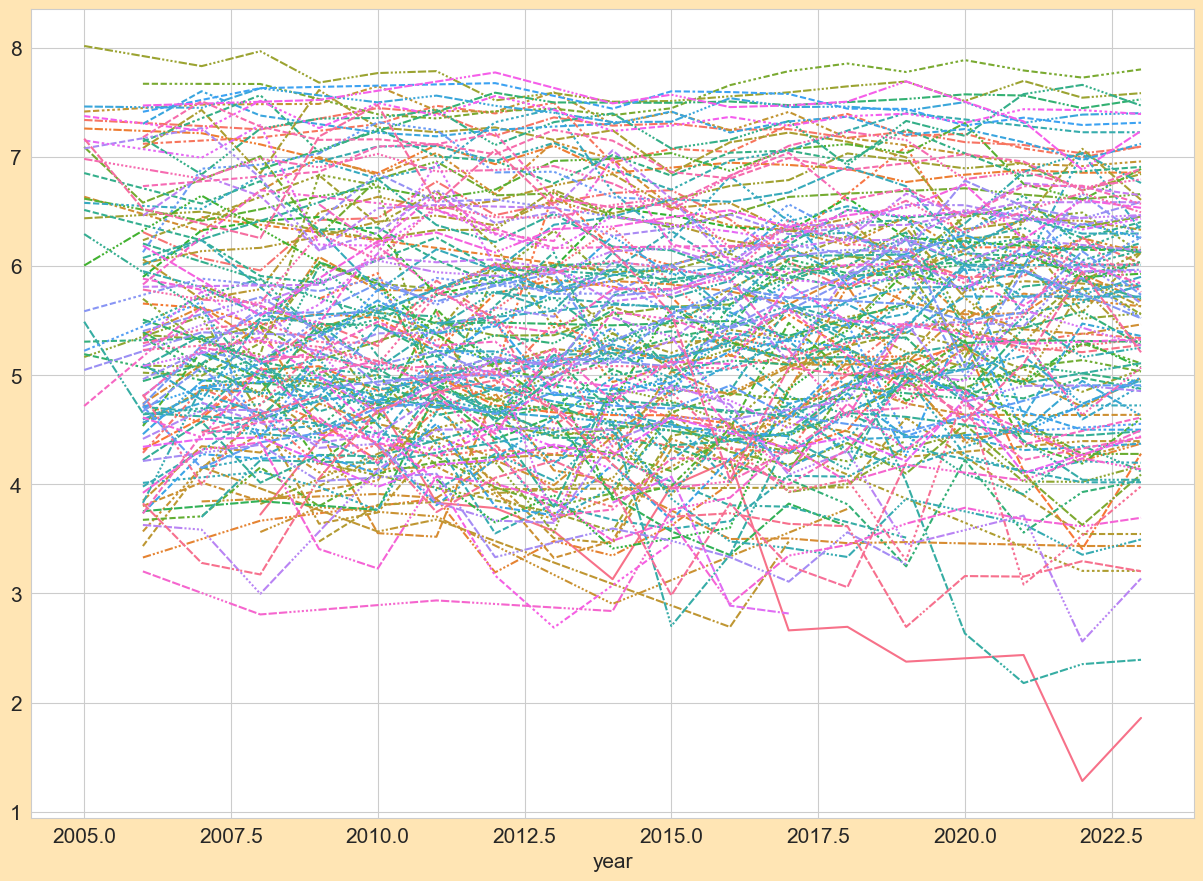

In [124]:
sns.lineplot(data=test_data_pivot)

plt.legend([],[], frameon=False)

In [ ]:
####################

In [146]:
##### 1 consecutive year
test_data = data
test_data_2 = test_data[['country_name', 'year', 'happiness_score']].sort_values(['country_name','year'])

country_name  year  happiness_score
0                  Afghanistan  2008         3.723590
1                  Afghanistan  2009         4.401778
2                  Afghanistan  2010         4.758381
3                  Afghanistan  2011         3.831719
4                  Afghanistan  2012         3.782938
5                  Afghanistan  2013         3.572100
6                  Afghanistan  2014         3.130896
7                  Afghanistan  2015         3.982855
8                  Afghanistan  2016         4.220169
9                  Afghanistan  2017         2.661718
10                 Afghanistan  2018         2.694303
11                 Afghanistan  2019         2.375092
12                 Afghanistan  2021         2.436034
13                 Afghanistan  2022         1.281271
14                 Afghanistan  2023         1.859000
15                     Albania  2007         4.634252
16                     Albania  2009         5.485470
17                     Albania  2010         5.268937
18                     Albania  2011         5.867422
19                     Albania  2012         5.510124
20                     Albania  2013         4.550648
21                     Albania  2014         4.813763
22                     Albania  2015         4.606651
23                     Albania  2016         4.511101
24                     Albania  2017         4.639548
25                     Albania  2018         5.004403
26                     Albania  2019         4.995318
27                     Albania  2020         5.364910
28                     Albania  2021         5.255482
29                     Albania  2022         5.212213
30                     Albania  2023         5.277300
31                     Algeria  2010         5.463567
32                     Algeria  2011         5.317194
33                     Algeria  2012         5.604596
34                     Algeria  2014         6.354898
35                     Algeria  2016         5.340854
36                     Algeria  2017         5.248912
37                     Algeria  2018         5.043086
38                     Algeria  2019         4.744627
39                     Algeria  2020         5.437755
40                     Algeria  2021         5.217018
41                     Algeria  2023         5.329100
42                      Angola  2011         5.589001
43                      Angola  2012         4.360250
44                      Angola  2013         3.937107
45                      Angola  2014         3.794838
46                   Argentina  2006         6.312925
47                   Argentina  2007         6.073158
48                   Argentina  2008         5.961034
49                   Argentina  2009         6.424133
50                   Argentina  2010         6.441067
51                   Argentina  2011         6.775805
52                   Argentina  2012         6.468387
53                   Argentina  2013         6.582260
54                   Argentina  2014         6.671114
55                   Argentina  2015         6.697131
56                   Argentina  2016         6.427221
57                   Argentina  2017         6.039330
58                   Argentina  2018         5.792797
59                   Argentina  2019         6.085561
60                   Argentina  2020         5.900567
61                   Argentina  2021         5.908279
62                   Argentina  2022         6.260993
63                   Argentina  2023         6.023700
64                     Armenia  2006         4.289311
65                     Armenia  2007         4.881516
66                     Armenia  2008         4.651972
67                     Armenia  2009         4.177582
68                     Armenia  2010         4.367811
69                     Armenia  2011         4.260491
70                     Armenia  2012         4.319712
71                     Armenia  2013         4.277191
72                     Armenia  2014         4.453083
73                    

In [126]:
# Find the difference between 2 consecutive years by country

test_data_2['diff']=test_data_2.groupby(['country_name',test_data_2['year'].diff().ne(1).cumsum()])['happiness_score'].diff(1)
test_data_2.head(20)

country_name  year  happiness_score      diff
0   Afghanistan  2008         3.723590       NaN
1   Afghanistan  2009         4.401778  0.678188
2   Afghanistan  2010         4.758381  0.356603
3   Afghanistan  2011         3.831719 -0.926662
4   Afghanistan  2012         3.782938 -0.048782
5   Afghanistan  2013         3.572100 -0.210837
6   Afghanistan  2014         3.130896 -0.441205
7   Afghanistan  2015         3.982855  0.851959
8   Afghanistan  2016         4.220169  0.237314
9   Afghanistan  2017         2.661718 -1.558450
10  Afghanistan  2018         2.694303  0.032585
11  Afghanistan  2019         2.375092 -0.319211
12  Afghanistan  2021         2.436034       NaN
13  Afghanistan  2022         1.281271 -1.154763
14  Afghanistan  2023         1.859000  0.577729
15      Albania  2007         4.634252       NaN
16      Albania  2009         5.485470       NaN
17      Albania  2010         5.268937 -0.216533
18      Albania  2011         5.867422  0.598485
19      Albania  2012         5.510124 -0.357297

In [127]:
top_1year_index = test_data_2.sort_values('diff', ascending = False).head(5).index.tolist()
bottom_1year_index = test_data_2.sort_values('diff', ascending = True).head(5).index.tolist()

In [128]:
top_1year_index

[132, 627, 2315, 614, 246]

In [129]:
bottom_1year_index

[629, 1196, 2316, 9, 2264]

In [130]:
a = top_1year_index
a = [x - 1 for x in a]
a

[131, 626, 2314, 613, 245]

In [131]:
top_1year_index = top_1year_index + a
top_1year_index.sort()
top_1year_index

[131, 132, 245, 246, 613, 614, 626, 627, 2314, 2315]

In [132]:
top_1year = test_data_2.iloc[top_1year_index].reset_index().drop('index', axis=1)
top_1year

country_name  year  happiness_score      diff
0      Bahrain  2012         5.027187  0.203211
1      Bahrain  2013         6.689711  1.662524
2     Botswana  2011         3.519921 -0.033099
3     Botswana  2012         4.835939  1.316018
4        Egypt  2013         3.558520 -0.645637
5        Egypt  2014         4.885073  1.326552
6  El Salvador  2008         5.191494 -0.104041
7  El Salvador  2009         6.839087  1.647593
8       Zambia  2019         3.306797 -0.734692
9       Zambia  2020         4.837992  1.531196

In [133]:


top_1year['diff'] = top_1year['happiness_score'] - top_1year.groupby('country_name')['happiness_score'].shift(1)
top_1year

country_name  year  happiness_score      diff
0      Bahrain  2012         5.027187       NaN
1      Bahrain  2013         6.689711  1.662524
2     Botswana  2011         3.519921       NaN
3     Botswana  2012         4.835939  1.316018
4        Egypt  2013         3.558520       NaN
5        Egypt  2014         4.885073  1.326552
6  El Salvador  2008         5.191494       NaN
7  El Salvador  2009         6.839087  1.647593
8       Zambia  2019         3.306797       NaN
9       Zambia  2020         4.837992  1.531196

<Axes: xlabel='year', ylabel='happiness_score'>

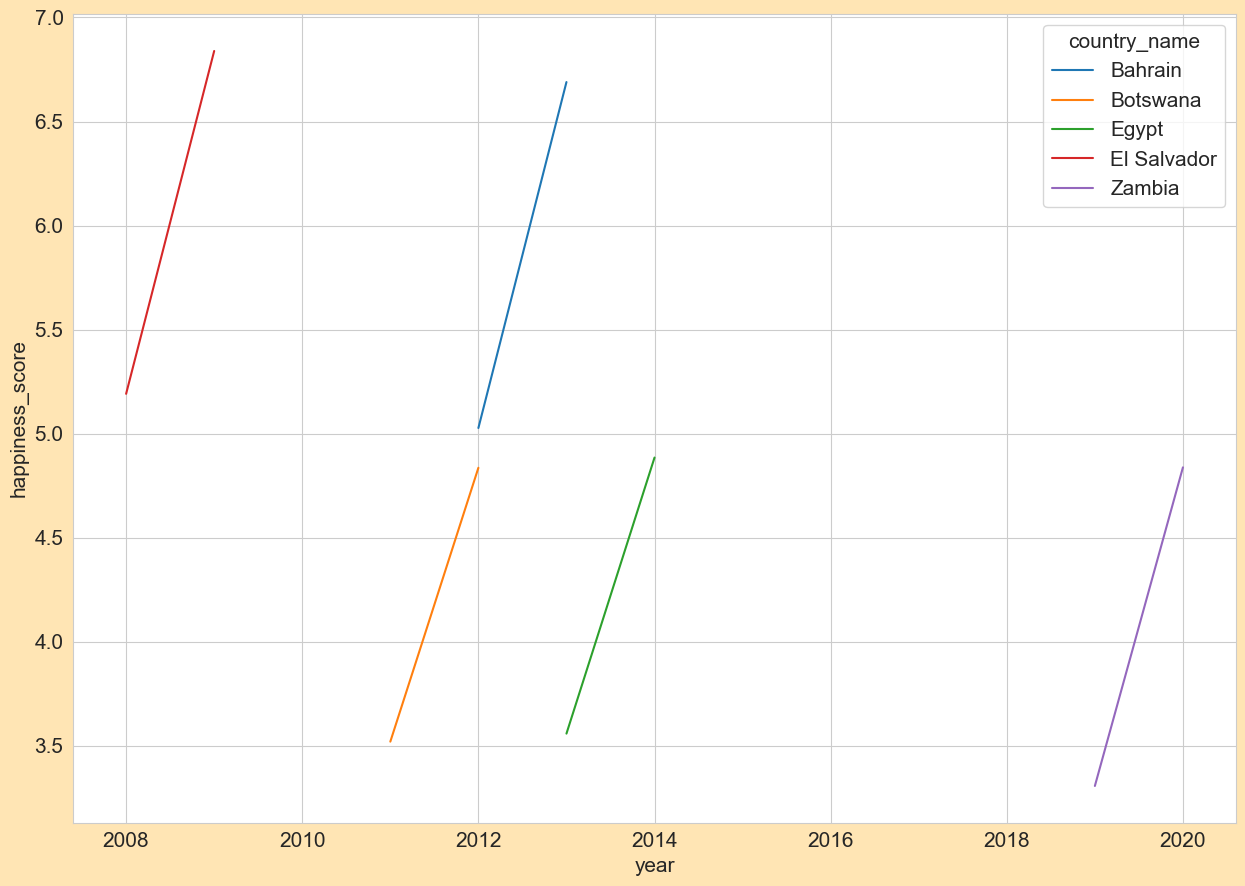

In [134]:
sns.lineplot(data=top_1year, x = 'year', y = 'happiness_score', hue  = 'country_name')

In [135]:
top_1year_countries = top_1year['country_name'].drop_duplicates().tolist()

top_1year_all = test_data_2[test_data_2['country_name'].isin(top_1year_countries)]

<Axes: xlabel='year', ylabel='happiness_score'>

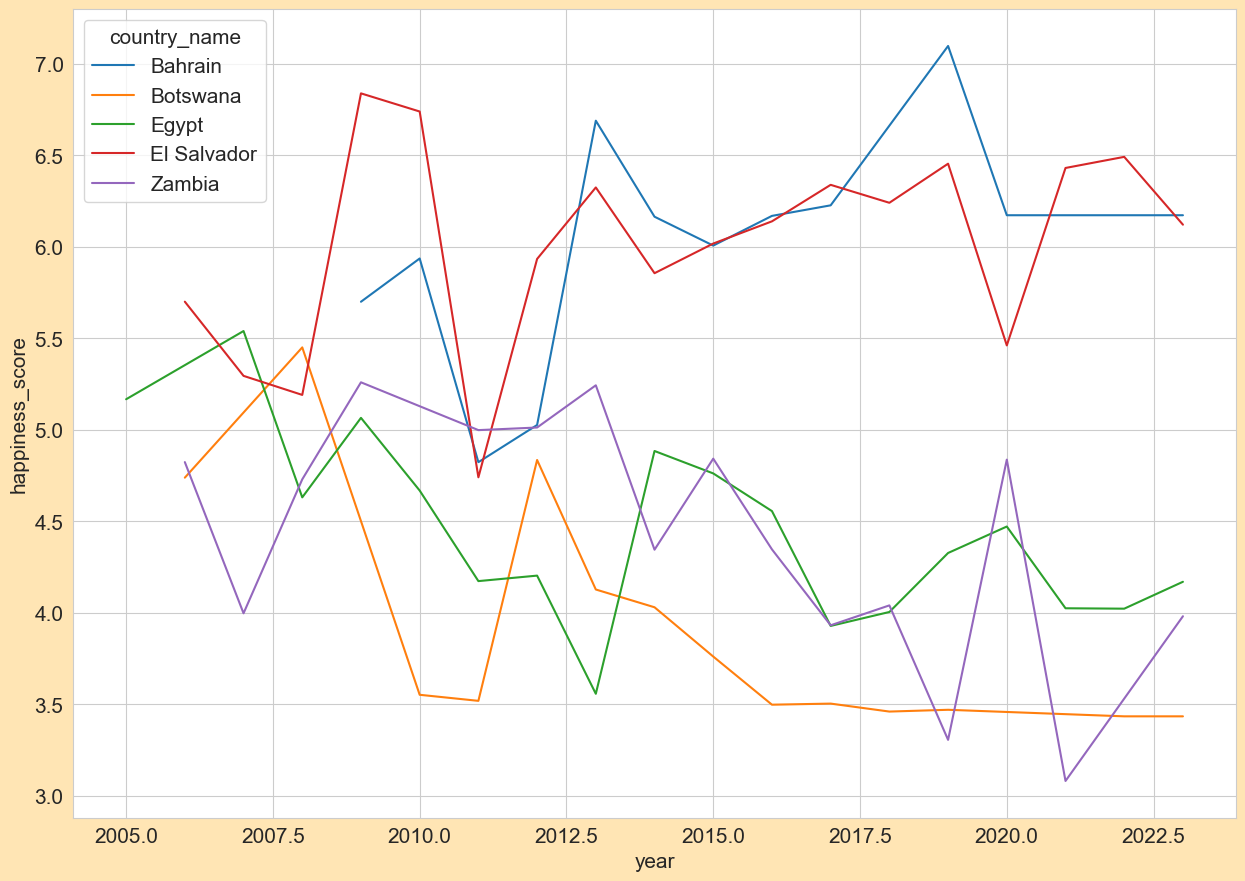

In [136]:
sns.lineplot(data=top_1year_all, x = 'year', y = 'happiness_score', hue = 'country_name')

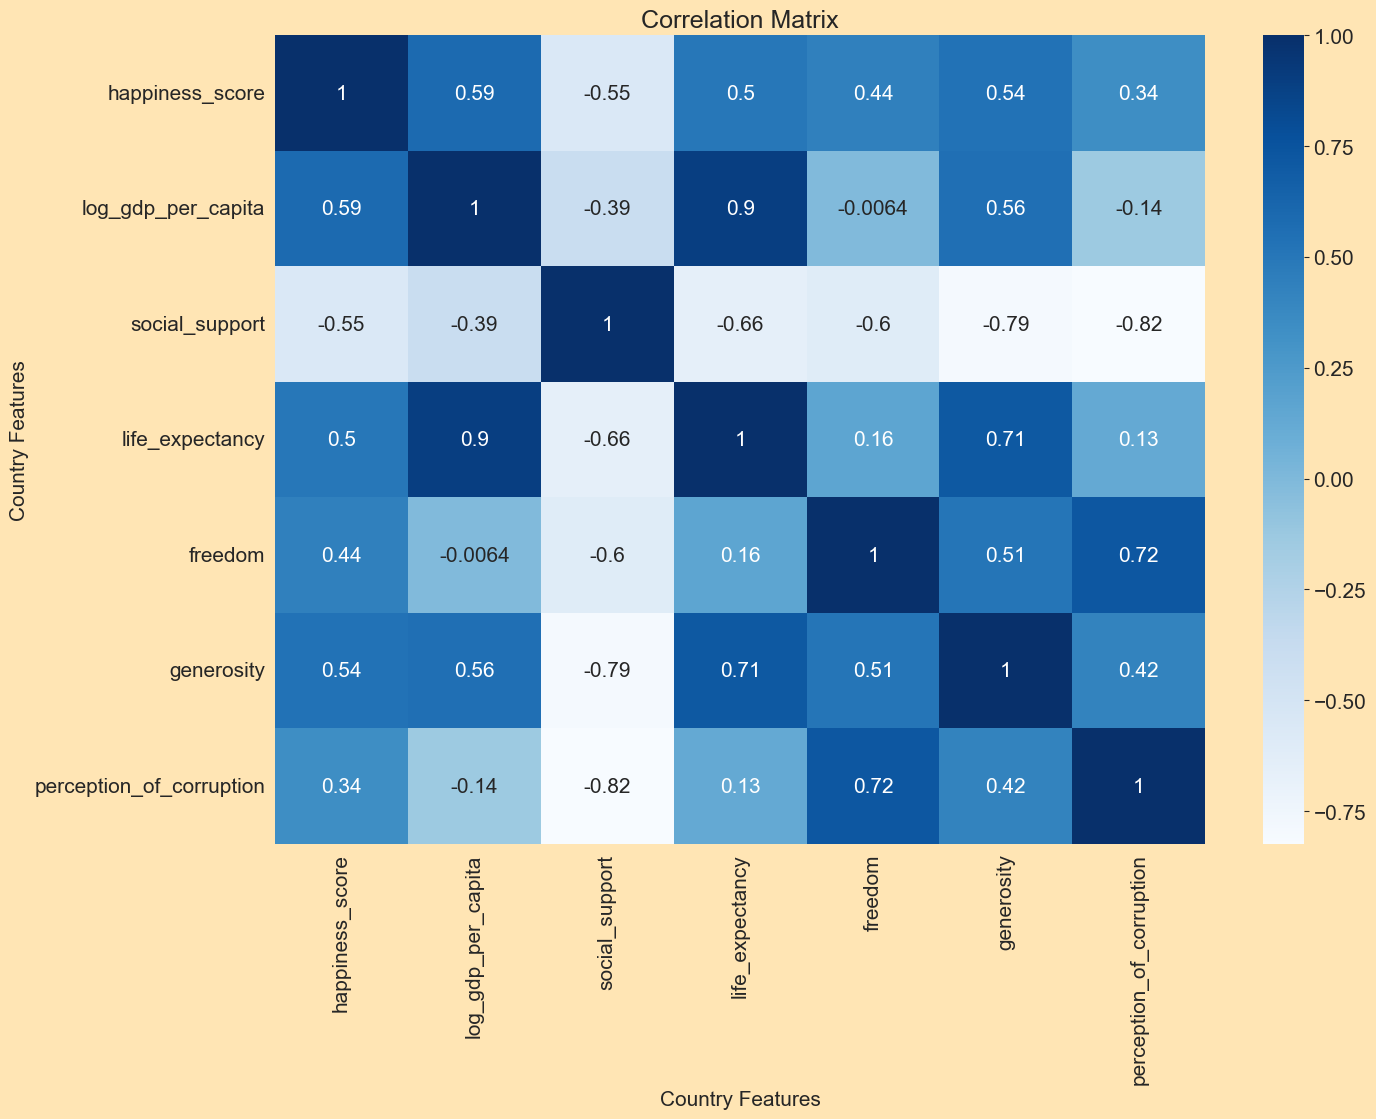

In [137]:
corr = data[data['country_name'] == 'Bahrain'].corr(numeric_only = True, method = "pearson")
sns.heatmap(corr, annot=True, cmap="Blues")

plt.title('Correlation Matrix')
plt.xlabel('Country Features')
plt.ylabel('Country Features')

plt.show()

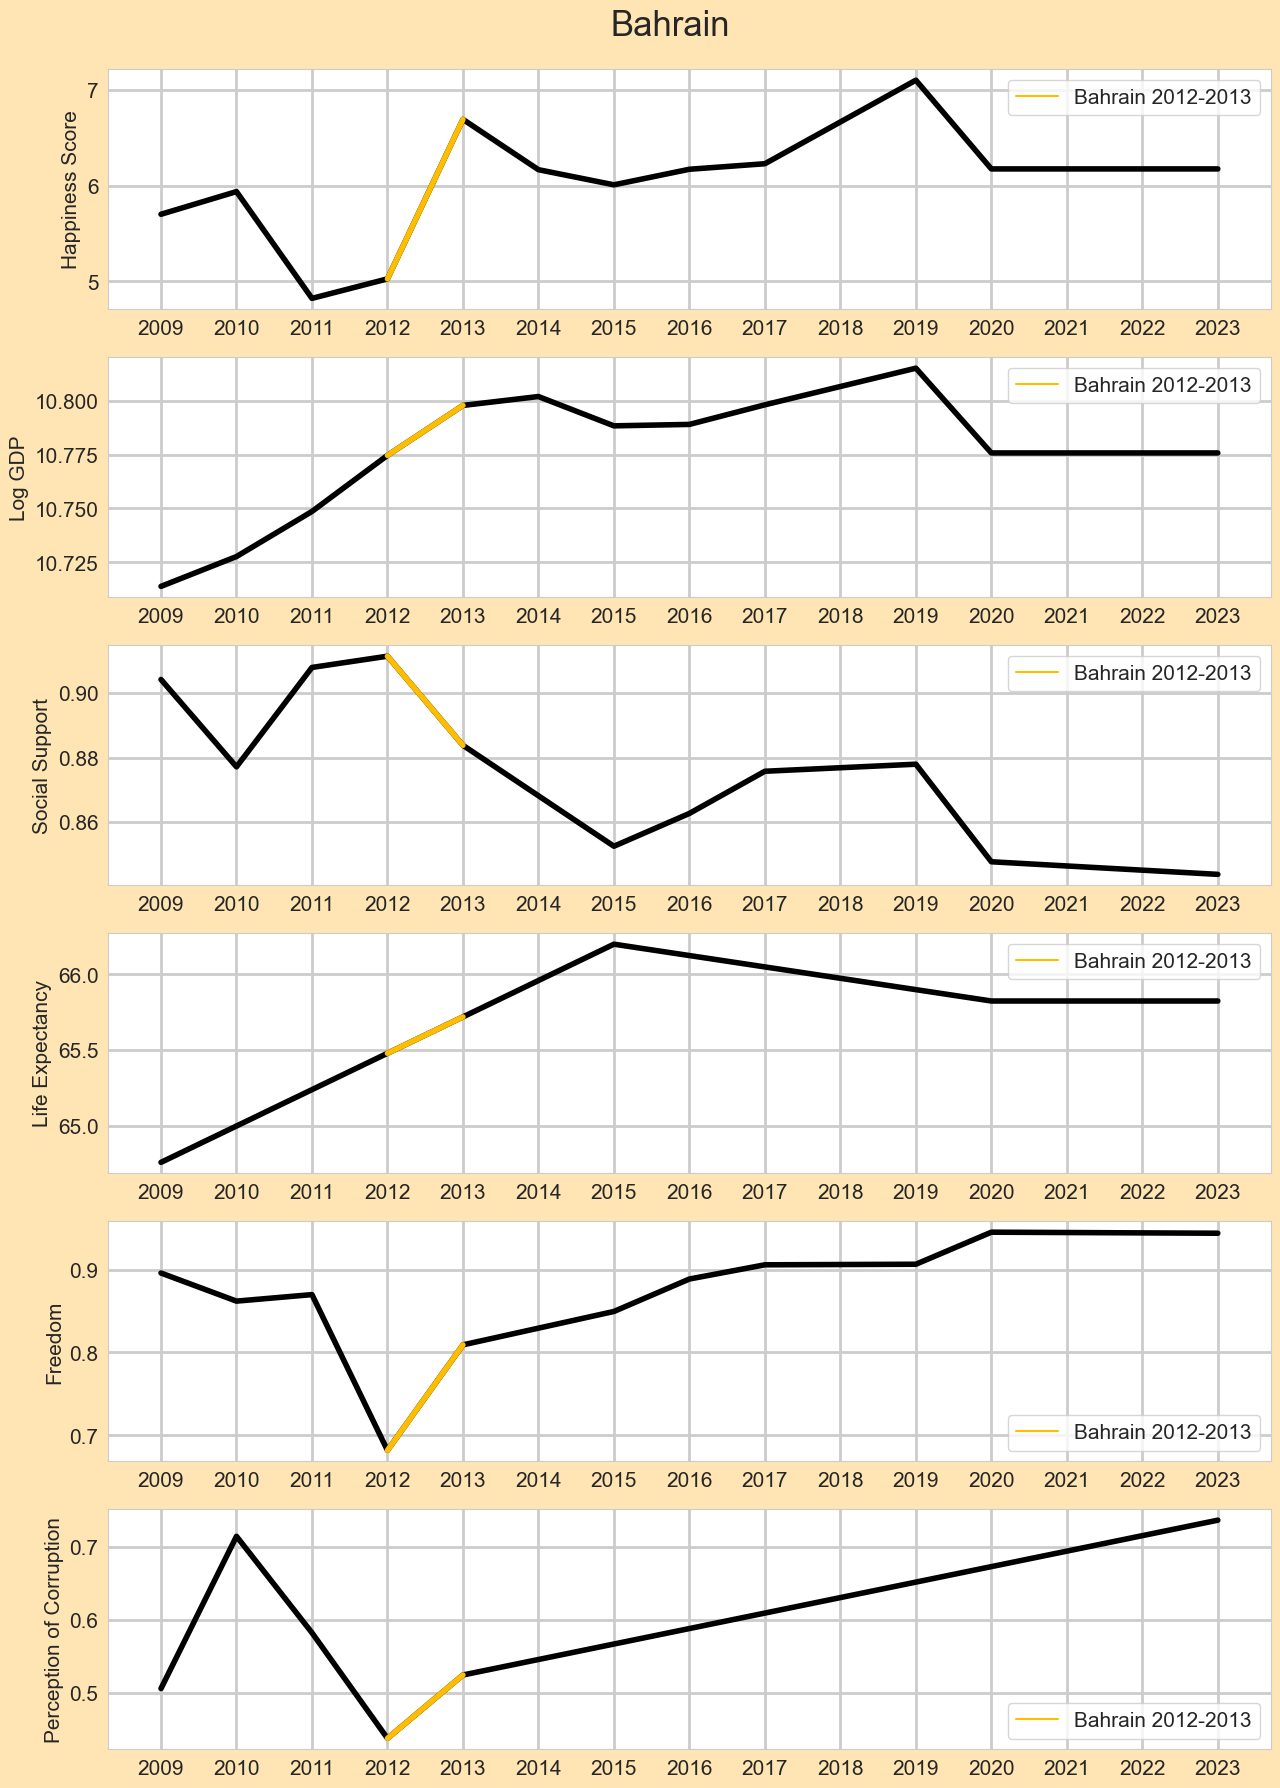

In [138]:
Bahrain_2012_2013 = data[(data['country_name'] == 'Bahrain') & (data['year'].isin([2012, 2013]) == True)]
Bahrain_2012_2013.loc[Bahrain_2012_2013['country_name'] == 'Bahrain', 'country_name'] = 'Bahrain 2012-2013'

fig, ax = plt.subplots(6, 1, figsize=(15, 20))
fig.suptitle('Bahrain', fontsize=25)
fig.subplots_adjust(top=0.95)

years = data[data['year'] > 2008]['year'].drop_duplicates().sort_values().tolist()

sns.lineplot(data=data[data['country_name'] == 'Bahrain'], x='year', y='happiness_score', linewidth=4.0, color='black', ax=ax[0])
sns.lineplot(data=Bahrain_2012_2013, x='year', y='happiness_score', linewidth=4.0, hue='country_name', palette='Wistia', ax=ax[0])
ax[0].set(xticks=years)
ax[0].set_xlabel('')
ax[0].set_ylabel('Happiness Score')
ax[0].grid(linewidth=2)
ax[0].legend(title='')

sns.lineplot(data=data[data['country_name'] == 'Bahrain'], x='year', y='log_gdp_per_capita', linewidth=4.0, color='black', ax=ax[1])
sns.lineplot(data=Bahrain_2012_2013, x='year', y='log_gdp_per_capita', linewidth=4.0, hue='country_name', palette='Wistia', ax=ax[1])
ax[1].set(xticks=years)
ax[1].set_xlabel('')
ax[1].set_ylabel('Log GDP')
ax[1].grid(linewidth=2)
ax[1].legend(title='')

sns.lineplot(data=data[data['country_name'] == 'Bahrain'], x='year', y='social_support', linewidth=4.0, color='black', ax=ax[2])
sns.lineplot(data=Bahrain_2012_2013, x='year', y='social_support', linewidth=4.0, hue='country_name', palette='Wistia', ax=ax[2])
ax[2].set(xticks=years)
ax[2].set_xlabel('')
ax[2].set_ylabel('Social Support')
ax[2].grid(linewidth=2)
ax[2].legend(title='')

sns.lineplot(data=data[data['country_name'] == 'Bahrain'], x='year', y='life_expectancy', linewidth=4.0, color='black', ax=ax[3])
sns.lineplot(data=Bahrain_2012_2013, x='year', y='life_expectancy', linewidth=4.0, hue='country_name', palette='Wistia', ax=ax[3])
ax[3].set(xticks=years)
ax[3].set_xlabel('')
ax[3].set_ylabel('Life Expectancy')
ax[3].grid(linewidth=2)
ax[3].legend(title='')

sns.lineplot(data=data[data['country_name'] == 'Bahrain'], x='year', y='freedom', linewidth=4.0, color='black', ax=ax[4])
sns.lineplot(data=Bahrain_2012_2013, x='year', y='freedom', linewidth=4.0, hue='country_name', palette='Wistia', ax=ax[4])
ax[4].set(xticks=years)
ax[4].set_xlabel('')
ax[4].set_ylabel('Freedom')
ax[4].grid(linewidth=2)
ax[4].legend(title='', loc='lower right' )


sns.lineplot(data=data[data['country_name'] == 'Bahrain'], x='year', y='perception_of_corruption', linewidth=4.0, color='black', ax=ax[5])
sns.lineplot(data=Bahrain_2012_2013, x = 'year', y = 'perception_of_corruption', linewidth=4.0, hue='country_name', palette='Wistia', ax=ax[5])
ax[5].set(xticks= years)
ax[5].set_xlabel('')
ax[5].set_ylabel('Perception of Corruption')
ax[5].grid(linewidth=2)
ax[5].legend(title='')


In [ ]:
slope = (Bahrain_2012_2013[Bahrain_2012_2013['year'] == 2013]['happiness_score'].item() - Bahrain_2012_2013[Bahrain_2012_2013['year'] == 2012]['happiness_score'].item()) / (Bahrain_2012_2013[Bahrain_2012_2013['year'] == 2013]['year'].item() - Bahrain_2012_2013[Bahrain_2012_2013['year'] == 2012]['year'].item()) 
slope

In [139]:
##### 2 consecutive year
test_data = data
test_data_2 = test_data[['country_name', 'year', 'happiness_score']].sort_values(['country_name','year'])

In [140]:
# Find the difference between 2 consecutive years by country

test_data_2['diff']=test_data_2.groupby(['country_name',test_data_2['year'].diff().ne(1).cumsum()])['happiness_score'].diff(2)
test_data_2.head(20)

country_name  year  happiness_score      diff
0   Afghanistan  2008         3.723590       NaN
1   Afghanistan  2009         4.401778       NaN
2   Afghanistan  2010         4.758381  1.034791
3   Afghanistan  2011         3.831719 -0.570059
4   Afghanistan  2012         3.782938 -0.975443
5   Afghanistan  2013         3.572100 -0.259619
6   Afghanistan  2014         3.130896 -0.652042
7   Afghanistan  2015         3.982855  0.410754
8   Afghanistan  2016         4.220169  1.089273
9   Afghanistan  2017         2.661718 -1.321136
10  Afghanistan  2018         2.694303 -1.525865
11  Afghanistan  2019         2.375092 -0.286626
12  Afghanistan  2021         2.436034       NaN
13  Afghanistan  2022         1.281271       NaN
14  Afghanistan  2023         1.859000 -0.577034
15      Albania  2007         4.634252       NaN
16      Albania  2009         5.485470       NaN
17      Albania  2010         5.268937       NaN
18      Albania  2011         5.867422  0.381952
19      Albania  2012         5.510124  0.241188

In [141]:
top_2year_index = test_data_2.sort_values('diff', ascending = False).head(5).index.tolist()
bottom_2year_index = test_data_2.sort_values('diff', ascending = True).head(5).index.tolist()

a = [x - 1 for x in top_2year_index]
b = [x - 2 for x in top_2year_index]

top_2year_index = top_2year_index + a + b
top_2year_index.sort()
top_2year_index

[130, 131, 132, 198, 199, 200, 629, 630, 631, 817, 818, 819, 1196, 1197, 1198]

In [142]:
top_2year = test_data_2.iloc[top_2year_index]
top_2year['diff'] = top_2year['happiness_score'] - top_2year.groupby('country_name')['happiness_score'].shift(2)
top_2year

C:\Users\olimp\AppData\Local\Temp\ipykernel_32836\1151962752.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_2year['diff'] = top_2year['happiness_score'] - top_2year.groupby('country_name')['happiness_score'].shift(2)


country_name  year  happiness_score      diff
130       Bahrain  2011         4.823976       NaN
131       Bahrain  2012         5.027187       NaN
132       Bahrain  2013         6.689711  1.865735
198         Benin  2016         4.007358       NaN
199         Benin  2017         4.853181       NaN
200         Benin  2018         5.819827  1.812469
629   El Salvador  2011         4.741295       NaN
630   El Salvador  2012         5.934371       NaN
631   El Salvador  2013         6.325063  1.583768
817        Guinea  2016         3.602855       NaN
818        Guinea  2017         4.873723       NaN
819        Guinea  2018         5.252227  1.649372
1196      Liberia  2015         2.701591       NaN
1197      Liberia  2016         3.354676       NaN
1198      Liberia  2017         4.424491  1.722900

In [143]:
top_2year_all_columns

NameError: name 'top_2year_all_columns' is not defined

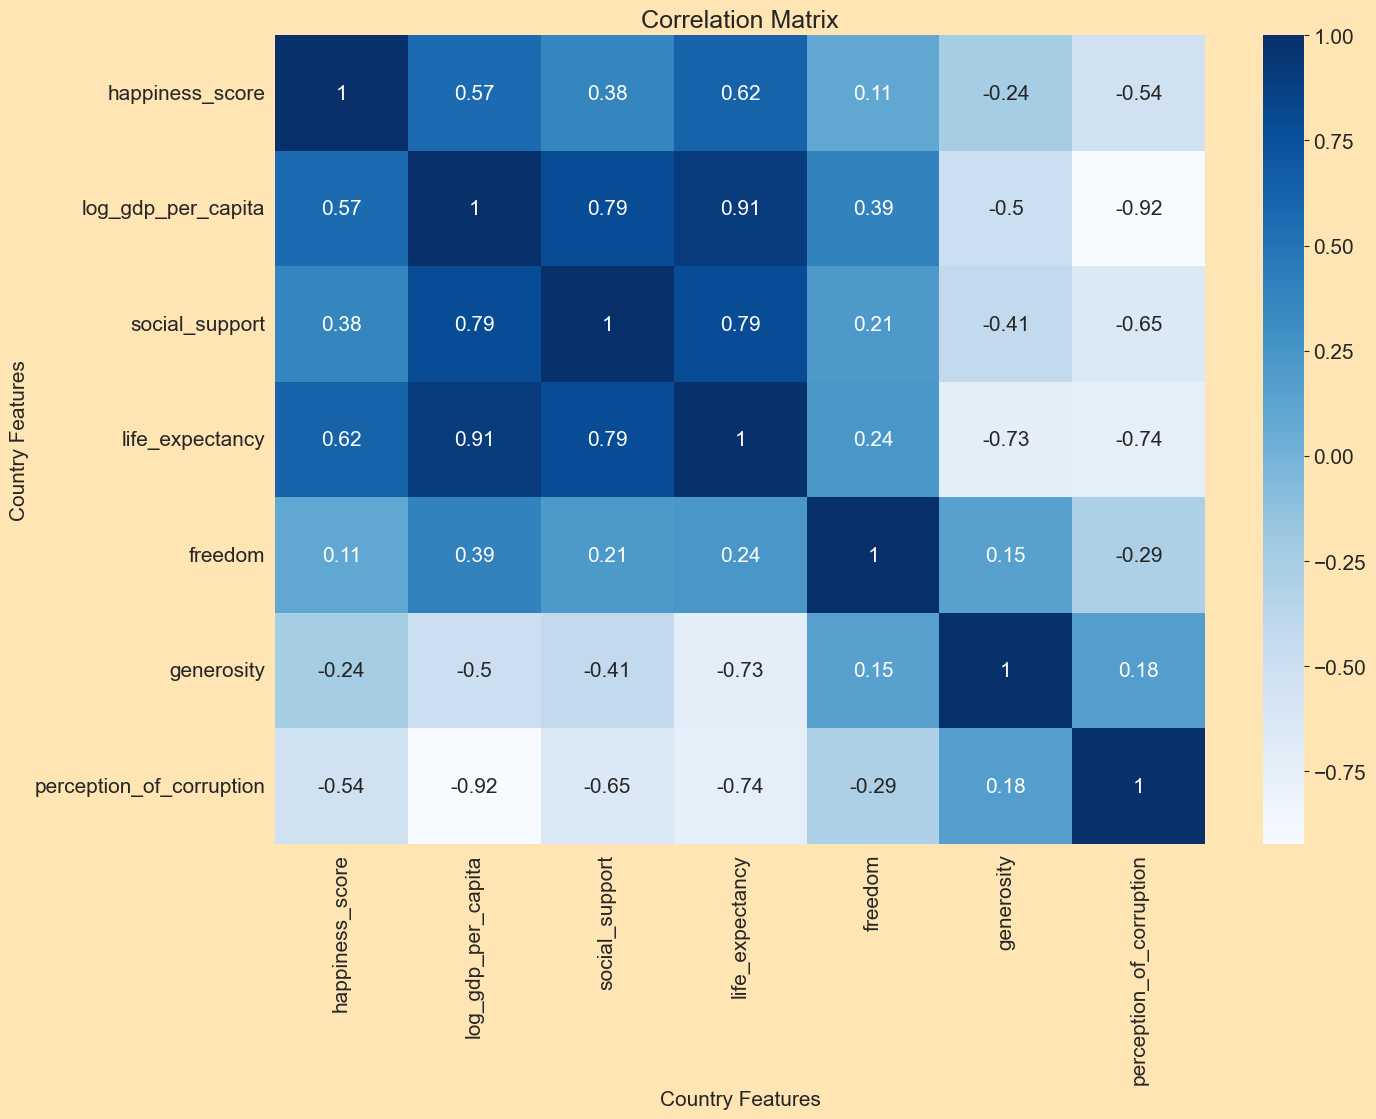

In [144]:
top_2year_all_columns = test_data.iloc[top_2year_index]

corr = top_2year_all_columns.corr(numeric_only = True, method = "pearson")
sns.heatmap(corr, annot=True, cmap="Blues")

plt.title('Correlation Matrix')
plt.xlabel('Country Features')
plt.ylabel('Country Features')

plt.show()

<Axes: xlabel='year', ylabel='happiness_score'>

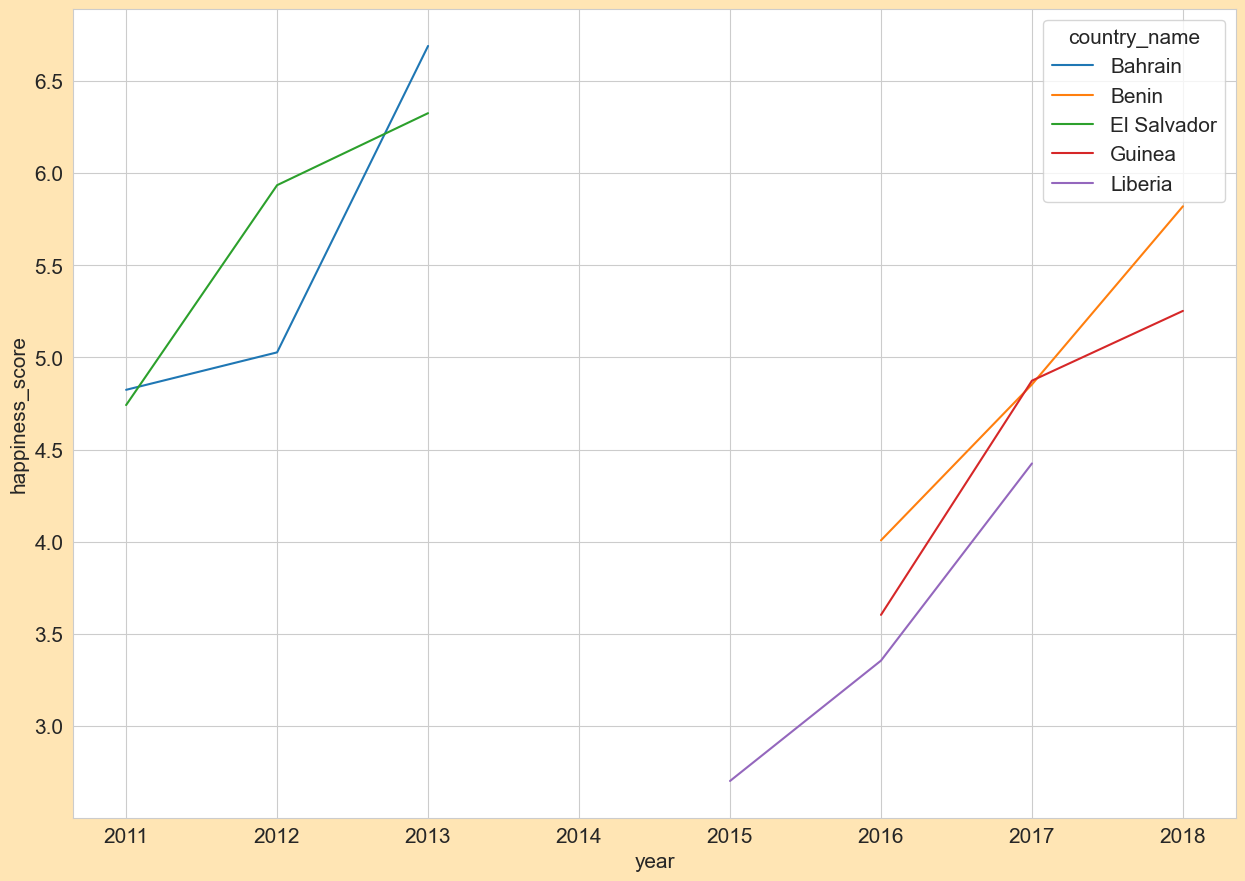

In [145]:
sns.lineplot(data=top_2year, x = 'year', y = 'happiness_score', hue  = 'country_name')

In [ ]:
top_2year_countries = top_2year['country_name'].drop_duplicates().tolist()
top_2year_all_years = data[data['country_name'].isin(top_2year_countries)]

sns.lineplot(data=top_2year_all_years, x = 'year', y = 'happiness_score', hue = 'country_name')

In [ ]:
Bahrain_2011_2013 = data[(data['country_name'] == 'Bahrain') & (data['year'].isin([2011, 2012, 2013]) == True)]
Bahrain_2011_2013.loc[Bahrain_2011_2013['country_name'] == 'Bahrain', 'country_name'] = 'Bahrain 2011-2013'

fig, ax = plt.subplots(6, 1, figsize=(15, 20))
fig.suptitle('Bahrain', fontsize=25)
fig.subplots_adjust(top=0.95)

years = data[data['year'] > 2008]['year'].drop_duplicates().sort_values().tolist()

sns.lineplot(data=data[data['country_name'] == 'Bahrain'], x='year', y='happiness_score', linewidth=4.0, color='black', ax=ax[0])
sns.lineplot(data=Bahrain_2011_2013, x='year', y='happiness_score', linewidth=4.0, hue='country_name', palette='Wistia', ax=ax[0])
ax[0].set(xticks=years)
ax[0].set_xlabel('')
ax[0].set_ylabel('Happiness Score')
ax[0].grid(linewidth=2)
ax[0].legend(title='')

sns.lineplot(data=data[data['country_name'] == 'Bahrain'], x='year', y='log_gdp_per_capita', linewidth=4.0, color='black', ax=ax[1])
sns.lineplot(data=Bahrain_2011_2013, x='year', y='log_gdp_per_capita', linewidth=4.0, hue='country_name', palette='Wistia', ax=ax[1])
ax[1].set(xticks=years)
ax[1].set_xlabel('')
ax[1].set_ylabel('Log GDP')
ax[1].grid(linewidth=2)
ax[1].legend(title='')

sns.lineplot(data=data[data['country_name'] == 'Bahrain'], x='year', y='social_support', linewidth=4.0, color='black', ax=ax[2])
sns.lineplot(data=Bahrain_2011_2013, x='year', y='social_support', linewidth=4.0, hue='country_name', palette='Wistia', ax=ax[2])
ax[2].set(xticks=years)
ax[2].set_xlabel('')
ax[2].set_ylabel('Social Support')
ax[2].grid(linewidth=2)
ax[2].legend(title='')

sns.lineplot(data=data[data['country_name'] == 'Bahrain'], x='year', y='life_expectancy', linewidth=4.0, color='black', ax=ax[3])
sns.lineplot(data=Bahrain_2011_2013, x='year', y='life_expectancy', linewidth=4.0, hue='country_name', palette='Wistia', ax=ax[3])
ax[3].set(xticks=years)
ax[3].set_xlabel('')
ax[3].set_ylabel('Life Expectancy')
ax[3].grid(linewidth=2)
ax[3].legend(title='')

sns.lineplot(data=data[data['country_name'] == 'Bahrain'], x='year', y='freedom', linewidth=4.0, color='black', ax=ax[4])
sns.lineplot(data=Bahrain_2011_2013, x='year', y='freedom', linewidth=4.0, hue='country_name', palette='Wistia', ax=ax[4])
ax[4].set(xticks=years)
ax[4].set_xlabel('')
ax[4].set_ylabel('Freedom')
ax[4].grid(linewidth=2)
ax[4].legend(title='', loc='lower right' )


sns.lineplot(data=data[data['country_name'] == 'Bahrain'], x='year', y='perception_of_corruption', linewidth=4.0, color='black', ax=ax[5])
sns.lineplot(data=Bahrain_2011_2013, x = 'year', y = 'perception_of_corruption', linewidth=4.0, hue='country_name', palette='Wistia', ax=ax[5])
ax[5].set(xticks= years)
ax[5].set_xlabel('')
ax[5].set_ylabel('Perception of Corruption')
ax[5].grid(linewidth=2)
ax[5].legend(title='')

In [ ]:
Benin_2016_2018 = data[(data['country_name'] == 'Benin') & (data['year'].isin([2016, 2017, 2018]) == True)]
Benin_2016_2018.loc[Benin_2016_2018['country_name'] == 'Benin', 'country_name'] = 'Benin 2016-2018'

fig, ax = plt.subplots(7, 1, figsize=(15, 20))
fig.suptitle('Benin', fontsize=25)
fig.subplots_adjust(top=0.95)

years = data[data['year'] > 2005]['year'].drop_duplicates().sort_values().tolist()

sns.lineplot(data=data[data['country_name'] == 'Benin'], x='year', y='happiness_score', linewidth=4.0, color='black', ax=ax[0])
sns.lineplot(data=Benin_2016_2018, x='year', y='happiness_score', linewidth=4.0, hue='country_name', palette='Wistia', ax=ax[0])
ax[0].set(xticks=years)
ax[0].set_xlabel('')
ax[0].set_ylabel('Happiness Score')
ax[0].grid(linewidth=2)
ax[0].legend(title='')

sns.lineplot(data=data[data['country_name'] == 'Benin'], x='year', y='log_gdp_per_capita', linewidth=4.0, color='black', ax=ax[1])
sns.lineplot(data=Benin_2016_2018, x='year', y='log_gdp_per_capita', linewidth=4.0, hue='country_name', palette='Wistia', ax=ax[1])
ax[1].set(xticks=years)
ax[1].set_xlabel('')
ax[1].set_ylabel('Log GDP')
ax[1].grid(linewidth=2)
ax[1].legend(title='', loc='lower right' )

sns.lineplot(data=data[data['country_name'] == 'Benin'], x='year', y='social_support', linewidth=4.0, color='black', ax=ax[2])
sns.lineplot(data=Benin_2016_2018, x='year', y='social_support', linewidth=4.0, hue='country_name', palette='Wistia', ax=ax[2])
ax[2].set(xticks=years)
ax[2].set_xlabel('')
ax[2].set_ylabel('Social Support')
ax[2].grid(linewidth=2)
ax[2].legend(title='')

sns.lineplot(data=data[data['country_name'] == 'Benin'], x='year', y='life_expectancy', linewidth=4.0, color='black', ax=ax[3])
sns.lineplot(data=Benin_2016_2018, x='year', y='life_expectancy', linewidth=4.0, hue='country_name', palette='Wistia', ax=ax[3])
ax[3].set(xticks=years)
ax[3].set_xlabel('')
ax[3].set_ylabel('Life Expectancy')
ax[3].grid(linewidth=2)
ax[3].legend(title='', loc='lower right' )

sns.lineplot(data=data[data['country_name'] == 'Benin'], x='year', y='freedom', linewidth=4.0, color='black', ax=ax[4])
sns.lineplot(data=Benin_2016_2018, x='year', y='freedom', linewidth=4.0, hue='country_name', palette='Wistia', ax=ax[4])
ax[4].set(xticks=years)
ax[4].set_xlabel('')
ax[4].set_ylabel('Freedom')
ax[4].grid(linewidth=2)
ax[4].legend(title='', loc='lower right' )

sns.lineplot(data=data[data['country_name'] == 'Benin'], x='year', y='generosity', linewidth=4.0, color='black', ax=ax[5])
sns.lineplot(data=Benin_2016_2018, x = 'year', y = 'generosity', linewidth=4.0, hue='country_name', palette='Wistia', ax=ax[5])
ax[5].set(xticks= years)
ax[5].set_xlabel('')
ax[5].set_ylabel('Generosity')
ax[5].grid(linewidth=2)
ax[5].legend(title='', loc='lower right' )

sns.lineplot(data=data[data['country_name'] == 'Benin'], x='year', y='perception_of_corruption', linewidth=4.0, color='black', ax=ax[6])
sns.lineplot(data=Benin_2016_2018, x = 'year', y = 'perception_of_corruption', linewidth=4.0, hue='country_name', palette='Wistia', ax=ax[6])
ax[6].set(xticks= years)
ax[6].set_xlabel('')
ax[6].set_ylabel('Perception of Corruption')
ax[6].grid(linewidth=2)
ax[6].legend(title='')

In [ ]:
Liberia_2015_2017 = data[(data['country_name'] == 'Liberia') & (data['year'].isin([2015, 2016, 2017]) == True)]
Liberia_2015_2017.loc[Liberia_2015_2017['country_name'] == 'Liberia', 'country_name'] = 'Liberia 2015-2017'

fig, ax = plt.subplots(7, 1, figsize=(15, 20))
fig.suptitle('Liberia', fontsize=25)
fig.subplots_adjust(top=0.95)

years = data[data['year'] > 2006]['year'].drop_duplicates().sort_values().tolist()

sns.lineplot(data=data[data['country_name'] == 'Liberia'], x='year', y='happiness_score', linewidth=4.0, color='black', ax=ax[0])
sns.lineplot(data=Liberia_2015_2017, x='year', y='happiness_score', linewidth=4.0, hue='country_name', palette='Wistia', ax=ax[0])
ax[0].set(xticks=years)
ax[0].set_xlabel('')
ax[0].set_ylabel('Happiness Score')
ax[0].grid(linewidth=2)
ax[0].legend(title='')

sns.lineplot(data=data[data['country_name'] == 'Liberia'], x='year', y='log_gdp_per_capita', linewidth=4.0, color='black', ax=ax[1])
sns.lineplot(data=Liberia_2015_2017, x='year', y='log_gdp_per_capita', linewidth=4.0, hue='country_name', palette='Wistia', ax=ax[1])
ax[1].set(xticks=years)
ax[1].set_xlabel('')
ax[1].set_ylabel('Log GDP')
ax[1].grid(linewidth=2)
ax[1].legend(title='', loc='lower right' )

sns.lineplot(data=data[data['country_name'] == 'Liberia'], x='year', y='social_support', linewidth=4.0, color='black', ax=ax[2])
sns.lineplot(data=Liberia_2015_2017, x='year', y='social_support', linewidth=4.0, hue='country_name', palette='Wistia', ax=ax[2])
ax[2].set(xticks=years)
ax[2].set_xlabel('')
ax[2].set_ylabel('Social Support')
ax[2].grid(linewidth=2)
ax[2].legend(title='')

sns.lineplot(data=data[data['country_name'] == 'Liberia'], x='year', y='life_expectancy', linewidth=4.0, color='black', ax=ax[3])
sns.lineplot(data=Liberia_2015_2017, x='year', y='life_expectancy', linewidth=4.0, hue='country_name', palette='Wistia', ax=ax[3])
ax[3].set(xticks=years)
ax[3].set_xlabel('')
ax[3].set_ylabel('Life Expectancy')
ax[3].grid(linewidth=2)
ax[3].legend(title='', loc='lower right' )

sns.lineplot(data=data[data['country_name'] == 'Liberia'], x='year', y='freedom', linewidth=4.0, color='black', ax=ax[4])
sns.lineplot(data=Liberia_2015_2017, x='year', y='freedom', linewidth=4.0, hue='country_name', palette='Wistia', ax=ax[4])
ax[4].set(xticks=years)
ax[4].set_xlabel('')
ax[4].set_ylabel('Freedom')
ax[4].grid(linewidth=2)
ax[4].legend(title='', loc='lower right' )

sns.lineplot(data=data[data['country_name'] == 'Liberia'], x='year', y='generosity', linewidth=4.0, color='black', ax=ax[5])
sns.lineplot(data=Liberia_2015_2017, x = 'year', y = 'generosity', linewidth=4.0, hue='country_name', palette='Wistia', ax=ax[5])
ax[5].set(xticks= years)
ax[5].set_xlabel('')
ax[5].set_ylabel('Generosity')
ax[5].grid(linewidth=2)
ax[5].legend(title='', loc='lower right' )

sns.lineplot(data=data[data['country_name'] == 'Liberia'], x='year', y='perception_of_corruption', linewidth=4.0, color='black', ax=ax[6])
sns.lineplot(data=Liberia_2015_2017, x = 'year', y = 'perception_of_corruption', linewidth=4.0, hue='country_name', palette='Wistia', ax=ax[6])
ax[6].set(xticks= years)
ax[6].set_xlabel('')
ax[6].set_ylabel('Perception of Corruption')
ax[6].grid(linewidth=2)
ax[6].legend(title='')

In [ ]:
Bahrain_2011_2013 = data[(data['country_name'] == 'Bahrain') & (data['year'].isin([2011, 2012, 2013]) == True)]
Bahrain_2011_2013.loc[Bahrain_2011_2013['country_name'] == 'Bahrain', 'country_name'] = 'Bahrain 2011-2013'

fig, ax = plt.subplots(7, 1, figsize=(15, 20))
fig.suptitle('Bahrain', fontsize=25)
fig.subplots_adjust(top=0.95)

years = data[data['year'] > 2008]['year'].drop_duplicates().sort_values().tolist()

sns.lineplot(data=data[data['country_name'] == 'Bahrain'], x='year', y='happiness_score', linewidth=4.0, color='black', ax=ax[0])
sns.lineplot(data=Bahrain_2011_2013, x='year', y='happiness_score', linewidth=4.0, hue='country_name', palette='Wistia', ax=ax[0])
ax[0].set(xticks=years)
ax[0].set_xlabel('')
ax[0].set_ylabel('Happiness Score')
ax[0].grid(linewidth=2)
ax[0].legend(title='')

sns.lineplot(data=data[data['country_name'] == 'Bahrain'], x='year', y='log_gdp_per_capita', linewidth=4.0, color='black', ax=ax[1])
sns.lineplot(data=Bahrain_2011_2013, x='year', y='log_gdp_per_capita', linewidth=4.0, hue='country_name', palette='Wistia', ax=ax[1])
ax[1].set(xticks=years)
ax[1].set_xlabel('')
ax[1].set_ylabel('Log GDP')
ax[1].grid(linewidth=2)
ax[1].legend(title='')

sns.lineplot(data=data[data['country_name'] == 'Bahrain'], x='year', y='social_support', linewidth=4.0, color='black', ax=ax[2])
sns.lineplot(data=Bahrain_2011_2013, x='year', y='social_support', linewidth=4.0, hue='country_name', palette='Wistia', ax=ax[2])
ax[2].set(xticks=years)
ax[2].set_xlabel('')
ax[2].set_ylabel('Social Support')
ax[2].grid(linewidth=2)
ax[2].legend(title='')

sns.lineplot(data=data[data['country_name'] == 'Bahrain'], x='year', y='life_expectancy', linewidth=4.0, color='black', ax=ax[3])
sns.lineplot(data=Bahrain_2011_2013, x='year', y='life_expectancy', linewidth=4.0, hue='country_name', palette='Wistia', ax=ax[3])
ax[3].set(xticks=years)
ax[3].set_xlabel('')
ax[3].set_ylabel('Life Expectancy')
ax[3].grid(linewidth=2)
ax[3].legend(title='')

sns.lineplot(data=data[data['country_name'] == 'Bahrain'], x='year', y='freedom', linewidth=4.0, color='black', ax=ax[4])
sns.lineplot(data=Bahrain_2011_2013, x='year', y='freedom', linewidth=4.0, hue='country_name', palette='Wistia', ax=ax[4])
ax[4].set(xticks=years)
ax[4].set_xlabel('')
ax[4].set_ylabel('Freedom')
ax[4].grid(linewidth=2)
ax[4].legend(title='', loc='lower right' )

sns.lineplot(data=data[data['country_name'] == 'Bahrain'], x='year', y='generosity', linewidth=4.0, color='black', ax=ax[5])
sns.lineplot(data=Bahrain_2011_2013, x = 'year', y = 'generosity', linewidth=4.0, hue='country_name', palette='Wistia', ax=ax[5])
ax[5].set(xticks= years)
ax[5].set_xlabel('')
ax[5].set_ylabel('Generosity')
ax[5].grid(linewidth=2)
ax[5].legend(title='')

sns.lineplot(data=data[data['country_name'] == 'Bahrain'], x='year', y='perception_of_corruption', linewidth=4.0, color='black', ax=ax[6])
sns.lineplot(data=Bahrain_2011_2013, x = 'year', y = 'perception_of_corruption', linewidth=4.0, hue='country_name', palette='Wistia', ax=ax[6])
ax[6].set(xticks= years)
ax[6].set_xlabel('')
ax[6].set_ylabel('Perception of Corruption')
ax[6].grid(linewidth=2)
ax[6].legend(title='')

In [ ]:
data[data['country_name'] == 'Bahrain']

In [ ]:
Beans

In [ ]:
test_data_2['previos_year'] = test_data_2.groupby('country_name')['year'].shift(1)
test_data_2 = test_data_2[['country_name', 'year', 'previos_year', 'happiness_score']]

In [ ]:
test_data_2['year_check'] = test_data_2['previos_year'].combine_first(test_data_2['year'])

In [ ]:
test_data_2['year_check_2'] = test_data_2['year'] - test_data_2['year_check']

In [ ]:
test_data_2[~test_data_2['year_check_2'].isin([0,1])]

In [ ]:
test_data_2

In [ ]:
test_data_2['year_check_3'] = np.where(test_data_2['year_check_2'].isin([0,1]), 1, test_data_2['year_check_2'] )

In [ ]:
test_data_2['happiness_score_lag'] = test_data_2.groupby(['country_name','year_check_3'])['happiness_score'].shift(1)

In [ ]:
test_data_2 = test_data_2[['country_name', 'year', 'previos_year', 'year_check', 'year_check_2', 'year_check_3', 'happiness_score', 'happiness_score_lag']]

In [ ]:
test_data_2['happiness_score_diff_1_year'] = test_data_2['happiness_score'] - test_data_2['happiness_score_lag']

In [ ]:
test_data_3 = test_data_2[['country_name', 'year', 'happiness_score_diff_1_year']]
test_data_2

In [ ]:
test_data_3

In [ ]:
Beans

In [ ]:
# ASKING STACK

In [ ]:
test_data_2 = test_data_2.reset_index().drop('index', axis = 1)
test_data_2

In [ ]:
test_data_2 = test_data_2.loc[[9,10,11,12,13,14,15,16,17]].reset_index().drop('index', axis = 1)

In [ ]:
test_data_2['happiness_score'].tolist()

In [ ]:
data = {
    'country_name' : ['Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Albania', 'Albania', 'Albania'],
    'year' : [2017, 2018, 2019, 2021, 2022, 2023, 2007, 2009, 2010],
    'score' : [2.6617181301116943, 2.694303274154663, 2.375091791152954, 2.4360344409942627, 1.2812711000442505, 1.8589999675750732, 4.634251594543457, 5.485469818115234, 5.268936634063721],
    'diff' : [np.NaN, 0.032585, -0.319211, np.NaN, -1.154763, 0.577729, np.NaN, np.NaN, -0.216533]}
df = pd.DataFrame(data)
df

In [ ]:
data = {
    'country_name' : ['Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Albania', 'Albania', 'Albania'],
    'year' : [2017, 2018, 2019, 2021, 2022, 2023, 2007, 2009, 2010],
    'score' : [2.6617181301116943, 2.694303274154663, 2.375091791152954, 2.4360344409942627, 1.2812711000442505, 1.8589999675750732, 4.634251594543457, 5.485469818115234, 5.268936634063721]}
df = pd.DataFrame(data)
df

In [ ]:
test_data_3 = test_data.groupby('year')['happiness_score'].count().reset_index()

In [ ]:
test_data_2 = test_data[['country_name', 'year','happiness_score']]
test_data_2 = test_data_2.pivot(index = 'year', columns = 'country_name')
test_data_2 

In [ ]:
distinct_countries = test_data['country_name'].drop_duplicates().sort_values().reset_index().drop('index', axis=1)['country_name'].tolist()
distinct_countries

In [ ]:
test_data_2.plot()
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
#Find top 5 and bottom 5 growth quickest 

test_data_2 = data

In [ ]:
test_data_2[test_data_2['country_name'] == 'United States']

In [ ]:
# distinct_years = test_data['year'].reset_index().drop('index', axis=1).drop_duplicates().sort_values('year').reset_index().drop('index', axis=1)
distinct_years = test_data['year'].drop_duplicates().sort_values().reset_index().drop('index', axis=1)
distinct_years

In [ ]:
distinct_countries = test_data['country_name'].drop_duplicates().sort_values().reset_index().drop('index', axis=1)
distinct_countries = distinct_countries['country_name'].tolist()
len(distinct_countries)

In [ ]:
test_data_3 = distinct_years
test_data_3[distinct_countries] = np.nan
test_data_3

In [ ]:
merge = pd.merge(test_data_3, test_data_2, how = 'left', on = 'year')
merge

In [ ]:
merge.groupby('year')[]

In [ ]:
test_data_2 = test_data[['country_name',
                         'year',
                         'happiness_score']]
test_data_2 = test_data_2.head(28)
test_data_2

In [ ]:
country_name_data = test_data_2.country_name.tolist()
country_name_data

In [ ]:

year_data= test_data_2.year.tolist()
year_data

In [ ]:
happiness_score_data= test_data_2.happiness_score.tolist()
happiness_score_data

In [ ]:
data = {
'country_name': ['Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania'], 
'year': [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2021, 2022, 2007, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021], 
'happiness_score' :[3.7235898971557617, 4.401778221130371, 4.758380889892578, 3.831719160079956, 3.782937526702881, 3.5721004009246826, 3.1308956146240234, 3.9828546047210693, 4.220168590545654, 2.6617181301116943, 2.694303274154663, 2.375091791152954, 2.4360344409942627, 1.2812711000442505, 4.634251594543457, 5.485469818115234, 5.268936634063721, 5.867421627044678, 5.510124206542969, 4.550647735595703, 4.81376314163208, 4.6066508293151855, 4.511100769042969, 4.639548301696777, 5.0044026374816895, 4.9953179359436035, 5.364909648895264, 5.255481719970703]} 
df = pd.DataFrame(data)
df

In [ ]:
distinct_years = df['year'].drop_duplicates().sort_values().reset_index().drop('index', axis=1)
distinct_countries = df['country_name'].drop_duplicates().sort_values().reset_index().drop('index', axis=1)['country_name'].tolist()
df_2 = distinct_years
df_2[distinct_countries] = np.nan
df_2

In [ ]:
df_2 = distinct_years
df_2[distinct_countries] = np.nan
df_2

In [ ]:
df_out = pd.pivot(test_data_2, index='year', columns="country_name", values="happiness_score")
df_out.reset_index()

In [ ]:
%qtconsole

In [ ]:
# Plot happiness_score and log_gdp_per_capita
figsize=(15, 15)
plt.rcParams['figure.figsize'] = (15,10.5)
plt.title('Happiness vs GDP')
ax = happ_gdp_corr = sns.scatterplot(x = data.happiness_score,
                                     y = data.log_gdp_per_capita, 
                                     hue_order = ['Europe',
                                                  'Africa',
                                                  'Asia & Pacific',
                                                  'South/Latin America',
                                                  'Middle east',
                                                  'Arab States',
                                                  'North America',
                                                  'South/Central America'], 
                                     hue = data['region'], 
                                     s = 250)
sns.regplot(data=data_2023, 
            x="happiness_score",
            y="log_gdp_per_capita",
            scatter=False, 
            line_kws={"color": "black"}, 
            ax=ax)

plt.legend(loc = 'upper left',
           fontsize = '13')
plt.xlabel('Happiness Score')
plt.ylabel('Log GDP per Capita')

In [ ]:
test_gdp = data[data['country_name'] == 'United States']['log_gdp_per_capita']
test_happiness_score_united_states = data[data['country_name'] == 'United States']['happiness_score']
test_happiness_score_rawanda = data[data['country_name'] == 'Rawanda']['happiness_score']


In [ ]:
sns.lineplot(x = data.year, 
             y = test_gdp)


In [ ]:
test_dgp_year = data[data['country_name'] == 'United States']['year']

In [ ]:
sns.lineplot(x=test_dgp_year,
            y)

In [ ]:
data_preproc = pd.DataFrame({'year': data.year, 
                            'rawanda': test_happiness_score_rawanda,
                            'united_states': test_happiness_score_united_states})
data_preproc

In [ ]:

data_preproc = pd.DataFrame({
    'year': data.year, 
    'A': np.random.randn(num_rows).cumsum(),
    'B': np.random.randn(num_rows).cumsum(),
    'C': np.random.randn(num_rows).cumsum(),
    'D': np.random.randn(num_rows).cumsum()})

sns.lineplot(x='Year', y='value', hue='variable', 
             data=pd.melt(data_preproc, ['Year']))

In [ ]:
Beans STraight up

In [ ]:
data = pd.read_excel(r"C:\Users\Olimpio Chris Campos\Desktop\Global Happiness\2021\DataForFigure2.1WHR2021C2.xls")

In [ ]:
data.head(5)

In [ ]:
data_columns = ['Country name','Regional indicator','Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
data_columns

In [ ]:
data = data[data_columns]
data

In [ ]:
happy_df_2021 = data.rename(columns = {'Country name':'country_name', 'Regional indicator':'region', 'Ladder score':'happiness_score', 'Logged GDP per capita':'logged_gdp_per_capita', 'Social support':'social_support', 'Healthy life expectancy':'health_life_expectancy', 'Freedom to make life choices':'freedom', 'Generosity':'generosity', 'Perceptions of corruption':'perception_of_corruption'})
happy_df_2021

In [ ]:
# Check Nulls

happy_df_2021.isnull().sum()

In [ ]:
# Plot happiness_score and logged_gdp_per_capita

plt.rcParams['figure.figsize'] = (15,10.5)
plt.title('Happiness vs GDP')
sns.scatterplot(x = happy_df_2021.happiness_score, y = happy_df_2021.logged_gdp_per_capita, hue = happy_df_2021.region, s = 500);

plt.legend(loc = 'upper left', fontsize = '13')
plt.xlabel('Happiness Score')
plt.ylabel('GDP per Capita')

In [ ]:
gdp_region = happy_df_2021.groupby('region')['logged_gdp_per_capita'].sum()
gdp_region

In [ ]:
gdp_region.plot.pie(autopct = '%1.1f%%')
plt.title('GDP by Region')
plt.ylabel('')

In [ ]:
#  Total Coutntries

total_country = happy_df_2021.groupby('region')[['country_name']].count().rename(columns = {'country_name':'n_countries'}).sort_values('n_countries', ascending=False)
print(total_country)

In [ ]:
corr = happy_df_2021.corr(method = "pearson")
sns.heatmap(corr, annot=True, cmap="Blues")
plt.show()

In [ ]:
# corruption in regions

corruption_index = happy_df_2021.groupby('region')['perception_of_corruption'].mean()
corruption_index

In [ ]:
plt.rcParams['figure.figsize'] = (15,10.5)
plt.title('Perception of Corruption by Region')

plt.legend(loc = 'upper left', fontsize = '13')
plt.xlabel('Region')
plt.ylabel('Corruption Index')
plt.xticks(rotation = 30, ha = 'right')
plt.bar(corruption.index, corruption_index)

In [ ]:
happy_df_2021.sort_values('happiness_score', ascending=False).head(10)
happy_df_2021.sort_values('happiness_score', ascending=False).tail(10)

In [ ]:
%whos DataFrame